# Time series forecasting in TensorFlow (BitPredict)

## Prep Models

### Preliminaries

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-fb3e46ee-bc7c-0530-31d1-94b5b7ba1f7b)


In [ ]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-03-09 08:09:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-03-09 08:09:52 (7.30 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], # still unsure about this
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df_dict = df.to_dict()

In [ ]:
df_dict

{'Currency': {Timestamp('2013-10-01 00:00:00'): 'BTC',
  Timestamp('2013-10-02 00:00:00'): 'BTC',
  Timestamp('2013-10-03 00:00:00'): 'BTC',
  Timestamp('2013-10-04 00:00:00'): 'BTC',
  Timestamp('2013-10-05 00:00:00'): 'BTC',
  Timestamp('2013-10-06 00:00:00'): 'BTC',
  Timestamp('2013-10-07 00:00:00'): 'BTC',
  Timestamp('2013-10-08 00:00:00'): 'BTC',
  Timestamp('2013-10-09 00:00:00'): 'BTC',
  Timestamp('2013-10-10 00:00:00'): 'BTC',
  Timestamp('2013-10-11 00:00:00'): 'BTC',
  Timestamp('2013-10-12 00:00:00'): 'BTC',
  Timestamp('2013-10-13 00:00:00'): 'BTC',
  Timestamp('2013-10-14 00:00:00'): 'BTC',
  Timestamp('2013-10-15 00:00:00'): 'BTC',
  Timestamp('2013-10-16 00:00:00'): 'BTC',
  Timestamp('2013-10-17 00:00:00'): 'BTC',
  Timestamp('2013-10-18 00:00:00'): 'BTC',
  Timestamp('2013-10-19 00:00:00'): 'BTC',
  Timestamp('2013-10-20 00:00:00'): 'BTC',
  Timestamp('2013-10-21 00:00:00'): 'BTC',
  Timestamp('2013-10-22 00:00:00'): 'BTC',
  Timestamp('2013-10-23 00:00:00'): 'BTC',

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


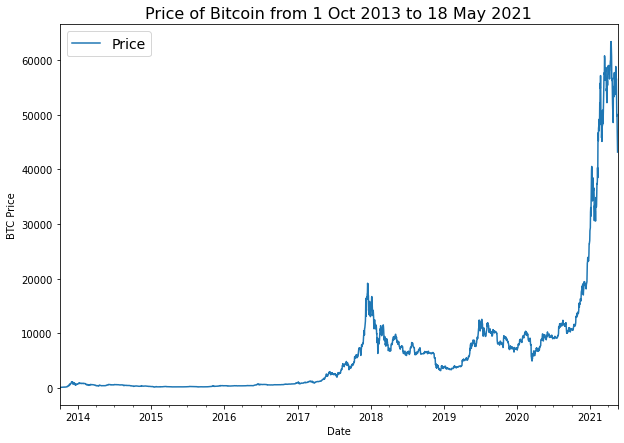

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

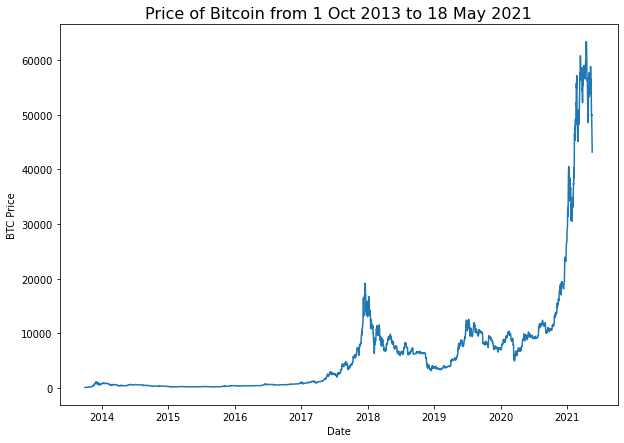

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

### Formatting Data

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

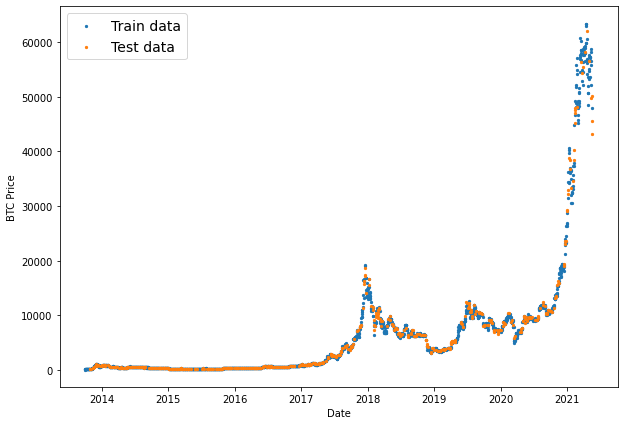

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

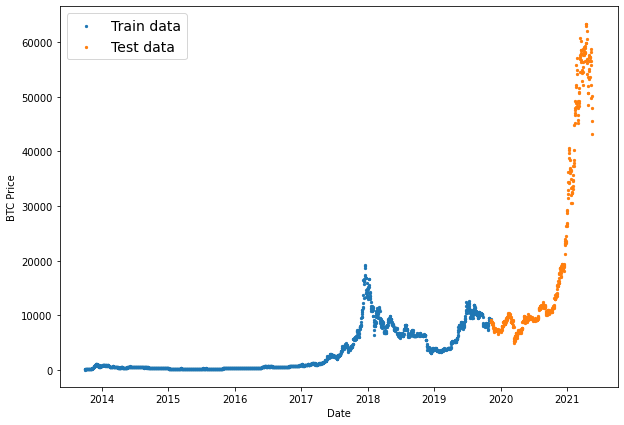

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

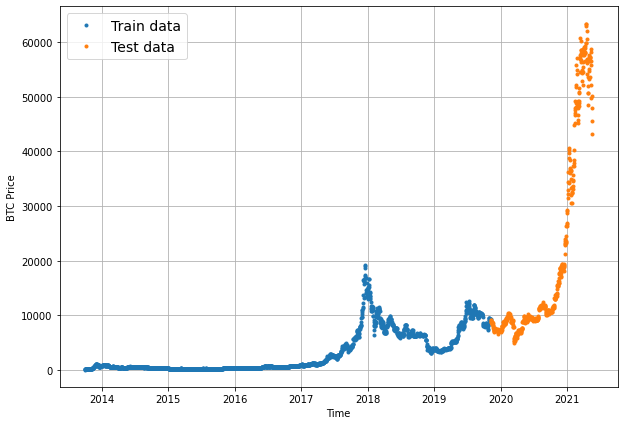

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

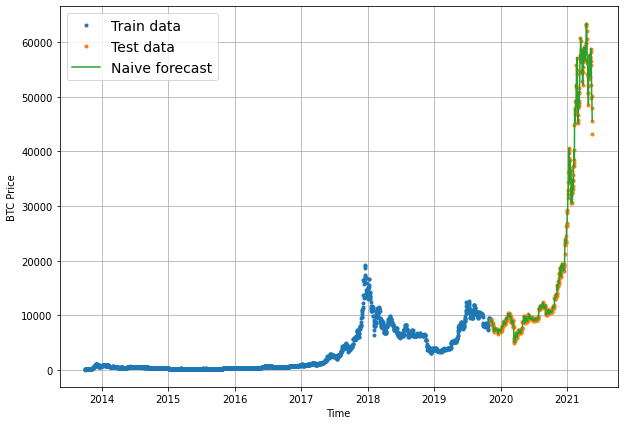

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

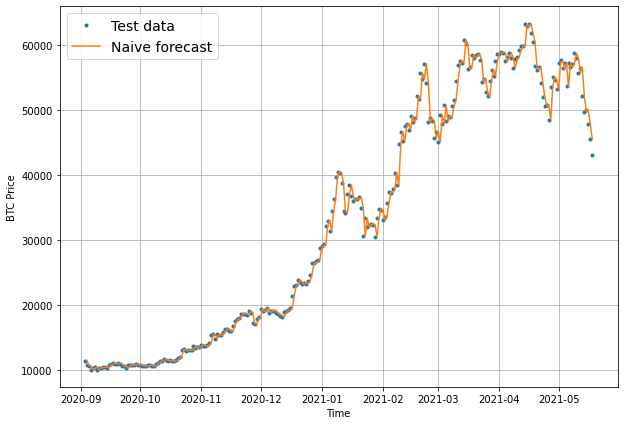

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [ ]:
# Let's get TensorFlow! 
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

### Formatting Data (Part 2): Windowing Dataset

In [ ]:
#HERE 
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
prices, len(prices)

(array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]), 2787)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=1, horizon=1)
len(full_windows), len(full_labels)

(2786, 2786)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=2, horizon=1)
len(full_windows), len(full_labels)

(2785, 2785)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=3, horizon=1)
len(full_windows), len(full_labels)

(2784, 2784)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=1, horizon=2)
len(full_windows), len(full_labels)

(2785, 2785)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=1, horizon=3)
len(full_windows), len(full_labels)

(2784, 2784)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=2, horizon=2)
len(full_windows), len(full_labels)

(2784, 2784)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=3, horizon=3)
len(full_windows), len(full_labels)

(2782, 2782)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

### Model 1: Dense Model (window = 7, horizon = 1)

In [ ]:
X_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
len(X_train)

2229

In [ ]:
X_test

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-18T00:00:00.000000000', '2019-11-19T00:00:00.000000000',
       '2019-11-20T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000', '2019-11-23T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-11-27T00:00:00.000000000',
       '2019-11-28T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-05

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
len(y_train)

2229

In [ ]:
y_test

array([ 9226.48582088,  8794.35864452,  8798.04205463,  9081.18687849,
        8711.53433917,  8760.89271814,  8749.52059102,  8656.97092235,
        8500.64355816,  8469.2608989 ,  8537.33965197,  8205.80636599,
        8118.4885358 ,  8074.84317361,  7612.7405735 ,  7262.11053495,
        7303.40575852,  7041.73293642,  7211.86180875,  7141.06944869,
        7523.4806726 ,  7390.20746923,  7729.26593894,  7542.23560864,
        7381.96300782,  7333.43293049,  7315.36776456,  7213.73376172,
        7398.78704961,  7511.88058312,  7532.12351309,  7550.23919987,
        7333.09604316,  7239.76257544,  7198.06667705,  7190.27236926,
        7238.87432299,  7087.02498535,  7112.73147612,  6883.49639377,
        6584.02884335,  7424.01540023,  7147.56832379,  7139.93337053,
        7286.33508116,  7236.98620461,  7166.17237853,  7235.6266505 ,
        7212.80939522,  7183.70653603,  7227.29371168,  7311.56064392,
        7385.46484791,  7251.27679432,  7179.95781929,  7174.74401195,
      

In [ ]:
len(y_test)

558

In [ ]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
train_labels

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9335.75240233],
       [9226.48582088],
       [8794.35864452]])

In [ ]:
train_labels.shape

(2224, 1)

In [ ]:
test_windows

array([[ 9290.89660239,  9202.41545055,  9369.62808116, ...,
         9335.75240233,  9226.48582088,  8794.35864452],
       [ 9202.41545055,  9369.62808116,  9326.59962378, ...,
         9226.48582088,  8794.35864452,  8798.04205463],
       [ 9369.62808116,  9326.59962378,  9335.75240233, ...,
         8794.35864452,  8798.04205463,  9081.18687849],
       ...,
       [58788.20967893, 58102.19142623, 55715.54665129, ...,
        52147.82118698, 49764.1320816 , 50032.69313676],
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361]])

In [ ]:
test_windows.shape

(556, 7)

In [ ]:
test_labels

array([[ 8798.04205463],
       [ 9081.18687849],
       [ 8711.53433917],
       [ 8760.89271814],
       [ 8749.52059102],
       [ 8656.97092235],
       [ 8500.64355816],
       [ 8469.2608989 ],
       [ 8537.33965197],
       [ 8205.80636599],
       [ 8118.4885358 ],
       [ 8074.84317361],
       [ 7612.7405735 ],
       [ 7262.11053495],
       [ 7303.40575852],
       [ 7041.73293642],
       [ 7211.86180875],
       [ 7141.06944869],
       [ 7523.4806726 ],
       [ 7390.20746923],
       [ 7729.26593894],
       [ 7542.23560864],
       [ 7381.96300782],
       [ 7333.43293049],
       [ 7315.36776456],
       [ 7213.73376172],
       [ 7398.78704961],
       [ 7511.88058312],
       [ 7532.12351309],
       [ 7550.23919987],
       [ 7333.09604316],
       [ 7239.76257544],
       [ 7198.06667705],
       [ 7190.27236926],
       [ 7238.87432299],
       [ 7087.02498535],
       [ 7112.73147612],
       [ 6883.49639377],
       [ 6584.02884335],
       [ 7424.01540023],


In [ ]:
test_labels.shape

(556, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/18 [>.............................] - ETA: 1:18 - loss: 3657.5220 - mae: 3657.5220

18/18 [==============================] - 5s 40ms/step - loss: 1811.1747 - mae: 1811.1747 - val_loss: 1317.5050 - val_mae: 1317.5050
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 346.7619 - mae: 346.7619 - val_loss: 1555.2751 - val_mae: 1555.2751
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 205.2380 - mae: 205.2380

18/18 [==============================] - 0s 25ms/step - loss: 230.2046 - mae: 230.2046 - val_loss: 1045.6837 - val_mae: 1045.6837
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 243.7899 - mae: 243.7899

18/18 [==============================] - 0s 25ms/step - loss: 190.0857 - mae: 190.0857 - val_loss: 1026.4325 - val_mae: 1026.4325
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 202.6291 - mae: 202.6291

18/18 [==============================] - 0s 25ms/step - loss: 184.2914 - mae: 184.2914 - val_loss: 1012.5502 - val_mae: 1012.5502
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7050 - mae: 137.7050

18/18 [==============================] - 0s 26ms/step - loss: 181.3398 - mae: 181.3398 - val_loss: 1005.2958 - val_mae: 1005.2958
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 227.3972 - mae: 227.3972

18/18 [==============================] - 0s 26ms/step - loss: 178.0688 - mae: 178.0688 - val_loss: 966.8949 - val_mae: 966.8949
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 152.8752 - mae: 152.8752

18/18 [==============================] - 0s 28ms/step - loss: 170.9276 - mae: 170.9276 - val_loss: 935.9810 - val_mae: 935.9810
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 168.2200 - mae: 168.2200 - val_loss: 957.4073 - val_mae: 957.4075
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 182.4345 - mae: 182.4345

18/18 [==============================] - 0s 26ms/step - loss: 163.2228 - mae: 163.2228 - val_loss: 889.9085 - val_mae: 889.9085
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2727 - mae: 176.2727

18/18 [==============================] - 0s 26ms/step - loss: 158.9308 - mae: 158.9308 - val_loss: 872.0479 - val_mae: 872.0479
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 155.1835 - mae: 155.1835 - val_loss: 955.2720 - val_mae: 955.2720
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 121.8641 - mae: 121.8641

18/18 [==============================] - 1s 37ms/step - loss: 152.2263 - mae: 152.2263 - val_loss: 854.9045 - val_mae: 854.9045
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 160.8521 - mae: 160.8521

18/18 [==============================] - 0s 25ms/step - loss: 144.8060 - mae: 144.8060 - val_loss: 849.6304 - val_mae: 849.6304
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 146.2652 - mae: 146.2652

18/18 [==============================] - 0s 26ms/step - loss: 142.9890 - mae: 142.9890 - val_loss: 786.7879 - val_mae: 786.7879
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 137.4722 - mae: 137.4722 - val_loss: 816.4900 - val_mae: 816.4900
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 135.2934 - mae: 135.2934 - val_loss: 792.8967 - val_mae: 792.8967
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 149.3448 - mae: 149.3448

18/18 [==============================] - 0s 24ms/step - loss: 134.7878 - mae: 134.7878 - val_loss: 764.5967 - val_mae: 764.5967
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 129.5235 - mae: 129.5235 - val_loss: 769.8671 - val_mae: 769.8671
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 139.1057 - mae: 139.1057

18/18 [==============================] - 0s 26ms/step - loss: 127.7880 - mae: 127.7880 - val_loss: 694.1907 - val_mae: 694.1907
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 152.4984 - mae: 152.4984

18/18 [==============================] - 0s 25ms/step - loss: 128.7865 - mae: 128.7865 - val_loss: 680.9885 - val_mae: 680.9885
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 181.5062 - mae: 181.5062

18/18 [==============================] - 0s 25ms/step - loss: 124.1739 - mae: 124.1739 - val_loss: 671.2213 - val_mae: 671.2213
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 130.7047 - mae: 130.7047

18/18 [==============================] - 0s 25ms/step - loss: 122.5860 - mae: 122.5860 - val_loss: 662.8542 - val_mae: 662.8542
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 136.3368 - mae: 136.3368

18/18 [==============================] - 0s 25ms/step - loss: 122.4025 - mae: 122.4025 - val_loss: 653.0231 - val_mae: 653.0231
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 129.8760 - mae: 129.8760

18/18 [==============================] - 0s 26ms/step - loss: 120.9980 - mae: 120.9980 - val_loss: 642.8079 - val_mae: 642.8079
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 119.0521 - mae: 119.0521

18/18 [==============================] - 0s 24ms/step - loss: 119.5803 - mae: 119.5803 - val_loss: 637.1829 - val_mae: 637.1829
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 164.1204 - mae: 164.1204

18/18 [==============================] - 0s 25ms/step - loss: 120.3089 - mae: 120.3089 - val_loss: 631.2161 - val_mae: 631.2161
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 114.0407 - mae: 114.0407

18/18 [==============================] - 0s 25ms/step - loss: 117.4929 - mae: 117.4929 - val_loss: 626.5927 - val_mae: 626.5927
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 116.3718 - mae: 116.3718 - val_loss: 663.2122 - val_mae: 663.2122
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 126.8142 - mae: 126.8142 - val_loss: 654.1220 - val_mae: 654.1220
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 124.9333 - mae: 124.9333 - val_loss: 725.8007 - val_mae: 725.8007
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 129.3103 - mae: 129.3103

18/18 [==============================] - 0s 25ms/step - loss: 121.6211 - mae: 121.6211 - val_loss: 613.3947 - val_mae: 613.3947
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 120.4443 - mae: 120.4443 - val_loss: 616.8710 - val_mae: 616.8710
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5470 - mae: 127.5470

18/18 [==============================] - 0s 24ms/step - loss: 115.9352 - mae: 115.9352 - val_loss: 607.3007 - val_mae: 607.3007
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 113.8653 - mae: 113.8653 - val_loss: 612.7846 - val_mae: 612.7846
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 119.3215 - mae: 119.3215 - val_loss: 632.0813 - val_mae: 632.0813
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 117.8524 - mae: 117.8524 - val_loss: 650.3451 - val_mae: 650.3451
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 113.8220 - mae: 113.8220

18/18 [==============================] - 0s 25ms/step - loss: 115.7835 - mae: 115.7835 - val_loss: 606.5071 - val_mae: 606.5071
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2782 - mae: 130.2782

18/18 [==============================] - 1s 38ms/step - loss: 114.4206 - mae: 114.4206 - val_loss: 604.8828 - val_mae: 604.8828
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 103.2874 - mae: 103.2874

18/18 [==============================] - 0s 25ms/step - loss: 113.3605 - mae: 113.3605 - val_loss: 596.3456 - val_mae: 596.3456
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 116.0665 - mae: 116.0665 - val_loss: 710.5358 - val_mae: 710.5358
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 122.3088 - mae: 122.3088 - val_loss: 597.0298 - val_mae: 597.0298
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 111.9487 - mae: 111.9487 - val_loss: 605.5201 - val_mae: 605.5201
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 116.4124 - mae: 116.4124 - val_loss: 628.5642 - val_mae: 628.5642
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 117.2449 - mae: 117.2449 - val_loss: 605.1888 - val_mae: 605.1888
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 85.2682 - mae: 85.2682

18/18 [==============================] - 0s 25ms/step - loss: 114.8861 - mae: 114.8861 - val_loss: 586.3160 - val_mae: 586.3160
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6052 - mae: 111.6052 - val_loss: 612.8624 - val_mae: 612.8624
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8203 - mae: 111.8203 - val_loss: 679.0146 - val_mae: 679.0146
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 179.8965 - mae: 179.8965

18/18 [==============================] - 0s 26ms/step - loss: 119.2304 - mae: 119.2304 - val_loss: 582.7854 - val_mae: 582.7854
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0159 - mae: 111.0159 - val_loss: 635.5441 - val_mae: 635.5441
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4398 - mae: 112.4398 - val_loss: 590.7875 - val_mae: 590.7875
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5193 - mae: 112.5193 - val_loss: 637.7691 - val_mae: 637.7691
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 64.6258 - mae: 64.6258

18/18 [==============================] - 0s 26ms/step - loss: 117.2623 - mae: 117.2623 - val_loss: 578.9000 - val_mae: 578.9000
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 113.0069 - mae: 113.0069 - val_loss: 617.9707 - val_mae: 617.9707
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 132.4992 - mae: 132.4992

18/18 [==============================] - 0s 26ms/step - loss: 114.7781 - mae: 114.7781 - val_loss: 577.6412 - val_mae: 577.6412
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6193 - mae: 109.6193 - val_loss: 800.5201 - val_mae: 800.5201
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 129.9926 - mae: 129.9926 - val_loss: 749.3281 - val_mae: 749.3281
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 123.0747 - mae: 123.0747 - val_loss: 661.1778 - val_mae: 661.1778
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1061 - mae: 112.1061 - val_loss: 593.4620 - val_mae: 593.4620
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7215 - mae: 111.7215 - val_loss: 620.0625 - val_mae: 620.0625
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 110.6451 - mae: 110.6451 - val_loss: 586.5807 - val_mae: 586.5807
Epoch 62/100
18/18 [============

18/18 [==============================] - 0s 25ms/step - loss: 109.1251 - mae: 109.1251 - val_loss: 575.9813 - val_mae: 575.9813
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1581 - mae: 108.1581 - val_loss: 642.2454 - val_mae: 642.2454
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 113.1117 - mae: 113.1117 - val_loss: 677.3517 - val_mae: 677.3517
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.5519 - mae: 124.5519 - val_loss: 638.3767 - val_mae: 638.3767
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 127.3772 - mae: 127.3772 - val_loss: 604.9412 - val_mae: 604.9412
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 110.9560 - mae: 110.9560 - val_loss: 587.9847 - val_mae: 587.9847
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 99.2430 - mae: 99.2430

18/18 [==============================] - 0s 24ms/step - loss: 109.2682 - mae: 109.2682 - val_loss: 568.5318 - val_mae: 568.5318
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6755 - mae: 109.6755 - val_loss: 580.6202 - val_mae: 580.6202
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8909 - mae: 109.8909 - val_loss: 571.6978 - val_mae: 571.6978
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8281 - mae: 107.8281 - val_loss: 578.2939 - val_mae: 578.2939
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 77.4594 - mae: 77.4594

18/18 [==============================] - 0s 25ms/step - loss: 109.3457 - mae: 109.3457 - val_loss: 566.3024 - val_mae: 566.3024
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1357 - mae: 108.1357 - val_loss: 573.9916 - val_mae: 573.9916
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6457 - mae: 112.6457 - val_loss: 588.1580 - val_mae: 588.1580
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5843 - mae: 111.5843 - val_loss: 644.1324 - val_mae: 644.1324
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8717 - mae: 112.8717 - val_loss: 568.3259 - val_mae: 568.3259
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0261 - mae: 107.0261 - val_loss: 572.2665 - val_mae: 572.2665
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 114.0182 - mae: 114.0182 - val_loss: 566.5172 - val_mae: 566.5172
Epoch 83/100
18/18 [============

18/18 [==============================] - 0s 25ms/step - loss: 107.1517 - mae: 107.1517 - val_loss: 563.1864 - val_mae: 563.1864
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 118.7409 - mae: 118.7409 - val_loss: 633.6654 - val_mae: 633.6654
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6528 - mae: 109.6528 - val_loss: 586.2538 - val_mae: 586.2538
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 108.8229 - mae: 108.8229 - val_loss: 572.4424 - val_mae: 572.4424
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9240 - mae: 108.9240 - val_loss: 563.3617 - val_mae: 563.3617
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7875 - mae: 109.7875 - val_loss: 626.3502 - val_mae: 626.3502


In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 626.3502 - mae: 626.3502


[626.3501586914062, 626.3501586914062]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 563.1863 - mae: 563.1863


[563.1863403320312, 563.1863403320312]

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8864.68 , 8780.84 , 9020.71 , 8798.501, 8752.089, 8736.452,
        8673.742, 8547.583, 8454.389, 8526.94 ], dtype=float32)>)

In [ ]:
model_1_preds.shape

TensorShape([556])

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 563.1863,
 'mse': 1161842.0,
 'rmse': 1077.8878,
 'mape': 2.525917,
 'mase': 0.9893623}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
test_labels[:,0].shape

(556,)

In [ ]:
test_windows

array([[ 9290.89660239,  9202.41545055,  9369.62808116, ...,
         9335.75240233,  9226.48582088,  8794.35864452],
       [ 9202.41545055,  9369.62808116,  9326.59962378, ...,
         9226.48582088,  8794.35864452,  8798.04205463],
       [ 9369.62808116,  9326.59962378,  9335.75240233, ...,
         8794.35864452,  8798.04205463,  9081.18687849],
       ...,
       [58788.20967893, 58102.19142623, 55715.54665129, ...,
        52147.82118698, 49764.1320816 , 50032.69313676],
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361]])

In [ ]:
test_windows.shape

(556, 7)

In [ ]:
X_test.shape

(558,)

In [ ]:
X_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
X_test

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-18T00:00:00.000000000', '2019-11-19T00:00:00.000000000',
       '2019-11-20T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000', '2019-11-23T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-11-27T00:00:00.000000000',
       '2019-11-28T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-05

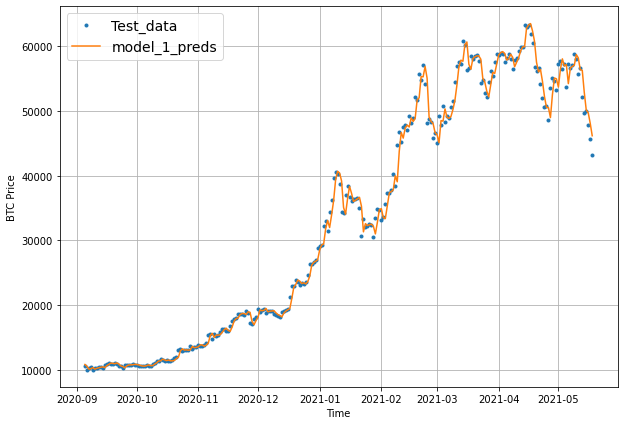

In [ ]:
# more on this...

offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 682.1074


682.107421875

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 610.4100


610.4099731445312

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 610.41003,
 'mse': 1309100.8,
 'rmse': 1144.1594,
 'mape': 2.778578,
 'mase': 1.0670028}

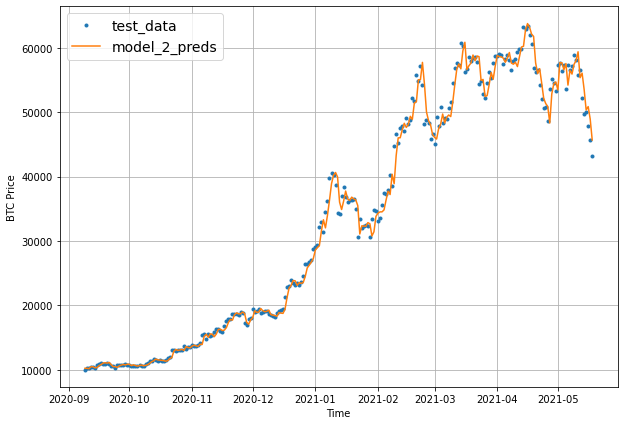

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

### Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1326.7249


1326.724853515625

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1222.5499


1222.5499267578125

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9292.884, 9300.105, 9616.088, 9449.303, 9361.417, 9636.824,
        9513.467],
       [9009.196, 9072.616, 9342.3  , 9274.449, 9050.63 , 9252.27 ,
        9327.53 ],
       [8842.8  , 8962.634, 9154.71 , 9103.447, 9095.077, 8970.074,
        9259.788],
       [8929.372, 9178.991, 9088.647, 9179.486, 9333.885, 9140.441,
        9269.902],
       [8791.493, 8969.904, 8898.3  , 9154.075, 9249.225, 9045.424,
        9000.646]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  659.6547  ,   441.04883 ,   419.32785 ,   533.5091  ,
          461.23325 ,   542.4256  ,   597.17566 ,   530.47217 ,
          563.6524  ,   675.99286 ,   915.9127  ,   920.411   ,
          955.3443  ,   979.6312  ,   634.95636 ,   309.09164 ,
          166.32736 ,   176.14941 ,   153.78635 ,   184.47922 ,
          172.31885 ,   282.86496 ,   438.9592  ,   418.66992 ,
          278.9546  ,   288.98633 ,   123.67683 ,   114.04506 ,
          157.48947 ,   252.52016 ,   353.3935  ,   491.60602 ,
          459.9979  ,   407.50406 ,   400.98764 ,   354.75174 ,
          373.965   ,   274.19156 ,   219.47328 ,   192.155   ,
          384.26422 ,    36.137905,    88.75635 ,    83.725586,
          239.56418 ,   125.50746 ,   154.07129 ,    84.29283 ,
          110.29485 ,   115.23591 ,   159.17912 ,   203.75558 ,
          202.70354 ,   251.9894  ,   223.90926 ,   316.03537 ,
          455.8687  ,   438.89285 ,   471.83615 ,   483.5104  ,
          298.65723 ,   187.61914

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1222.5499,
 'mse': 5307482.0,
 'rmse': 1407.0553,
 'mape': 5.610672,
 'mase': 2.175459}

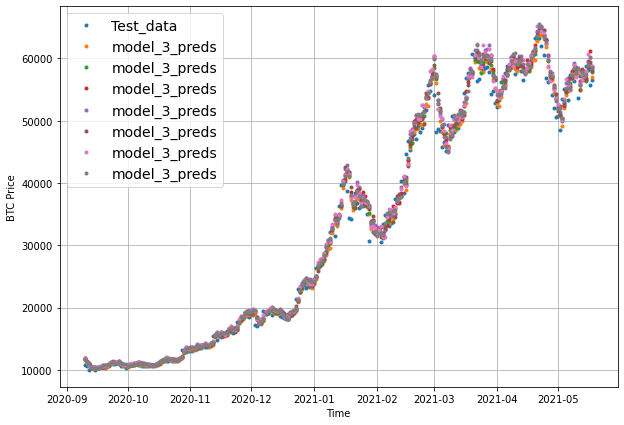

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

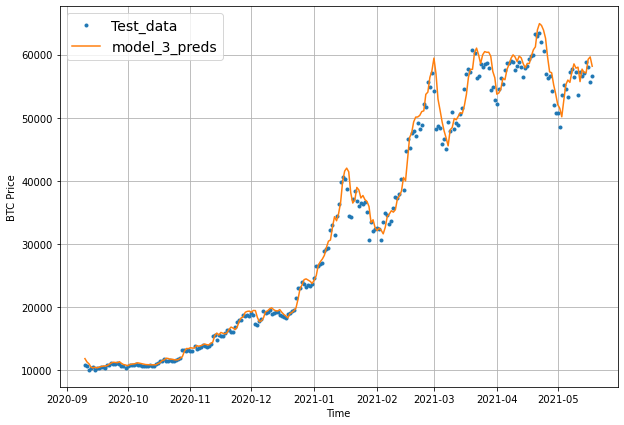

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

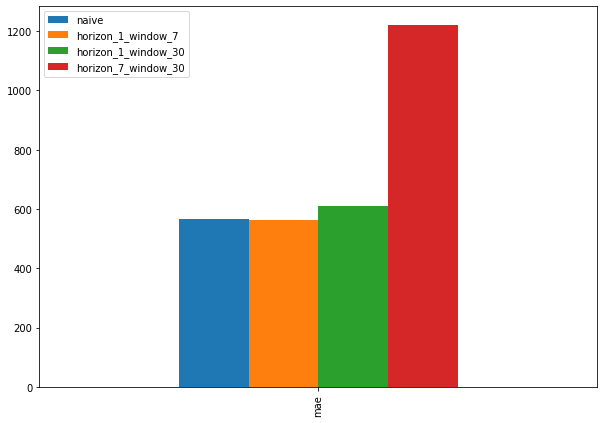

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.5093


567.50927734375

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8892.066, 8807.622, 9014.136, 8791.375, 8777.405, 8754.914,
       8671.96 , 8566.547, 8471.684, 8530.177], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 567.50934,
 'mse': 1174608.9,
 'rmse': 1083.7937,
 'mape': 2.5427365,
 'mase': 0.9969567}

### Model 5: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 573.0090


573.0089721679688

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8907.998, 8792.91 , 8988.278, 8804.367, 8753.445, 8739.991,
       8679.267, 8558.81 , 8460.468, 8518.697], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 573.009,
 'mse': 1194200.6,
 'rmse': 1092.7949,
 'mape': 2.580472,
 'mase': 1.006618}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Make a multivariate time series

In [ ]:

# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
(block_reward_4_datetime - bitcoin_prices.index[0]).days

2414

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


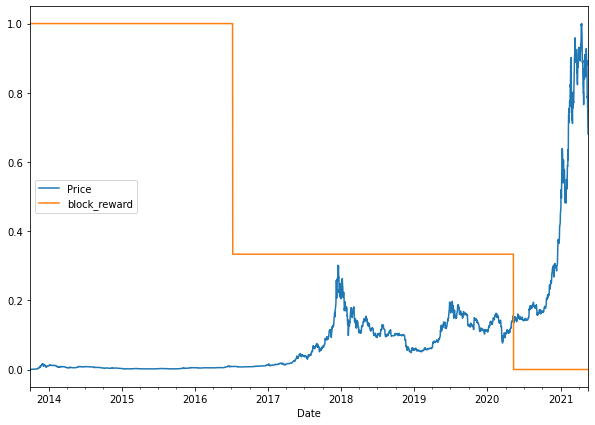

In [ ]:
#here

# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

### Making a windowed dataset with pandas

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Model 6: Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.2982


567.2982177734375

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8854.475, 8771.743, 9033.392, 8774.771, 8754.744, 8771.962,
       8666.187, 8517.317, 8478.971, 8524.168], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.2982,
 'mse': 1158511.9,
 'rmse': 1076.3419,
 'mape': 2.5273314,
 'mase': 0.99658585}

In [ ]:
model_1_results

{'mae': 563.1863,
 'mse': 1161842.0,
 'rmse': 1077.8878,
 'mape': 2.525917,
 'mase': 0.9893623}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Model 7: N-BEATS algorithm

In [ ]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.0353097  -0.38327456  0.09131099  0.4889641   0.5670391   0.25565952
 -0.10440049]
Forecast: -0.4818994998931885


In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(2224, 2224, 556, 556)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 226: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 326: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 38s, sys: 2.29 s, total: 1min 40s
Wall time: 1min 41s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 583.4702 - mae: 583.4702 - mse: 1180510.2500


[583.47021484375, 583.47021484375, 1180510.25]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8940.873, 8878.783, 9013.136, 8782.523, 8773.324, 8763.969,
       8688.732, 8549.968, 8497.311, 8527.538], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 583.4702,
 'mse': 1180510.2,
 'rmse': 1086.5128,
 'mape': 2.6395452,
 'mase': 1.0249956}

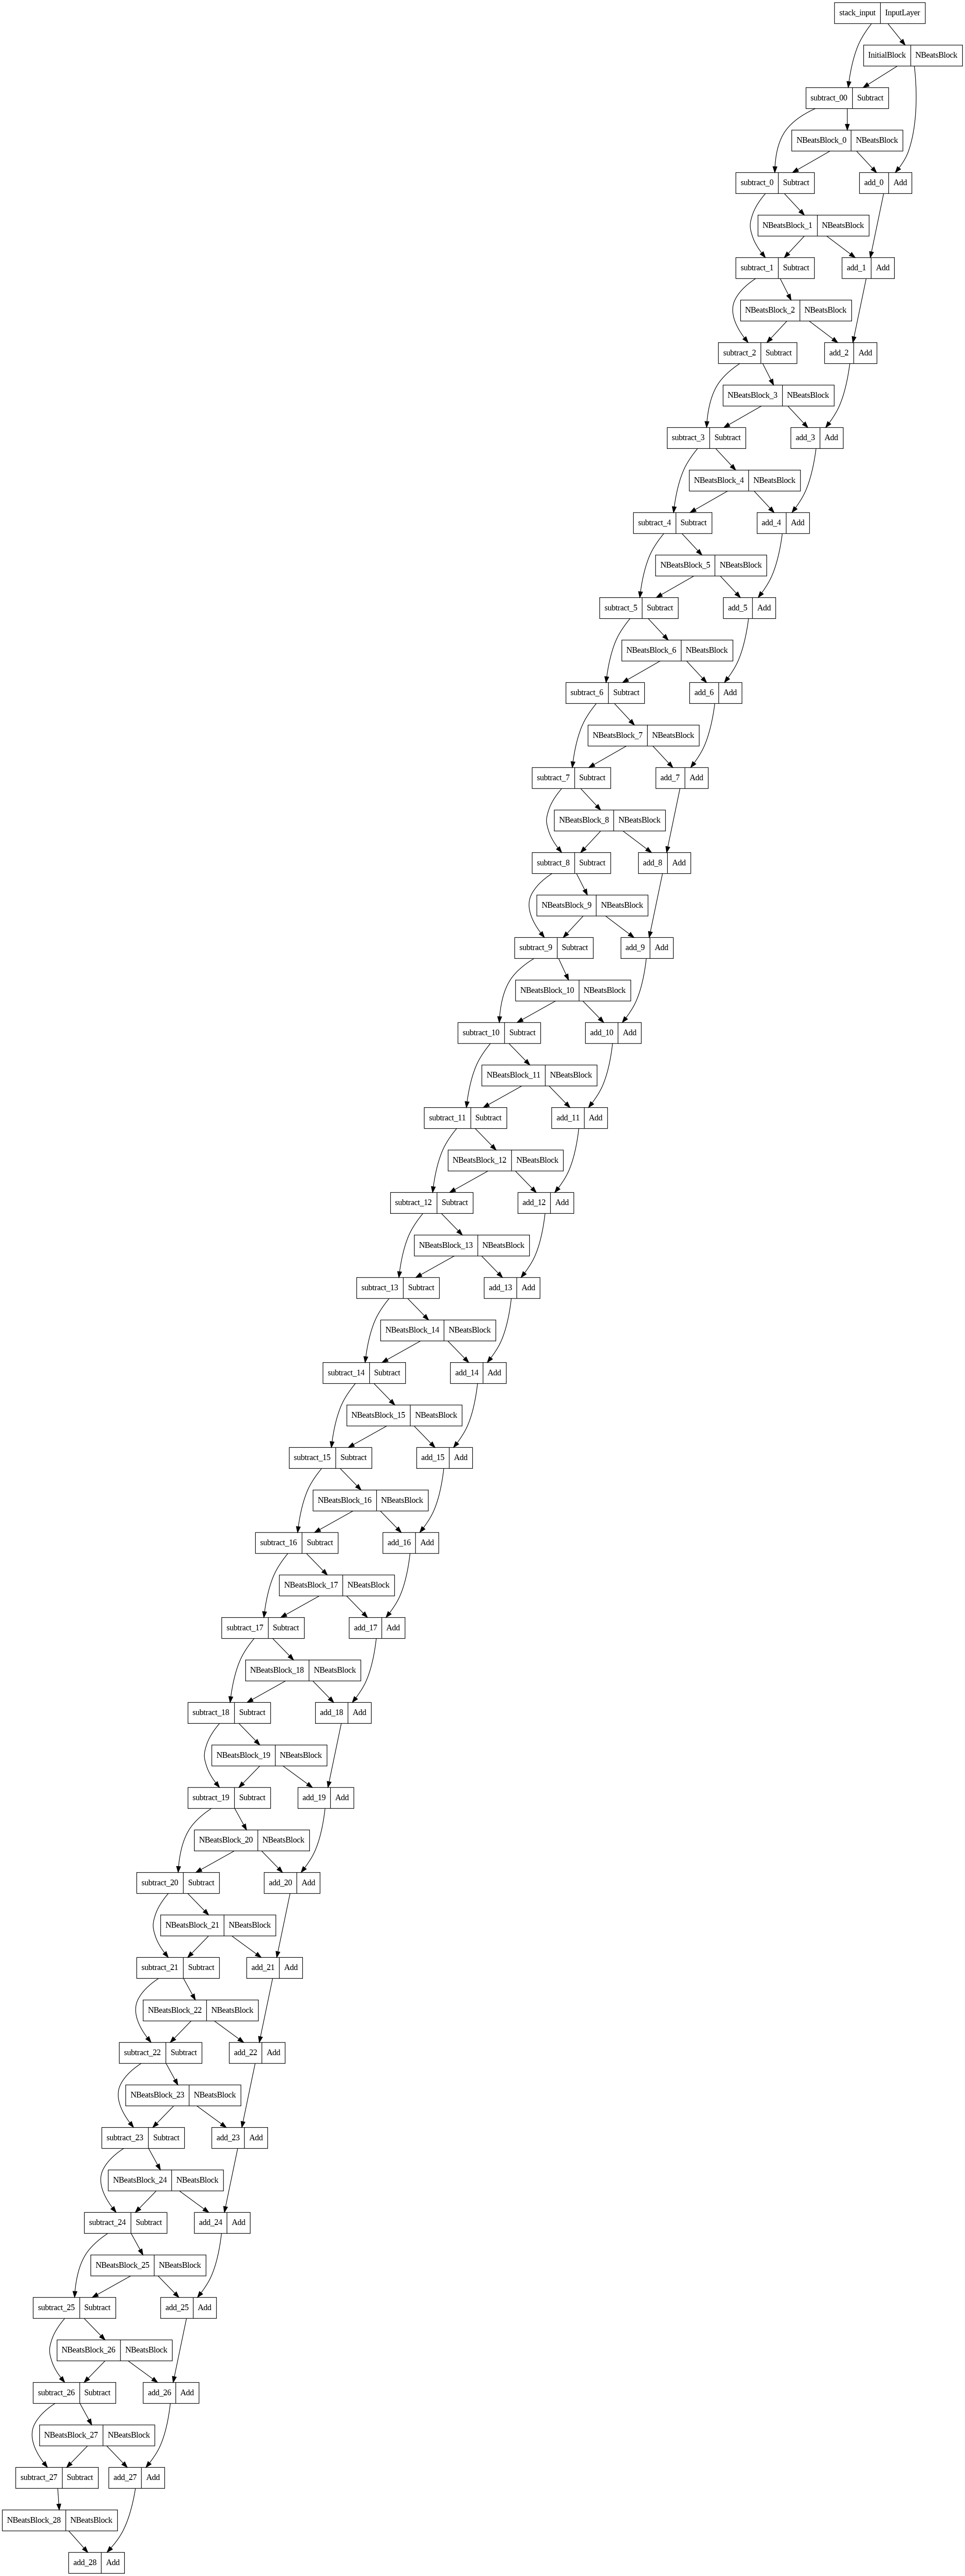

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

### Model 8: creating an ensemble (stacking different models together)

In [ ]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 419: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 659: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 759: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 933: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 118: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 515: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 615: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 538: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 638: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing 

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 36ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8830.328 ,  8787.243 ,  9076.436 , ..., 49876.7   , 48641.723 ,
        46510.645 ],
       [ 8764.713 ,  8786.969 ,  9086.703 , ..., 49844.105 , 48743.02  ,
        45665.254 ],
       [ 8801.629 ,  8740.41  ,  9044.075 , ..., 49561.586 , 48004.61  ,
        46395.566 ],
       ...,
       [ 8719.399 ,  8804.1455,  9018.348 , ..., 50770.812 , 49130.676 ,
        47031.977 ],
       [ 8713.866 ,  8774.375 ,  9043.364 , ..., 50269.184 , 48155.223 ,
        46277.16  ],
       [ 8748.959 ,  8776.627 ,  9088.749 , ..., 50407.363 , 47687.887 ,
        45782.746 ]], dtype=float32)>

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 568.58813,
 'mse': 1143308.5,
 'rmse': 1069.2561,
 'mape': 2.5678391,
 'mase': 0.9988519}

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

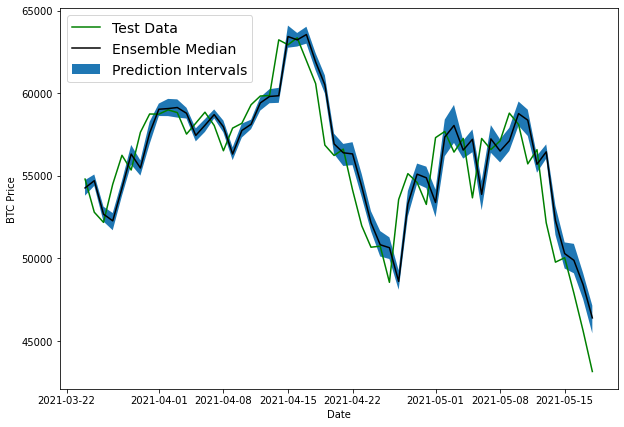

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

### Model 9: Train a model on the full historical data to make predictions in future

In [ ]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 52ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55111.80859375

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55111.80859375] -> Prediction: 51378.59765625

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55111.80859375 51378.59765625] -> Prediction: 48907.12890625

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55111.80859375 51378.59765625 48907.12890625] -> Prediction: 47338.44921875

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55111.80859375
 51378.59765625 48907.12890625 47338.4

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55111.81 , 51378.598, 48907.13 , 47338.45 , 46827.457,
        46238.33 , 48427.223, 53428.58 , 49685.19 , 47191.215, 46414.684,
        47298.863, 48201.355, 50339.156], dtype=float32))

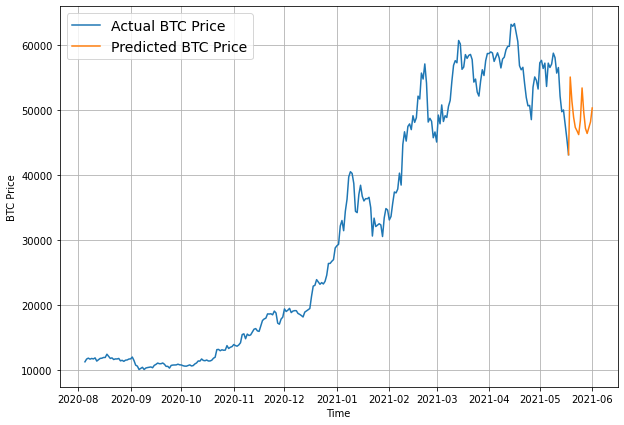

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

### Model 10: Why forecasting is BS (the turkey problem)

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

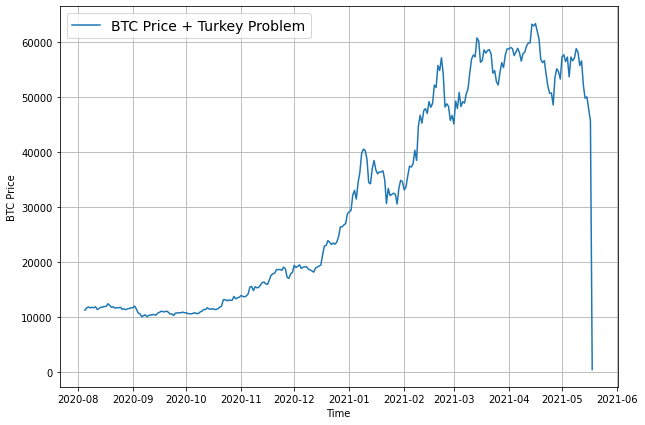

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 656.6476


656.6476440429688

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 642.4880


642.4879760742188

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8854.802, 8807.063, 9075.413, 8793.682, 8770.971, 8762.429,
       8691.84 , 8553.855, 8476.735, 8557.16 ], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17147.975,
 'mse': 615769300.0,
 'rmse': 23750.822,
 'mape': 121.63028,
 'mase': 26.536547}

In [ ]:
model_1_results

{'mae': 563.1863,
 'mse': 1161842.0,
 'rmse': 1077.8878,
 'mape': 2.525917,
 'mase': 0.9893623}

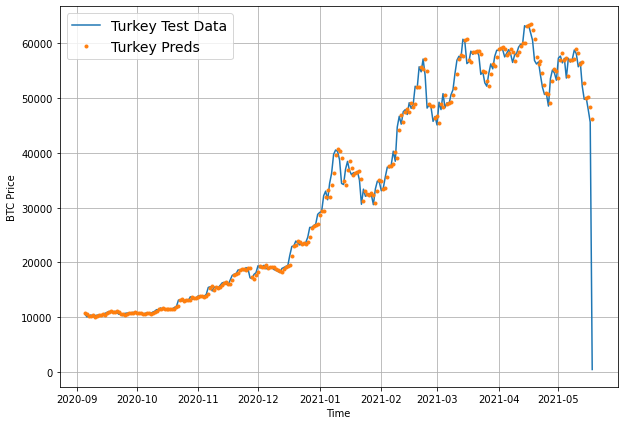

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

### Compare Models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,563.186279,1.161842e+06,1077.887817,2.525917,0.989362
model_2_dense_w30_h1,610.410034,1.309101e+06,1144.159424,2.778578,1.067003
model_3_dense_w30_h7,1222.549927,5.307482e+06,1407.055298,5.610672,2.175459
model_4_CONV1D,567.509338,1.174609e+06,1083.793701,2.542737,0.996957
model_5_LSTM,573.008972,1.194201e+06,1092.794922,2.580472,1.006618
model_6_multivariate,567.298218,1.158512e+06,1076.341919,2.527331,0.996586
model_8_NBEATs,583.470215,1.180510e+06,1086.512817,2.639545,1.024996
model_9_ensemble,568.588135,1.143308e+06,1069.256104,2.567839,0.998852
model_10_turkey,17147.974609,6.157693e+08,23750.822266,121.630280,26.536547


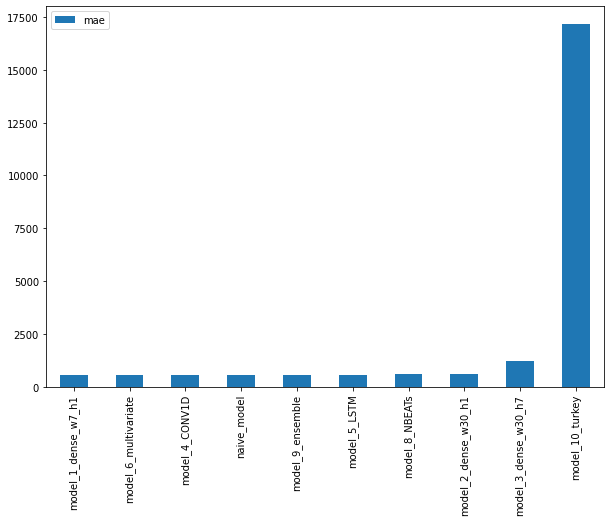

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

## 1. Does scaling the data help for univariate/multivariate data? (e.g. getting all of the values between 0 & 1)
* Try doing this for a univariate model (e.g. `model_1`) and a multivariate model (e.g. `model_6`) and see if it effects model training or evaluation results.

### Model 1 Scaled

In [ ]:
#HERE 
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
prices_norm = prices/max(prices)
prices_norm

array([0.00195203, 0.00198045, 0.00171413, ..., 0.75592822, 0.71991993,
       0.68108379])

In [ ]:
windows_norm, labels_norm = make_windows(prices_norm, window_size=WINDOW_SIZE, horizon=HORIZON)
len(windows_norm), len(labels_norm)

(2780, 2780)

In [ ]:
train_windows_norm, test_windows_norm, train_labels_norm, test_labels_norm = make_train_test_splits(windows_norm, labels_norm)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1_q1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_q1_dense") # give the model a name so we can save it

# Compile model
model_1_q1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1_q1.fit(x=train_windows_norm, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels_norm, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_norm, test_labels_norm),
            callbacks=[create_model_checkpoint(model_name=model_1_q1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 0.0503 - mae: 0.0503

18/18 [==============================] - 1s 32ms/step - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0053 - mae: 0.0053 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0030 - mae: 0.0030

18/18 [==============================] - 0s 25ms/step - loss: 0.0032 - mae: 0.0032 - val_loss: 0.0163 - val_mae: 0.0163
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0036 - mae: 0.0036

18/18 [==============================] - 0s 25ms/step - loss: 0.0030 - mae: 0.0030 - val_loss: 0.0162 - val_mae: 0.0162
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0173 - val_mae: 0.0173
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0027 - val_loss: 0.0177 - val_mae: 0.0177
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0033 - mae: 0.0033

18/18 [==============================] - 0s 25ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0157 - val_mae: 0.0157
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0166 - val_mae: 0.0166
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0171 - val_mae: 0.0171
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0168 - val_mae: 0.0168
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0025 - mae: 0.0025

18/18 [==============================] - 0s 25ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0151 - val_mae: 0.0151
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0166 - val_mae: 0.0166
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0157 - val_mae: 0.0157
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0024 - val_loss: 0.0172 - val_mae: 0.0172
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - mae: 0.0025 - val_loss: 0.0162 - val_mae: 0.0162
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0023 - val_loss: 0.0165 - val_mae: 0.0165
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0165 - val_mae: 0.0165
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 0.0022 - mae: 0.00

18/18 [==============================] - 0s 28ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0143 - val_mae: 0.0143
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0023 - mae: 0.0023 - val_loss: 0.0150 - val_mae: 0.0150
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0024 - mae: 0.0024

18/18 [==============================] - 0s 26ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0128 - val_mae: 0.0128
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0141 - val_mae: 0.0141
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0132 - val_mae: 0.0132
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0023 - mae: 0.0023

18/18 [==============================] - 0s 28ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0126 - val_mae: 0.0126
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0129 - val_mae: 0.0129
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0023 - mae: 0.0023 - val_loss: 0.0134 - val_mae: 0.0134
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0019 - mae: 0.0019

18/18 [==============================] - 0s 25ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0121 - val_mae: 0.0121
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0029 - mae: 0.0029

18/18 [==============================] - 0s 25ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0118 - val_mae: 0.0118
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0125 - val_mae: 0.0125
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0138 - val_mae: 0.0138
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0139 - val_mae: 0.0139
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0131 - val_mae: 0.0131
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0020 - mae: 0.0020

18/18 [==============================] - 0s 25ms/step - loss: 0.0023 - mae: 0.0023 - val_loss: 0.0114 - val_mae: 0.0114
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0022 - val_loss: 0.0117 - val_mae: 0.0117
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0122 - val_mae: 0.0122
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0126 - val_mae: 0.0126
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0148 - val_mae: 0.0148
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0116 - val_mae: 0.0116
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0117 - val_mae: 0.0117
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0022 - mae: 

18/18 [==============================] - 0s 28ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0110 - val_mae: 0.0110
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0113 - val_mae: 0.0113
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0113 - val_mae: 0.0113
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0112 - val_mae: 0.0112
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0116 - val_mae: 0.0116
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0119 - val_mae: 0.0119
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0121 - val_mae: 0.0121
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 

18/18 [==============================] - 0s 25ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0110 - val_mae: 0.0110
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0120 - val_mae: 0.0120
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0018 - mae: 0.0018

18/18 [==============================] - 0s 25ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0106 - val_mae: 0.0106
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0020 - mae: 0.0020

18/18 [==============================] - 0s 25ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0104 - val_mae: 0.0104
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0107 - val_mae: 0.0107
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0105 - val_mae: 0.0105
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0116 - val_mae: 0.0116
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0124 - val_mae: 0.0124
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0019 - val_loss: 0.0117 - val_mae: 0.0117
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0018 - val_loss: 0.0119 - val_mae: 0.0119
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 

In [ ]:
# Evaluate model on test data
model_1_q1.evaluate(test_windows_norm, test_labels_norm)

18/18 [==============================] - 0s 2ms/step - loss: 0.0138 - mae: 0.0138


[0.013846914283931255, 0.013846914283931255]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1_q1 = tf.keras.models.load_model("model_experiments/model_1_q1_dense")
model_1_q1.evaluate(test_windows_norm, test_labels_norm)

18/18 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0104


[0.01043980848044157, 0.01043980848044157]

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_q1_preds = make_preds(model_1_q1, test_windows_norm)
len(model_1_q1_preds), model_1_q1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.1434453 , 0.14056873, 0.14345372, 0.14232875, 0.13973545,
        0.13977866, 0.13935786, 0.13746212, 0.1355917 , 0.13638346],
       dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_q1_results = evaluate_preds(y_true=tf.squeeze(test_labels_norm), # reduce to right shape
                                 y_pred=model_1_q1_preds)
model_1_q1_results

{'mae': 0.010439808,
 'mse': 0.000352179,
 'rmse': 0.018766431,
 'mape': 3.0528998,
 'mase': 1.1617705}

In [ ]:
model_1_results

{'mae': 563.1863,
 'mse': 1161842.0,
 'rmse': 1077.8878,
 'mape': 2.525917,
 'mase': 0.9893623}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Model 6 Scaled

In [ ]:
bitcoin_prices_norm_q1 = bitcoin_prices.copy()

In [ ]:
bitcoin_prices_norm_q1

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
bitcoin_prices_norm_q1['Price'] = bitcoin_prices_norm_q1['Price']/max(bitcoin_prices_norm_q1['Price'])

In [ ]:
bitcoin_prices_norm_q1

,Price
Date,
2013-10-01,0.001952
2013-10-02,0.001980
2013-10-03,0.001714
2013-10-04,0.001873
2013-10-05,0.001915
...,...
2021-05-14,0.785583
2021-05-15,0.789822
2021-05-16,0.755928


In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices_norm_q1.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices_norm_q1.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Add block_reward column
bitcoin_prices_norm_q1["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_norm_q1.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_norm_q1.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_norm_q1.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_norm_q1.head()

,Price,block_reward
Date,,
2013-10-01,0.001952,25
2013-10-02,0.001980,25
2013-10-03,0.001714,25
2013-10-04,0.001873,25
2013-10-05,0.001915,25


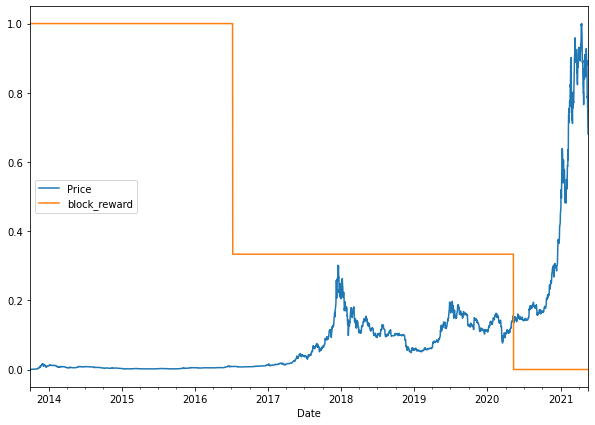

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df_q1 = pd.DataFrame(minmax_scale(bitcoin_prices_norm_q1[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_norm_q1.columns,
                                     index=bitcoin_prices_norm_q1.index)
scaled_price_block_df_q1.plot(figsize=(10, 7));

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_norm_q1_windowed = bitcoin_prices_norm_q1.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_norm_q1_windowed[f"Price+{i+1}"] = bitcoin_prices_norm_q1_windowed["Price"].shift(periods=i+1)
bitcoin_prices_norm_q1_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,0.001952,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,0.001980,25,0.001952,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,0.001714,25,0.001980,0.001952,NaN,NaN,NaN,NaN,NaN
2013-10-04,0.001873,25,0.001714,0.001980,0.001952,NaN,NaN,NaN,NaN
2013-10-05,0.001915,25,0.001873,0.001714,0.001980,0.001952,NaN,NaN,NaN
2013-10-06,0.001905,25,0.001915,0.001873,0.001714,0.001980,0.001952,NaN,NaN
2013-10-07,0.001923,25,0.001905,0.001915,0.001873,0.001714,0.001980,0.001952,NaN
2013-10-08,0.001942,25,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980,0.001952
2013-10-09,0.001958,25,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_norm_q1_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_norm_q1_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980,0.001952
2013-10-09,25.0,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980
2013-10-10,25.0,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714
2013-10-11,25.0,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873
2013-10-12,25.0,0.001978,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915


In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
X_train

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980,0.001952
2013-10-09,25.0,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980
2013-10-10,25.0,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714
2013-10-11,25.0,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873
2013-10-12,25.0,0.001978,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915
...,...,...,...,...,...,...,...,...
2019-11-05,12.5,0.145270,0.146667,0.145195,0.144150,0.145643,0.149269,0.149309
2019-11-06,12.5,0.147910,0.145270,0.146667,0.145195,0.144150,0.145643,0.149269
2019-11-07,12.5,0.147231,0.147910,0.145270,0.146667,0.145195,0.144150,0.145643


In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6_q1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_q1_dense_multivariate")

# Compile
model_6_q1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6_q1.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6_q1.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6_q1 = tf.keras.models.load_model("model_experiments/model_6_q1_dense_multivariate")
model_6_q1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 0.0133


0.013298466801643372

In [ ]:
# Make predictions on multivariate data
model_6_q1_preds = tf.squeeze(model_6_q1.predict(X_test))
model_6_q1_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.14623313, 0.14434312, 0.14488494, 0.14305978, 0.14077699,
       0.14071451, 0.14069861, 0.13834555, 0.13761556, 0.13734111],
      dtype=float32)>

In [ ]:
# Evaluate preds
model_6_q1_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_q1_preds)
model_6_q1_results

{'mae': 0.013298466,
 'mse': 0.00058029767,
 'rmse': 0.024089368,
 'mape': 3.8132951,
 'mase': 1.4798898}

In [ ]:
model_1_results

{'mae': 563.1863,
 'mse': 1161842.0,
 'rmse': 1077.8878,
 'mape': 2.525917,
 'mase': 0.9893623}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_6_results

{'mae': 567.2982,
 'mse': 1158511.9,
 'rmse': 1076.3419,
 'mape': 2.5273314,
 'mase': 0.99658585}

## 2. Get the most up to date data on Bitcoin, train a model & see how it goes (our data goes up to May 18 2021).
* You can download the Bitcoin historical data for free from coindesk.com/price/bitcoin and clicking "Export Data" -> "CSV".

In [ ]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
bp_q2 = pd.read_csv("/content/drive/MyDrive/btc_all_time.csv") # parse the date column (tell pandas column 1 is a datetime)
bp_q2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 08, 2023","22,005.4","22,197.8","22,274.3","21,888.9",335.46K,-0.87%
1,"Mar 07, 2023","22,197.8","22,410.1","22,535.1","21,968.6",304.75K,-0.95%
2,"Mar 06, 2023","22,410.0","22,428.2","22,595.4","22,320.1",215.31K,-0.08%
3,"Mar 05, 2023","22,428.3","22,347.1","22,636.7","22,213.5",160.57K,0.36%
4,"Mar 04, 2023","22,347.1","22,354.7","22,403.7","22,167.4",123.93K,-0.03%


In [ ]:
bp_q2 = bp_q2.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
bp_q2

,Date,Price
0,"Mar 08, 2023","22,005.4"
1,"Mar 07, 2023","22,197.8"
2,"Mar 06, 2023","22,410.0"
3,"Mar 05, 2023","22,428.3"
4,"Mar 04, 2023","22,347.1"
...,...,...
4612,"Jul 22, 2010",0.1
4613,"Jul 21, 2010",0.1
4614,"Jul 20, 2010",0.1
4615,"Jul 19, 2010",0.1


In [ ]:
col1, col2 = bp_q2['Date'].to_list(), bp_q2['Price'].to_list()
col1.reverse()
col2.reverse()

col1, col2

(['Jul 18, 2010',
  'Jul 19, 2010',
  'Jul 20, 2010',
  'Jul 21, 2010',
  'Jul 22, 2010',
  'Jul 23, 2010',
  'Jul 24, 2010',
  'Jul 25, 2010',
  'Jul 26, 2010',
  'Jul 27, 2010',
  'Jul 28, 2010',
  'Jul 29, 2010',
  'Jul 30, 2010',
  'Jul 31, 2010',
  'Aug 01, 2010',
  'Aug 02, 2010',
  'Aug 03, 2010',
  'Aug 04, 2010',
  'Aug 05, 2010',
  'Aug 06, 2010',
  'Aug 07, 2010',
  'Aug 08, 2010',
  'Aug 09, 2010',
  'Aug 10, 2010',
  'Aug 11, 2010',
  'Aug 12, 2010',
  'Aug 13, 2010',
  'Aug 14, 2010',
  'Aug 15, 2010',
  'Aug 16, 2010',
  'Aug 17, 2010',
  'Aug 18, 2010',
  'Aug 19, 2010',
  'Aug 20, 2010',
  'Aug 21, 2010',
  'Aug 22, 2010',
  'Aug 23, 2010',
  'Aug 24, 2010',
  'Aug 25, 2010',
  'Aug 26, 2010',
  'Aug 27, 2010',
  'Aug 28, 2010',
  'Aug 29, 2010',
  'Aug 30, 2010',
  'Aug 31, 2010',
  'Sep 01, 2010',
  'Sep 02, 2010',
  'Sep 03, 2010',
  'Sep 04, 2010',
  'Sep 05, 2010',
  'Sep 06, 2010',
  'Sep 07, 2010',
  'Sep 08, 2010',
  'Sep 09, 2010',
  'Sep 10, 2010',
  'Sep 11,

In [ ]:
len(col1), len(col2)

(4617, 4617)

In [ ]:
bp_q2 = pd.DataFrame(data={'Date': col1, 'Price': col2})
bp_q2

,Date,Price
0,"Jul 18, 2010",0.1
1,"Jul 19, 2010",0.1
2,"Jul 20, 2010",0.1
3,"Jul 21, 2010",0.1
4,"Jul 22, 2010",0.1
...,...,...
4612,"Mar 04, 2023","22,347.1"
4613,"Mar 05, 2023","22,428.3"
4614,"Mar 06, 2023","22,410.0"
4615,"Mar 07, 2023","22,197.8"


In [ ]:
bp_q2["Date"] = pd.to_datetime(bp_q2["Date"]).dt.strftime('%Y-%m-%d')
bp_q2

,Date,Price
0,2010-07-18,0.1
1,2010-07-19,0.1
2,2010-07-20,0.1
3,2010-07-21,0.1
4,2010-07-22,0.1
...,...,...
4612,2023-03-04,"22,347.1"
4613,2023-03-05,"22,428.3"
4614,2023-03-06,"22,410.0"
4615,2023-03-07,"22,197.8"


In [ ]:
price_arr = np.array([float(price.replace(',','')) for price in bp_q2['Price']])
price_arr

array([1.00000e-01, 1.00000e-01, 1.00000e-01, ..., 2.24100e+04,
       2.21978e+04, 2.20054e+04])

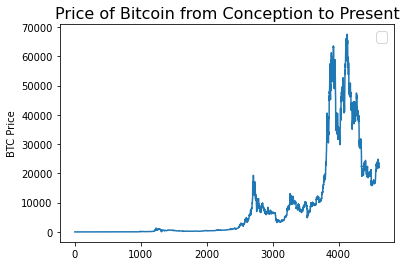

In [ ]:
import matplotlib.pyplot as plt
plt.plot(price_arr)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Conception to Present", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
full_windows, full_labels = make_windows(price_arr, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(4610, 4610)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3688, 922, 3688, 922)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1_q2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_q2_dense") # give the model a name so we can save it

# Compile model
model_1_q2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1_q2.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1_q2.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
22/29 [=====================>........] - ETA: 0s - loss: 1235.4879 - mae: 1235.4879 

29/29 [==============================] - 1s 21ms/step - loss: 1045.6566 - mae: 1045.6566 - val_loss: 2746.3206 - val_mae: 2746.3206
Epoch 2/100
23/29 [======================>.......] - ETA: 0s - loss: 221.7222 - mae: 221.7222

29/29 [==============================] - 0s 17ms/step - loss: 213.5975 - mae: 213.5975 - val_loss: 1927.7988 - val_mae: 1927.7988
Epoch 3/100
24/29 [=======================>......] - ETA: 0s - loss: 166.1995 - mae: 166.1995

29/29 [==============================] - 0s 16ms/step - loss: 164.1441 - mae: 164.1441 - val_loss: 1792.8694 - val_mae: 1792.8694
Epoch 4/100
24/29 [=======================>......] - ETA: 0s - loss: 155.6043 - mae: 155.6043

29/29 [==============================] - 0s 16ms/step - loss: 156.6891 - mae: 156.6891 - val_loss: 1759.8381 - val_mae: 1759.8381
Epoch 5/100
22/29 [=====================>........] - ETA: 0s - loss: 151.2341 - mae: 151.2341

29/29 [==============================] - 0s 16ms/step - loss: 147.3514 - mae: 147.3514 - val_loss: 1522.6965 - val_mae: 1522.6965
Epoch 6/100
22/29 [=====================>........] - ETA: 0s - loss: 133.5160 - mae: 133.5160

29/29 [==============================] - 1s 18ms/step - loss: 132.5400 - mae: 132.5400 - val_loss: 1386.4551 - val_mae: 1386.4551
Epoch 7/100
21/29 [====================>.........] - ETA: 0s - loss: 128.8757 - mae: 128.8757

29/29 [==============================] - 0s 17ms/step - loss: 122.0372 - mae: 122.0372 - val_loss: 1327.1830 - val_mae: 1327.1830
Epoch 8/100
21/29 [====================>.........] - ETA: 0s - loss: 113.5154 - mae: 113.5154

29/29 [==============================] - 0s 17ms/step - loss: 114.4579 - mae: 114.4579 - val_loss: 1259.2927 - val_mae: 1259.2927
Epoch 9/100
22/29 [=====================>........] - ETA: 0s - loss: 110.0424 - mae: 110.0424

29/29 [==============================] - 1s 18ms/step - loss: 111.8606 - mae: 111.8606 - val_loss: 1222.7810 - val_mae: 1222.7810
Epoch 10/100
21/29 [====================>.........] - ETA: 0s - loss: 110.7385 - mae: 110.7385

29/29 [==============================] - 0s 17ms/step - loss: 108.6665 - mae: 108.6665 - val_loss: 1201.2352 - val_mae: 1201.2352
Epoch 11/100
19/29 [==================>...........] - ETA: 0s - loss: 95.9678 - mae: 95.9678  

29/29 [==============================] - 0s 17ms/step - loss: 102.9288 - mae: 102.9288 - val_loss: 1149.4990 - val_mae: 1149.4990
Epoch 12/100
29/29 [==============================] - 0s 4ms/step - loss: 100.9986 - mae: 100.9986 - val_loss: 1243.0231 - val_mae: 1243.0231
Epoch 13/100
24/29 [=======================>......] - ETA: 0s - loss: 103.8452 - mae: 103.8452

29/29 [==============================] - 0s 16ms/step - loss: 101.4034 - mae: 101.4034 - val_loss: 1085.7577 - val_mae: 1085.7577
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 108.3606 - mae: 108.3606 - val_loss: 1278.4077 - val_mae: 1278.4077
Epoch 15/100
24/29 [=======================>......] - ETA: 0s - loss: 105.7370 - mae: 105.7370

29/29 [==============================] - 0s 16ms/step - loss: 103.6377 - mae: 103.6377 - val_loss: 1054.4877 - val_mae: 1054.4877
Epoch 16/100
29/29 [==============================] - 0s 4ms/step - loss: 99.1487 - mae: 99.1487 - val_loss: 1057.2074 - val_mae: 1057.2074
Epoch 17/100
21/29 [====================>.........] - ETA: 0s - loss: 90.4760 - mae: 90.4760

29/29 [==============================] - 0s 16ms/step - loss: 94.5872 - mae: 94.5872 - val_loss: 1030.7478 - val_mae: 1030.7478
Epoch 18/100
29/29 [==============================] - 0s 4ms/step - loss: 95.5625 - mae: 95.5625 - val_loss: 1079.8066 - val_mae: 1079.8066
Epoch 19/100
29/29 [==============================] - 0s 4ms/step - loss: 113.9046 - mae: 113.9046 - val_loss: 1037.3641 - val_mae: 1037.3641
Epoch 20/100
24/29 [=======================>......] - ETA: 0s - loss: 90.8414 - mae: 90.8414

29/29 [==============================] - 0s 16ms/step - loss: 90.9147 - mae: 90.9147 - val_loss: 1003.0973 - val_mae: 1003.0973
Epoch 21/100
24/29 [=======================>......] - ETA: 0s - loss: 90.3211 - mae: 90.3211  

29/29 [==============================] - 0s 16ms/step - loss: 89.8122 - mae: 89.8122 - val_loss: 1002.0996 - val_mae: 1002.0996
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 91.5200 - mae: 91.5200 - val_loss: 1218.4066 - val_mae: 1218.4066
Epoch 23/100
23/29 [======================>.......] - ETA: 0s - loss: 95.7285 - mae: 95.7285  

29/29 [==============================] - 0s 16ms/step - loss: 94.7147 - mae: 94.7147 - val_loss: 983.4151 - val_mae: 983.4151
Epoch 24/100
23/29 [======================>.......] - ETA: 0s - loss: 87.8123 - mae: 87.8123

29/29 [==============================] - 0s 16ms/step - loss: 88.2082 - mae: 88.2082 - val_loss: 980.4120 - val_mae: 980.4120
Epoch 25/100
29/29 [==============================] - 0s 4ms/step - loss: 94.8686 - mae: 94.8686 - val_loss: 992.8517 - val_mae: 992.8517
Epoch 26/100
29/29 [==============================] - 0s 3ms/step - loss: 86.8463 - mae: 86.8463 - val_loss: 992.1487 - val_mae: 992.1487
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 83.9149 - mae: 83.9149 - val_loss: 980.7444 - val_mae: 980.7444
Epoch 28/100
24/29 [=======================>......] - ETA: 0s - loss: 86.1718 - mae: 86.1718

29/29 [==============================] - 0s 16ms/step - loss: 86.2393 - mae: 86.2393 - val_loss: 953.3389 - val_mae: 953.3389
Epoch 29/100
29/29 [==============================] - 0s 4ms/step - loss: 84.3722 - mae: 84.3722 - val_loss: 976.8801 - val_mae: 976.8801
Epoch 30/100
24/29 [=======================>......] - ETA: 0s - loss: 84.0719 - mae: 84.0719

29/29 [==============================] - 0s 16ms/step - loss: 83.6333 - mae: 83.6333 - val_loss: 947.5034 - val_mae: 947.5034
Epoch 31/100
24/29 [=======================>......] - ETA: 0s - loss: 80.9769 - mae: 80.9769  

29/29 [==============================] - 0s 16ms/step - loss: 82.2980 - mae: 82.2980 - val_loss: 939.4566 - val_mae: 939.4566
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 85.3360 - mae: 85.3360 - val_loss: 1019.7716 - val_mae: 1019.7716
Epoch 33/100
29/29 [==============================] - 0s 3ms/step - loss: 83.0653 - mae: 83.0653 - val_loss: 942.4326 - val_mae: 942.4326
Epoch 34/100
29/29 [==============================] - 0s 3ms/step - loss: 82.2636 - mae: 82.2636 - val_loss: 939.8077 - val_mae: 939.8077
Epoch 35/100
29/29 [==============================] - 0s 3ms/step - loss: 81.8669 - mae: 81.8669 - val_loss: 976.2136 - val_mae: 976.2136
Epoch 36/100
29/29 [==============================] - 0s 3ms/step - loss: 87.5195 - mae: 87.5195 - val_loss: 973.4605 - val_mae: 973.4605
Epoch 37/100
23/29 [======================>.......] - ETA: 0s - loss: 88.2449 - mae: 88.2449

29/29 [==============================] - 0s 16ms/step - loss: 87.8952 - mae: 87.8952 - val_loss: 922.7061 - val_mae: 922.7061
Epoch 38/100
23/29 [======================>.......] - ETA: 0s - loss: 85.0662 - mae: 85.0662

29/29 [==============================] - 0s 16ms/step - loss: 83.7090 - mae: 83.7090 - val_loss: 921.5249 - val_mae: 921.5249
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 81.0536 - mae: 81.0536 - val_loss: 986.3143 - val_mae: 986.3143
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 90.3257 - mae: 90.3257 - val_loss: 1584.7909 - val_mae: 1584.7909
Epoch 41/100
29/29 [==============================] - 0s 4ms/step - loss: 95.7734 - mae: 95.7734 - val_loss: 1151.9836 - val_mae: 1151.9836
Epoch 42/100
29/29 [==============================] - 0s 3ms/step - loss: 82.5672 - mae: 82.5672 - val_loss: 939.1507 - val_mae: 939.1507
Epoch 43/100
22/29 [=====================>........] - ETA: 0s - loss: 83.0289 - mae: 83.0289

29/29 [==============================] - 0s 16ms/step - loss: 80.4841 - mae: 80.4841 - val_loss: 911.2072 - val_mae: 911.2072
Epoch 44/100
29/29 [==============================] - 0s 4ms/step - loss: 82.8043 - mae: 82.8043 - val_loss: 963.1493 - val_mae: 963.1493
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8662 - mae: 83.8662 - val_loss: 933.5247 - val_mae: 933.5247
Epoch 46/100
29/29 [==============================] - 0s 3ms/step - loss: 81.0379 - mae: 81.0379 - val_loss: 913.6667 - val_mae: 913.6667
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 82.5672 - mae: 82.5672 - val_loss: 912.7156 - val_mae: 912.7156
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 84.8777 - mae: 84.8777 - val_loss: 941.3905 - val_mae: 941.3905
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 80.9666 - mae: 80.9666 - val_loss: 962.4293 - val_mae: 962.4293
Epoch 50/100
29/29 [==========================

29/29 [==============================] - 1s 42ms/step - loss: 82.9408 - mae: 82.9408 - val_loss: 906.1898 - val_mae: 906.1898
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 79.2618 - mae: 79.2618 - val_loss: 953.5397 - val_mae: 953.5397
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 85.0029 - mae: 85.0029 - val_loss: 1147.4612 - val_mae: 1147.4612
Epoch 54/100
20/29 [===================>..........] - ETA: 0s - loss: 86.9345 - mae: 86.9345

29/29 [==============================] - 1s 19ms/step - loss: 84.5155 - mae: 84.5155 - val_loss: 905.1079 - val_mae: 905.1079
Epoch 55/100
20/29 [===================>..........] - ETA: 0s - loss: 88.4813 - mae: 88.4813

29/29 [==============================] - 1s 19ms/step - loss: 84.2492 - mae: 84.2492 - val_loss: 905.0119 - val_mae: 905.0119
Epoch 56/100
29/29 [==============================] - 0s 5ms/step - loss: 84.8786 - mae: 84.8786 - val_loss: 1032.6855 - val_mae: 1032.6855
Epoch 57/100
29/29 [==============================] - 0s 4ms/step - loss: 81.8750 - mae: 81.8750 - val_loss: 910.0149 - val_mae: 910.0149
Epoch 58/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9454 - mae: 81.9454 - val_loss: 912.2502 - val_mae: 912.2502
Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0270 - mae: 82.0270 - val_loss: 916.7285 - val_mae: 916.7285
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 80.3394 - mae: 80.3394 - val_loss: 954.0063 - val_mae: 954.0063
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 81.1627 - mae: 81.1627 - val_loss: 918.8550 - val_mae: 918.8550
Epoch 62/100
29/29 [========================

29/29 [==============================] - 0s 17ms/step - loss: 86.6241 - mae: 86.6241 - val_loss: 904.9505 - val_mae: 904.9505
Epoch 66/100
29/29 [==============================] - 0s 4ms/step - loss: 83.2239 - mae: 83.2239 - val_loss: 950.4314 - val_mae: 950.4314
Epoch 67/100
29/29 [==============================] - 0s 4ms/step - loss: 80.9978 - mae: 80.9978 - val_loss: 1155.2465 - val_mae: 1155.2465
Epoch 68/100
29/29 [==============================] - 0s 4ms/step - loss: 86.2299 - mae: 86.2299 - val_loss: 941.6723 - val_mae: 941.6723
Epoch 69/100
24/29 [=======================>......] - ETA: 0s - loss: 86.3023 - mae: 86.3023

29/29 [==============================] - 0s 17ms/step - loss: 83.4536 - mae: 83.4536 - val_loss: 902.8760 - val_mae: 902.8760
Epoch 70/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6425 - mae: 78.6425 - val_loss: 918.9316 - val_mae: 918.9316
Epoch 71/100
29/29 [==============================] - 0s 4ms/step - loss: 86.5634 - mae: 86.5634 - val_loss: 946.0128 - val_mae: 946.0128
Epoch 72/100
29/29 [==============================] - 0s 4ms/step - loss: 79.2315 - mae: 79.2315 - val_loss: 907.7930 - val_mae: 907.7930
Epoch 73/100
29/29 [==============================] - 0s 4ms/step - loss: 79.3634 - mae: 79.3634 - val_loss: 903.1483 - val_mae: 903.1483
Epoch 74/100
29/29 [==============================] - 0s 4ms/step - loss: 78.9078 - mae: 78.9078 - val_loss: 920.1362 - val_mae: 920.1362
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6580 - mae: 78.6580 - val_loss: 904.4525 - val_mae: 904.4525
Epoch 76/100
29/29 [==========================

In [ ]:
# Evaluate model on test data
model_1_q2.evaluate(test_windows, test_labels)

29/29 [==============================] - 0s 2ms/step - loss: 903.8221 - mae: 903.8221


[903.8221435546875, 903.8221435546875]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1_q2 = tf.keras.models.load_model("model_experiments/model_1_q2_dense")
model_1_q2.evaluate(test_windows, test_labels)

29/29 [==============================] - 0s 2ms/step - loss: 902.8760 - mae: 902.8760


[902.8760375976562, 902.8760375976562]

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_q2_preds = make_preds(model_1_q2, test_windows)
len(model_1_q2_preds), model_1_q2_preds[:10]

29/29 [==============================] - 0s 1ms/step


(922, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([11503.418, 11473.156, 11679.949, 11650.185, 11894.63 , 11453.898,
        10265.723, 10431.54 , 10053.488, 10271.424], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_q2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_q2_preds)
model_1_q2_results

{'mae': 902.876,
 'mse': 1927894.6,
 'rmse': 1388.4865,
 'mape': 2.5666761,
 'mase': 0.9947166}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## 3. For most of our models we used `WINDOW_SIZE=7`, but is there a better window size?
* Setup a series of experiments to find whether or not there's a better window size.
* For example, you might train 10 different models with `HORIZON=1` but with window sizes ranging from 2-12.

### Univariate (Model 1)

In [ ]:
models_results_q3 = {}
models_mapes_q3 = []
for w in [2,3,4,5,6,7,8,9,10,11,12]:

    HORIZON = 1 # predict 1 step at a time
    WINDOW_SIZE = w # use a week worth of timesteps to predict the horizon

    full_windows, full_labels = make_windows(price_arr, window_size=WINDOW_SIZE, horizon=HORIZON)
    len(full_windows), len(full_labels)

    train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
    len(train_windows), len(test_windows), len(train_labels), len(test_labels)


    # Set random seed for as reproducible results as possible
    tf.random.set_seed(42)

    # Construct model
    m_q3 = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
    ], name="model_1_w"+str(w)+"_q3") # give the model a name so we can save it

    # Compile model
    m_q3.compile(loss="mae",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

    # Fit model
    m_q3.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
                y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
                epochs=100,
                verbose=1,
                batch_size=128,
                validation_data=(test_windows, test_labels),
                callbacks=[create_model_checkpoint(model_name=m_q3.name)]) # create ModelCheckpoint callback to save best model

    m_q3_preds = make_preds(m_q3, test_windows)

    preds = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=m_q3_preds)
    
    models_results_q3['window_size_'+str(w)] = preds        
    models_mapes_q3.append(models_results_q3['window_size_'+str(w)]['mape'])

Epoch 1/100
22/29 [=====================>........] - ETA: 0s - loss: 1526.9316 - mae: 1526.9316 

29/29 [==============================] - 1s 23ms/step - loss: 1285.4520 - mae: 1285.4520 - val_loss: 3490.7229 - val_mae: 3490.7229
Epoch 2/100
22/29 [=====================>........] - ETA: 0s - loss: 170.6000 - mae: 170.6000

29/29 [==============================] - 1s 18ms/step - loss: 157.1021 - mae: 157.1021 - val_loss: 1550.7443 - val_mae: 1550.7443
Epoch 3/100
23/29 [======================>.......] - ETA: 0s - loss: 105.8317 - mae: 105.8317

29/29 [==============================] - 0s 17ms/step - loss: 99.8063 - mae: 99.8063 - val_loss: 1076.5350 - val_mae: 1076.5350
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 93.2894 - mae: 93.2894  

29/29 [==============================] - 0s 17ms/step - loss: 91.8191 - mae: 91.8191 - val_loss: 1050.1761 - val_mae: 1050.1761
Epoch 5/100
22/29 [=====================>........] - ETA: 0s - loss: 89.6472 - mae: 89.6472

29/29 [==============================] - 1s 19ms/step - loss: 88.2992 - mae: 88.2992 - val_loss: 1008.0812 - val_mae: 1008.0812
Epoch 6/100
20/29 [===================>..........] - ETA: 0s - loss: 81.5735 - mae: 81.5735

29/29 [==============================] - 1s 18ms/step - loss: 85.5061 - mae: 85.5061 - val_loss: 1003.9938 - val_mae: 1003.9938
Epoch 7/100
19/29 [==================>...........] - ETA: 0s - loss: 88.0508 - mae: 88.0508

29/29 [==============================] - 1s 18ms/step - loss: 84.1281 - mae: 84.1281 - val_loss: 977.7143 - val_mae: 977.7143
Epoch 8/100
19/29 [==================>...........] - ETA: 0s - loss: 81.0371 - mae: 81.0371  

29/29 [==============================] - 1s 18ms/step - loss: 83.3668 - mae: 83.3668 - val_loss: 970.4758 - val_mae: 970.4758
Epoch 9/100
23/29 [======================>.......] - ETA: 0s - loss: 84.1490 - mae: 84.1490

29/29 [==============================] - 0s 17ms/step - loss: 81.9318 - mae: 81.9318 - val_loss: 951.1388 - val_mae: 951.1388
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0197 - mae: 82.0197 - val_loss: 1007.0576 - val_mae: 1007.0576
Epoch 11/100
23/29 [======================>.......] - ETA: 0s - loss: 83.0192 - mae: 83.0192

29/29 [==============================] - 1s 37ms/step - loss: 81.6828 - mae: 81.6828 - val_loss: 942.1817 - val_mae: 942.1817
Epoch 12/100
24/29 [=======================>......] - ETA: 0s - loss: 78.3774 - mae: 78.3774

29/29 [==============================] - 0s 17ms/step - loss: 80.5763 - mae: 80.5763 - val_loss: 938.5815 - val_mae: 938.5815
Epoch 13/100
24/29 [=======================>......] - ETA: 0s - loss: 81.4897 - mae: 81.4897

29/29 [==============================] - 0s 17ms/step - loss: 79.5652 - mae: 79.5652 - val_loss: 934.9179 - val_mae: 934.9179
Epoch 14/100
23/29 [======================>.......] - ETA: 0s - loss: 81.6132 - mae: 81.6132

29/29 [==============================] - 0s 17ms/step - loss: 79.7853 - mae: 79.7853 - val_loss: 918.3906 - val_mae: 918.3906
Epoch 15/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2276 - mae: 81.2276 - val_loss: 969.5135 - val_mae: 969.5135
Epoch 16/100
23/29 [======================>.......] - ETA: 0s - loss: 76.1727 - mae: 76.1727

29/29 [==============================] - 0s 17ms/step - loss: 79.5091 - mae: 79.5091 - val_loss: 912.5929 - val_mae: 912.5929
Epoch 17/100
29/29 [==============================] - 0s 4ms/step - loss: 79.0656 - mae: 79.0656 - val_loss: 985.8766 - val_mae: 985.8766
Epoch 18/100
23/29 [======================>.......] - ETA: 0s - loss: 80.8834 - mae: 80.8834

29/29 [==============================] - 0s 17ms/step - loss: 79.1394 - mae: 79.1394 - val_loss: 910.3067 - val_mae: 910.3067
Epoch 19/100
29/29 [==============================] - 0s 4ms/step - loss: 78.2500 - mae: 78.2500 - val_loss: 988.2157 - val_mae: 988.2157
Epoch 20/100
24/29 [=======================>......] - ETA: 0s - loss: 81.8893 - mae: 81.8893

29/29 [==============================] - 0s 17ms/step - loss: 80.7940 - mae: 80.7940 - val_loss: 909.1207 - val_mae: 909.1207
Epoch 21/100
29/29 [==============================] - 0s 4ms/step - loss: 80.0949 - mae: 80.0949 - val_loss: 1055.1578 - val_mae: 1055.1578
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 82.4247 - mae: 82.4247 - val_loss: 1015.3204 - val_mae: 1015.3204
Epoch 23/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6237 - mae: 79.6237 - val_loss: 916.9668 - val_mae: 916.9668
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1582 - mae: 80.1582 - val_loss: 914.4606 - val_mae: 914.4606
Epoch 25/100
29/29 [==============================] - 0s 4ms/step - loss: 79.4004 - mae: 79.4004 - val_loss: 910.8986 - val_mae: 910.8986
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1218 - mae: 82.1218 - val_loss: 973.2786 - val_mae: 973.2786
Epoch 27/100
29/29 [======================

29/29 [==============================] - 0s 17ms/step - loss: 82.3909 - mae: 82.3909 - val_loss: 908.3724 - val_mae: 908.3724
Epoch 31/100
23/29 [======================>.......] - ETA: 0s - loss: 80.2314 - mae: 80.2314

29/29 [==============================] - 0s 17ms/step - loss: 79.5187 - mae: 79.5187 - val_loss: 906.9047 - val_mae: 906.9047
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 79.3321 - mae: 79.3321 - val_loss: 928.5885 - val_mae: 928.5885
Epoch 33/100
23/29 [======================>.......] - ETA: 0s - loss: 79.5998 - mae: 79.5998

29/29 [==============================] - 0s 17ms/step - loss: 79.8183 - mae: 79.8183 - val_loss: 905.2847 - val_mae: 905.2847
Epoch 34/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5529 - mae: 79.5529 - val_loss: 905.6877 - val_mae: 905.6877
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5389 - mae: 78.5389 - val_loss: 963.0162 - val_mae: 963.0162
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 80.7520 - mae: 80.7520 - val_loss: 949.1526 - val_mae: 949.1526
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 79.0196 - mae: 79.0196 - val_loss: 936.6681 - val_mae: 936.6681
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7084 - mae: 79.7084 - val_loss: 930.2800 - val_mae: 930.2800
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 79.2422 - mae: 79.2422 - val_loss: 942.8944 - val_mae: 942.8944
Epoch 40/100
29/29 [==========================

29/29 [==============================] - 0s 17ms/step - loss: 78.2350 - mae: 78.2350 - val_loss: 904.5930 - val_mae: 904.5930
Epoch 42/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1340 - mae: 80.1340 - val_loss: 905.7146 - val_mae: 905.7146
Epoch 43/100
18/29 [=================>............] - ETA: 0s - loss: 80.7891 - mae: 80.7891

29/29 [==============================] - 0s 18ms/step - loss: 80.4018 - mae: 80.4018 - val_loss: 904.4404 - val_mae: 904.4404
Epoch 44/100
29/29 [==============================] - 0s 4ms/step - loss: 79.8441 - mae: 79.8441 - val_loss: 905.9611 - val_mae: 905.9611
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7687 - mae: 79.7687 - val_loss: 914.6221 - val_mae: 914.6221
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5034 - mae: 79.5034 - val_loss: 937.3304 - val_mae: 937.3304
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6964 - mae: 79.6964 - val_loss: 933.7931 - val_mae: 933.7931
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 78.1768 - mae: 78.1768 - val_loss: 909.2457 - val_mae: 909.2457
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 79.8490 - mae: 79.8490 - val_loss: 914.6362 - val_mae: 914.6362
Epoch 50/100
29/29 [==========================

29/29 [==============================] - 1s 18ms/step - loss: 78.7446 - mae: 78.7446 - val_loss: 904.3370 - val_mae: 904.3370
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5274 - mae: 78.5274 - val_loss: 930.7529 - val_mae: 930.7529
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 84.4500 - mae: 84.4500 - val_loss: 999.1976 - val_mae: 999.1976
Epoch 57/100
29/29 [==============================] - 0s 4ms/step - loss: 86.6564 - mae: 86.6564 - val_loss: 1065.9701 - val_mae: 1065.9701
Epoch 58/100
29/29 [==============================] - 0s 4ms/step - loss: 81.5157 - mae: 81.5157 - val_loss: 922.8000 - val_mae: 922.8000
Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7257 - mae: 79.7257 - val_loss: 907.9928 - val_mae: 907.9928
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 78.7149 - mae: 78.7149 - val_loss: 904.5024 - val_mae: 904.5024
Epoch 61/100
29/29 [========================

29/29 [==============================] - 1s 21ms/step - loss: 1471.5343 - mae: 1471.5343 - val_loss: 4395.4253 - val_mae: 4395.4253
Epoch 2/100
23/29 [======================>.......] - ETA: 0s - loss: 177.8221 - mae: 177.8221

29/29 [==============================] - 0s 17ms/step - loss: 172.0057 - mae: 172.0057 - val_loss: 1400.7539 - val_mae: 1400.7539
Epoch 3/100
20/29 [===================>..........] - ETA: 0s - loss: 106.7511 - mae: 106.7511

29/29 [==============================] - 0s 17ms/step - loss: 108.1429 - mae: 108.1429 - val_loss: 1157.3885 - val_mae: 1157.3885
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 98.9978 - mae: 98.9978

29/29 [==============================] - 0s 17ms/step - loss: 98.5444 - mae: 98.5444 - val_loss: 1113.7960 - val_mae: 1113.7960
Epoch 5/100
23/29 [======================>.......] - ETA: 0s - loss: 93.8754 - mae: 93.8754  

29/29 [==============================] - 0s 16ms/step - loss: 90.6969 - mae: 90.6969 - val_loss: 1014.4210 - val_mae: 1014.4210
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 89.1173 - mae: 89.1173 - val_loss: 1045.7709 - val_mae: 1045.7709
Epoch 7/100
23/29 [======================>.......] - ETA: 0s - loss: 83.5965 - mae: 83.5965  

29/29 [==============================] - 0s 16ms/step - loss: 86.2540 - mae: 86.2540 - val_loss: 1008.9603 - val_mae: 1008.9603
Epoch 8/100
23/29 [======================>.......] - ETA: 0s - loss: 83.6823 - mae: 83.6823

29/29 [==============================] - 0s 16ms/step - loss: 85.0591 - mae: 85.0591 - val_loss: 958.6481 - val_mae: 958.6481
Epoch 9/100
22/29 [=====================>........] - ETA: 0s - loss: 85.4027 - mae: 85.4027

29/29 [==============================] - 0s 16ms/step - loss: 83.7881 - mae: 83.7881 - val_loss: 947.9246 - val_mae: 947.9246
Epoch 10/100
23/29 [======================>.......] - ETA: 0s - loss: 80.7422 - mae: 80.7422

29/29 [==============================] - 0s 17ms/step - loss: 82.7753 - mae: 82.7753 - val_loss: 941.5797 - val_mae: 941.5797
Epoch 11/100
23/29 [======================>.......] - ETA: 0s - loss: 81.1793 - mae: 81.1793

29/29 [==============================] - 1s 18ms/step - loss: 81.5145 - mae: 81.5145 - val_loss: 937.3024 - val_mae: 937.3024
Epoch 12/100
20/29 [===================>..........] - ETA: 0s - loss: 83.3645 - mae: 83.3645  

29/29 [==============================] - 0s 18ms/step - loss: 80.6074 - mae: 80.6074 - val_loss: 931.0974 - val_mae: 931.0974
Epoch 13/100
29/29 [==============================] - 0s 4ms/step - loss: 81.4236 - mae: 81.4236 - val_loss: 943.0358 - val_mae: 943.0358
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 80.0909 - mae: 80.0909 - val_loss: 932.5386 - val_mae: 932.5386
Epoch 15/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1161 - mae: 82.1161 - val_loss: 950.9878 - val_mae: 950.9878
Epoch 16/100
21/29 [====================>.........] - ETA: 0s - loss: 81.3441 - mae: 81.3441  

29/29 [==============================] - 0s 17ms/step - loss: 81.7183 - mae: 81.7183 - val_loss: 917.5605 - val_mae: 917.5605
Epoch 17/100
29/29 [==============================] - 0s 4ms/step - loss: 78.8766 - mae: 78.8766 - val_loss: 1014.6769 - val_mae: 1014.6769
Epoch 18/100
29/29 [==============================] - 0s 4ms/step - loss: 83.3958 - mae: 83.3958 - val_loss: 944.9730 - val_mae: 944.9730
Epoch 19/100
23/29 [======================>.......] - ETA: 0s - loss: 82.4352 - mae: 82.4352

29/29 [==============================] - 0s 17ms/step - loss: 80.3046 - mae: 80.3046 - val_loss: 909.0156 - val_mae: 909.0156
Epoch 20/100
29/29 [==============================] - 0s 4ms/step - loss: 78.8166 - mae: 78.8166 - val_loss: 912.7839 - val_mae: 912.7839
Epoch 21/100
24/29 [=======================>......] - ETA: 0s - loss: 83.1232 - mae: 83.1232

29/29 [==============================] - 0s 16ms/step - loss: 81.5475 - mae: 81.5475 - val_loss: 905.2347 - val_mae: 905.2347
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6700 - mae: 79.6700 - val_loss: 912.2076 - val_mae: 912.2076
Epoch 23/100
29/29 [==============================] - 0s 4ms/step - loss: 80.9284 - mae: 80.9284 - val_loss: 923.9030 - val_mae: 923.9030
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 78.8370 - mae: 78.8370 - val_loss: 918.5447 - val_mae: 918.5447
Epoch 25/100
29/29 [==============================] - 0s 4ms/step - loss: 80.5866 - mae: 80.5866 - val_loss: 923.2014 - val_mae: 923.2014
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 78.4526 - mae: 78.4526 - val_loss: 916.2115 - val_mae: 916.2115
Epoch 27/100
29/29 [==============================] - 0s 3ms/step - loss: 79.7421 - mae: 79.7421 - val_loss: 918.0692 - val_mae: 918.0692
Epoch 28/100
29/29 [==========================

29/29 [==============================] - 0s 17ms/step - loss: 81.1028 - mae: 81.1028 - val_loss: 904.9809 - val_mae: 904.9809
Epoch 34/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6852 - mae: 78.6852 - val_loss: 931.7782 - val_mae: 931.7782
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 84.2677 - mae: 84.2677 - val_loss: 954.7802 - val_mae: 954.7802
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 80.3120 - mae: 80.3120 - val_loss: 908.9863 - val_mae: 908.9863
Epoch 37/100
23/29 [======================>.......] - ETA: 0s - loss: 82.6392 - mae: 82.6392

29/29 [==============================] - 0s 16ms/step - loss: 81.5398 - mae: 81.5398 - val_loss: 904.7371 - val_mae: 904.7371
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 82.4135 - mae: 82.4135 - val_loss: 993.6905 - val_mae: 993.6905
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 82.9887 - mae: 82.9887 - val_loss: 945.6617 - val_mae: 945.6617
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5806 - mae: 79.5806 - val_loss: 1061.3831 - val_mae: 1061.3831
Epoch 41/100
29/29 [==============================] - 0s 4ms/step - loss: 81.7617 - mae: 81.7617 - val_loss: 1086.7615 - val_mae: 1086.7615
Epoch 42/100
23/29 [======================>.......] - ETA: 0s - loss: 89.4666 - mae: 89.4666  

29/29 [==============================] - 0s 16ms/step - loss: 84.9803 - mae: 84.9803 - val_loss: 904.0126 - val_mae: 904.0126
Epoch 43/100
29/29 [==============================] - 0s 4ms/step - loss: 80.7714 - mae: 80.7714 - val_loss: 913.0540 - val_mae: 913.0540
Epoch 44/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5366 - mae: 78.5366 - val_loss: 949.9930 - val_mae: 949.9930
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 78.7211 - mae: 78.7211 - val_loss: 912.8959 - val_mae: 912.8959
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5663 - mae: 78.5663 - val_loss: 904.9608 - val_mae: 904.9608
Epoch 47/100
29/29 [==============================] - 0s 3ms/step - loss: 81.8924 - mae: 81.8924 - val_loss: 929.6936 - val_mae: 929.6936
Epoch 48/100
23/29 [======================>.......] - ETA: 0s - loss: 82.1404 - mae: 82.1404

29/29 [==============================] - 0s 16ms/step - loss: 78.5997 - mae: 78.5997 - val_loss: 903.6861 - val_mae: 903.6861
Epoch 49/100
29/29 [==============================] - 0s 3ms/step - loss: 79.2559 - mae: 79.2559 - val_loss: 905.3785 - val_mae: 905.3785
Epoch 50/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5949 - mae: 79.5949 - val_loss: 936.9393 - val_mae: 936.9393
Epoch 51/100
29/29 [==============================] - 0s 4ms/step - loss: 83.4704 - mae: 83.4704 - val_loss: 907.3250 - val_mae: 907.3250
Epoch 52/100
29/29 [==============================] - 0s 3ms/step - loss: 79.9565 - mae: 79.9565 - val_loss: 905.0884 - val_mae: 905.0884
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5167 - mae: 78.5167 - val_loss: 908.4567 - val_mae: 908.4567
Epoch 54/100
29/29 [==============================] - 0s 4ms/step - loss: 79.4534 - mae: 79.4534 - val_loss: 950.4346 - val_mae: 950.4346
Epoch 55/100
29/29 [==========================

29/29 [==============================] - 1s 20ms/step - loss: 1893.3853 - mae: 1893.3853 - val_loss: 6856.2476 - val_mae: 6856.2476
Epoch 2/100
24/29 [=======================>......] - ETA: 0s - loss: 216.3039 - mae: 216.3039

29/29 [==============================] - 0s 16ms/step - loss: 206.5429 - mae: 206.5429 - val_loss: 1458.2267 - val_mae: 1458.2267
Epoch 3/100
23/29 [======================>.......] - ETA: 0s - loss: 112.6243 - mae: 112.6243

29/29 [==============================] - 0s 16ms/step - loss: 114.3230 - mae: 114.3230 - val_loss: 1234.2312 - val_mae: 1234.2312
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 109.7099 - mae: 109.7099

29/29 [==============================] - 0s 16ms/step - loss: 106.7922 - mae: 106.7922 - val_loss: 1207.2932 - val_mae: 1207.2932
Epoch 5/100
23/29 [======================>.......] - ETA: 0s - loss: 104.0142 - mae: 104.0142

29/29 [==============================] - 0s 16ms/step - loss: 104.1416 - mae: 104.1416 - val_loss: 1194.9689 - val_mae: 1194.9689
Epoch 6/100
23/29 [======================>.......] - ETA: 0s - loss: 104.3902 - mae: 104.3902

29/29 [==============================] - 1s 44ms/step - loss: 103.0338 - mae: 103.0338 - val_loss: 1178.6650 - val_mae: 1178.6650
Epoch 7/100
19/29 [==================>...........] - ETA: 0s - loss: 98.3930 - mae: 98.3930  

29/29 [==============================] - 1s 19ms/step - loss: 101.3818 - mae: 101.3818 - val_loss: 1158.1060 - val_mae: 1158.1060
Epoch 8/100
21/29 [====================>.........] - ETA: 0s - loss: 100.6968 - mae: 100.6968

29/29 [==============================] - 1s 18ms/step - loss: 99.1550 - mae: 99.1550 - val_loss: 1121.6965 - val_mae: 1121.6965
Epoch 9/100
23/29 [======================>.......] - ETA: 0s - loss: 102.0400 - mae: 102.0400

29/29 [==============================] - 1s 18ms/step - loss: 95.9468 - mae: 95.9468 - val_loss: 1088.4302 - val_mae: 1088.4302
Epoch 10/100
23/29 [======================>.......] - ETA: 0s - loss: 92.2471 - mae: 92.2471

29/29 [==============================] - 0s 18ms/step - loss: 92.7736 - mae: 92.7736 - val_loss: 1064.4913 - val_mae: 1064.4913
Epoch 11/100
29/29 [==============================] - 0s 4ms/step - loss: 92.2801 - mae: 92.2801 - val_loss: 1068.3518 - val_mae: 1068.3518
Epoch 12/100
23/29 [======================>.......] - ETA: 0s - loss: 90.4466 - mae: 90.4466

29/29 [==============================] - 0s 17ms/step - loss: 89.5588 - mae: 89.5588 - val_loss: 1017.9756 - val_mae: 1017.9756
Epoch 13/100
22/29 [=====================>........] - ETA: 0s - loss: 86.7959 - mae: 86.7959

29/29 [==============================] - 0s 17ms/step - loss: 88.4375 - mae: 88.4375 - val_loss: 1000.2630 - val_mae: 1000.2630
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 87.4506 - mae: 87.4506 - val_loss: 1002.2771 - val_mae: 1002.2771
Epoch 15/100
23/29 [======================>.......] - ETA: 0s - loss: 87.1915 - mae: 87.1915  

29/29 [==============================] - 0s 17ms/step - loss: 86.4716 - mae: 86.4716 - val_loss: 979.5728 - val_mae: 979.5728
Epoch 16/100
21/29 [====================>.........] - ETA: 0s - loss: 83.0766 - mae: 83.0766

29/29 [==============================] - 0s 17ms/step - loss: 85.5475 - mae: 85.5475 - val_loss: 972.8790 - val_mae: 972.8790
Epoch 17/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8995 - mae: 83.8995 - val_loss: 976.3385 - val_mae: 976.3385
Epoch 18/100
29/29 [==============================] - 0s 4ms/step - loss: 83.3031 - mae: 83.3031 - val_loss: 1068.0714 - val_mae: 1068.0714
Epoch 19/100
23/29 [======================>.......] - ETA: 0s - loss: 81.6199 - mae: 81.6199

29/29 [==============================] - 0s 17ms/step - loss: 83.5849 - mae: 83.5849 - val_loss: 956.1183 - val_mae: 956.1183
Epoch 20/100
23/29 [======================>.......] - ETA: 0s - loss: 84.5665 - mae: 84.5665

29/29 [==============================] - 0s 17ms/step - loss: 81.7111 - mae: 81.7111 - val_loss: 941.6534 - val_mae: 941.6534
Epoch 21/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2074 - mae: 81.2074 - val_loss: 1072.8846 - val_mae: 1072.8846
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 86.5415 - mae: 86.5415 - val_loss: 1040.6963 - val_mae: 1040.6963
Epoch 23/100
23/29 [======================>.......] - ETA: 0s - loss: 82.3522 - mae: 82.3522  

29/29 [==============================] - 1s 18ms/step - loss: 82.5530 - mae: 82.5530 - val_loss: 938.2735 - val_mae: 938.2735
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1669 - mae: 82.1669 - val_loss: 1000.6466 - val_mae: 1000.6466
Epoch 25/100
20/29 [===================>..........] - ETA: 0s - loss: 82.4200 - mae: 82.4200

29/29 [==============================] - 1s 18ms/step - loss: 80.7124 - mae: 80.7124 - val_loss: 926.4868 - val_mae: 926.4868
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 84.1647 - mae: 84.1647 - val_loss: 1078.8328 - val_mae: 1078.8328
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 85.8242 - mae: 85.8242 - val_loss: 929.3309 - val_mae: 929.3309
Epoch 28/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4140 - mae: 80.4140 - val_loss: 942.4113 - val_mae: 942.4113
Epoch 29/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6443 - mae: 79.6443 - val_loss: 940.4843 - val_mae: 940.4843
Epoch 30/100
18/29 [=================>............] - ETA: 0s - loss: 78.6782 - mae: 78.6782  

29/29 [==============================] - 1s 19ms/step - loss: 80.2407 - mae: 80.2407 - val_loss: 922.1755 - val_mae: 922.1755
Epoch 31/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4247 - mae: 80.4247 - val_loss: 926.6741 - val_mae: 926.6741
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 82.6189 - mae: 82.6189 - val_loss: 1022.3774 - val_mae: 1022.3774
Epoch 33/100
29/29 [==============================] - 0s 4ms/step - loss: 85.7568 - mae: 85.7568 - val_loss: 947.1984 - val_mae: 947.1984
Epoch 34/100
29/29 [==============================] - 0s 4ms/step - loss: 82.7320 - mae: 82.7320 - val_loss: 925.9276 - val_mae: 925.9276
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6029 - mae: 79.6029 - val_loss: 951.9376 - val_mae: 951.9376
Epoch 36/100
23/29 [======================>.......] - ETA: 0s - loss: 80.4616 - mae: 80.4616

29/29 [==============================] - 0s 17ms/step - loss: 81.0192 - mae: 81.0192 - val_loss: 917.6227 - val_mae: 917.6227
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 82.9419 - mae: 82.9419 - val_loss: 932.3019 - val_mae: 932.3019
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 80.3987 - mae: 80.3987 - val_loss: 920.3354 - val_mae: 920.3354
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 79.1963 - mae: 79.1963 - val_loss: 950.2409 - val_mae: 950.2409
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5717 - mae: 78.5717 - val_loss: 926.5703 - val_mae: 926.5703
Epoch 41/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6440 - mae: 79.6440 - val_loss: 920.7283 - val_mae: 920.7283
Epoch 42/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5107 - mae: 79.5107 - val_loss: 949.6608 - val_mae: 949.6608
Epoch 43/100
23/29 [======================>...

29/29 [==============================] - 0s 17ms/step - loss: 78.9698 - mae: 78.9698 - val_loss: 914.7198 - val_mae: 914.7198
Epoch 44/100
29/29 [==============================] - 0s 4ms/step - loss: 82.2586 - mae: 82.2586 - val_loss: 1000.4804 - val_mae: 1000.4804
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 78.8465 - mae: 78.8465 - val_loss: 917.9712 - val_mae: 917.9712
Epoch 46/100
19/29 [==================>...........] - ETA: 0s - loss: 77.4748 - mae: 77.4748

29/29 [==============================] - 0s 17ms/step - loss: 79.3755 - mae: 79.3755 - val_loss: 913.9824 - val_mae: 913.9824
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2752 - mae: 81.2752 - val_loss: 1058.4197 - val_mae: 1058.4197
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 83.4058 - mae: 83.4058 - val_loss: 967.1570 - val_mae: 967.1570
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 80.2821 - mae: 80.2821 - val_loss: 945.9124 - val_mae: 945.9124
Epoch 50/100
29/29 [==============================] - 0s 3ms/step - loss: 85.4836 - mae: 85.4836 - val_loss: 1014.1521 - val_mae: 1014.1521
Epoch 51/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0779 - mae: 82.0779 - val_loss: 1026.0692 - val_mae: 1026.0692
Epoch 52/100
21/29 [====================>.........] - ETA: 0s - loss: 80.0612 - mae: 80.0612

29/29 [==============================] - 0s 17ms/step - loss: 80.7875 - mae: 80.7875 - val_loss: 912.8046 - val_mae: 912.8046
Epoch 53/100
23/29 [======================>.......] - ETA: 0s - loss: 78.6888 - mae: 78.6888  

29/29 [==============================] - 0s 17ms/step - loss: 79.5535 - mae: 79.5535 - val_loss: 912.7504 - val_mae: 912.7504
Epoch 54/100
22/29 [=====================>........] - ETA: 0s - loss: 78.4014 - mae: 78.4014

29/29 [==============================] - 0s 17ms/step - loss: 78.3412 - mae: 78.3412 - val_loss: 912.3035 - val_mae: 912.3035
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6006 - mae: 79.6006 - val_loss: 945.9468 - val_mae: 945.9468
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5517 - mae: 78.5517 - val_loss: 912.5386 - val_mae: 912.5386
Epoch 57/100
29/29 [==============================] - 0s 4ms/step - loss: 79.8446 - mae: 79.8446 - val_loss: 965.9428 - val_mae: 965.9428
Epoch 58/100
29/29 [==============================] - 0s 3ms/step - loss: 79.0362 - mae: 79.0362 - val_loss: 1031.7307 - val_mae: 1031.7307
Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 83.1376 - mae: 83.1376 - val_loss: 921.1815 - val_mae: 921.1815
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 89.9247 - mae: 89.9247 - val_loss: 917.4887 - val_mae: 917.4887
Epoch 61/100
29/29 [========================

29/29 [==============================] - 0s 16ms/step - loss: 79.4137 - mae: 79.4137 - val_loss: 912.2876 - val_mae: 912.2876
Epoch 64/100
29/29 [==============================] - 0s 4ms/step - loss: 81.6947 - mae: 81.6947 - val_loss: 934.8604 - val_mae: 934.8604
Epoch 65/100
23/29 [======================>.......] - ETA: 0s - loss: 86.0327 - mae: 86.0327

29/29 [==============================] - 0s 16ms/step - loss: 84.6011 - mae: 84.6011 - val_loss: 910.3610 - val_mae: 910.3610
Epoch 66/100
29/29 [==============================] - 0s 4ms/step - loss: 78.5111 - mae: 78.5111 - val_loss: 927.0220 - val_mae: 927.0220
Epoch 67/100
29/29 [==============================] - 0s 4ms/step - loss: 79.2289 - mae: 79.2289 - val_loss: 932.2560 - val_mae: 932.2560
Epoch 68/100
29/29 [==============================] - 0s 4ms/step - loss: 80.0787 - mae: 80.0787 - val_loss: 911.5031 - val_mae: 911.5031
Epoch 69/100
24/29 [=======================>......] - ETA: 0s - loss: 76.7589 - mae: 76.7589

29/29 [==============================] - 0s 16ms/step - loss: 79.0693 - mae: 79.0693 - val_loss: 910.2340 - val_mae: 910.2340
Epoch 70/100
29/29 [==============================] - 0s 4ms/step - loss: 80.8109 - mae: 80.8109 - val_loss: 962.5067 - val_mae: 962.5067
Epoch 71/100
29/29 [==============================] - 0s 3ms/step - loss: 82.5542 - mae: 82.5542 - val_loss: 968.1091 - val_mae: 968.1091
Epoch 72/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6857 - mae: 78.6857 - val_loss: 916.7973 - val_mae: 916.7973
Epoch 73/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2162 - mae: 81.2162 - val_loss: 921.1286 - val_mae: 921.1286
Epoch 74/100
29/29 [==============================] - 0s 4ms/step - loss: 79.3979 - mae: 79.3979 - val_loss: 953.4154 - val_mae: 953.4154
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 79.9867 - mae: 79.9867 - val_loss: 1049.2134 - val_mae: 1049.2134
Epoch 76/100
29/29 [========================

29/29 [==============================] - 0s 18ms/step - loss: 78.8413 - mae: 78.8413 - val_loss: 908.0759 - val_mae: 908.0759
Epoch 90/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2558 - mae: 81.2558 - val_loss: 921.6746 - val_mae: 921.6746
Epoch 91/100
29/29 [==============================] - 0s 4ms/step - loss: 78.7492 - mae: 78.7492 - val_loss: 1043.7483 - val_mae: 1043.7483
Epoch 92/100
29/29 [==============================] - 0s 4ms/step - loss: 81.5259 - mae: 81.5259 - val_loss: 958.5756 - val_mae: 958.5756
Epoch 93/100
29/29 [==============================] - 0s 4ms/step - loss: 82.8789 - mae: 82.8789 - val_loss: 921.9041 - val_mae: 921.9041
Epoch 94/100
29/29 [==============================] - 0s 4ms/step - loss: 80.8918 - mae: 80.8918 - val_loss: 910.3087 - val_mae: 910.3087
Epoch 95/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6030 - mae: 78.6030 - val_loss: 916.9764 - val_mae: 916.9764
Epoch 96/100
29/29 [========================

29/29 [==============================] - 0s 18ms/step - loss: 78.7303 - mae: 78.7303 - val_loss: 907.7007 - val_mae: 907.7007
Epoch 99/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6477 - mae: 78.6477 - val_loss: 907.8212 - val_mae: 907.8212
Epoch 100/100
29/29 [==============================] - 0s 1ms/step
Epoch 1/100
23/29 [======================>.......] - ETA: 0s - loss: 1790.0027 - mae: 1790.0027 

29/29 [==============================] - 1s 21ms/step - loss: 1477.6199 - mae: 1477.6199 - val_loss: 3322.3530 - val_mae: 3322.3530
Epoch 2/100
24/29 [=======================>......] - ETA: 0s - loss: 222.1408 - mae: 222.1408

29/29 [==============================] - 0s 17ms/step - loss: 210.2614 - mae: 210.2614 - val_loss: 1880.1708 - val_mae: 1880.1708
Epoch 3/100
23/29 [======================>.......] - ETA: 0s - loss: 130.7362 - mae: 130.7362

29/29 [==============================] - 0s 16ms/step - loss: 136.5723 - mae: 136.5723 - val_loss: 1473.0936 - val_mae: 1473.0936
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 122.3431 - mae: 122.3431

29/29 [==============================] - 0s 16ms/step - loss: 126.9991 - mae: 126.9991 - val_loss: 1404.4679 - val_mae: 1404.4679
Epoch 5/100
23/29 [======================>.......] - ETA: 0s - loss: 121.5718 - mae: 121.5718

29/29 [==============================] - 0s 16ms/step - loss: 120.7973 - mae: 120.7973 - val_loss: 1377.6506 - val_mae: 1377.6506
Epoch 6/100
23/29 [======================>.......] - ETA: 0s - loss: 113.0244 - mae: 113.0244

29/29 [==============================] - 0s 16ms/step - loss: 116.8332 - mae: 116.8332 - val_loss: 1344.7510 - val_mae: 1344.7510
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 113.5459 - mae: 113.5459 - val_loss: 1484.6461 - val_mae: 1484.6461
Epoch 8/100
24/29 [=======================>......] - ETA: 0s - loss: 117.7115 - mae: 117.7115

29/29 [==============================] - 0s 17ms/step - loss: 113.2939 - mae: 113.2939 - val_loss: 1271.6743 - val_mae: 1271.6743
Epoch 9/100
23/29 [======================>.......] - ETA: 0s - loss: 107.0658 - mae: 107.0658

29/29 [==============================] - 0s 16ms/step - loss: 107.1899 - mae: 107.1899 - val_loss: 1199.6451 - val_mae: 1199.6451
Epoch 10/100
23/29 [======================>.......] - ETA: 0s - loss: 100.8906 - mae: 100.8906

29/29 [==============================] - 0s 16ms/step - loss: 102.5543 - mae: 102.5543 - val_loss: 1184.9122 - val_mae: 1184.9122
Epoch 11/100
21/29 [====================>.........] - ETA: 0s - loss: 106.0904 - mae: 106.0904

29/29 [==============================] - 0s 17ms/step - loss: 100.8560 - mae: 100.8560 - val_loss: 1140.7672 - val_mae: 1140.7672
Epoch 12/100
21/29 [====================>.........] - ETA: 0s - loss: 97.5404 - mae: 97.5404

29/29 [==============================] - 0s 17ms/step - loss: 95.9541 - mae: 95.9541 - val_loss: 1093.0184 - val_mae: 1093.0184
Epoch 13/100
23/29 [======================>.......] - ETA: 0s - loss: 87.3827 - mae: 87.3827

29/29 [==============================] - 0s 17ms/step - loss: 93.0204 - mae: 93.0204 - val_loss: 1065.4780 - val_mae: 1065.4780
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 90.9559 - mae: 90.9559 - val_loss: 1100.7354 - val_mae: 1100.7354
Epoch 15/100
22/29 [=====================>........] - ETA: 0s - loss: 89.8228 - mae: 89.8228

29/29 [==============================] - 0s 17ms/step - loss: 89.6772 - mae: 89.6772 - val_loss: 1058.1833 - val_mae: 1058.1833
Epoch 16/100
20/29 [===================>..........] - ETA: 0s - loss: 87.8367 - mae: 87.8367  

29/29 [==============================] - 0s 16ms/step - loss: 88.0903 - mae: 88.0903 - val_loss: 1013.6874 - val_mae: 1013.6874
Epoch 17/100
29/29 [==============================] - 0s 4ms/step - loss: 86.7258 - mae: 86.7258 - val_loss: 1203.9100 - val_mae: 1203.9100
Epoch 18/100
23/29 [======================>.......] - ETA: 0s - loss: 94.2184 - mae: 94.2184

29/29 [==============================] - 1s 44ms/step - loss: 89.6405 - mae: 89.6405 - val_loss: 1002.0192 - val_mae: 1002.0192
Epoch 19/100
29/29 [==============================] - 0s 4ms/step - loss: 85.4195 - mae: 85.4195 - val_loss: 1019.3420 - val_mae: 1019.3420
Epoch 20/100
29/29 [==============================] - 0s 4ms/step - loss: 87.1303 - mae: 87.1303 - val_loss: 1100.9290 - val_mae: 1100.9290
Epoch 21/100
29/29 [==============================] - 0s 4ms/step - loss: 90.3956 - mae: 90.3956 - val_loss: 1008.7596 - val_mae: 1008.7596
Epoch 22/100
23/29 [======================>.......] - ETA: 0s - loss: 87.8165 - mae: 87.8165

29/29 [==============================] - 1s 18ms/step - loss: 90.2585 - mae: 90.2585 - val_loss: 977.4058 - val_mae: 977.4058
Epoch 23/100
19/29 [==================>...........] - ETA: 0s - loss: 89.4593 - mae: 89.4593

29/29 [==============================] - 1s 20ms/step - loss: 90.7109 - mae: 90.7109 - val_loss: 967.0659 - val_mae: 967.0659
Epoch 24/100
29/29 [==============================] - 0s 5ms/step - loss: 88.5398 - mae: 88.5398 - val_loss: 970.9680 - val_mae: 970.9680
Epoch 25/100
29/29 [==============================] - 0s 4ms/step - loss: 86.4481 - mae: 86.4481 - val_loss: 1090.2386 - val_mae: 1090.2386
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 84.5004 - mae: 84.5004 - val_loss: 985.9081 - val_mae: 985.9081
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 82.4105 - mae: 82.4105 - val_loss: 971.0473 - val_mae: 971.0473
Epoch 28/100
18/29 [=================>............] - ETA: 0s - loss: 84.4441 - mae: 84.4441  

29/29 [==============================] - 1s 20ms/step - loss: 82.0406 - mae: 82.0406 - val_loss: 957.6699 - val_mae: 957.6699
Epoch 29/100
29/29 [==============================] - 0s 5ms/step - loss: 81.8418 - mae: 81.8418 - val_loss: 971.5367 - val_mae: 971.5367
Epoch 30/100
21/29 [====================>.........] - ETA: 0s - loss: 86.7723 - mae: 86.7723

29/29 [==============================] - 1s 18ms/step - loss: 84.7942 - mae: 84.7942 - val_loss: 950.8510 - val_mae: 950.8510
Epoch 31/100
22/29 [=====================>........] - ETA: 0s - loss: 80.1044 - mae: 80.1044

29/29 [==============================] - 1s 18ms/step - loss: 81.8969 - mae: 81.8969 - val_loss: 931.9891 - val_mae: 931.9891
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 82.8363 - mae: 82.8363 - val_loss: 1033.0505 - val_mae: 1033.0505
Epoch 33/100
29/29 [==============================] - 0s 4ms/step - loss: 81.7048 - mae: 81.7048 - val_loss: 959.4019 - val_mae: 959.4019
Epoch 34/100
29/29 [==============================] - 0s 4ms/step - loss: 82.8229 - mae: 82.8229 - val_loss: 949.9383 - val_mae: 949.9383
Epoch 35/100
21/29 [====================>.........] - ETA: 0s - loss: 80.0375 - mae: 80.0375

29/29 [==============================] - 1s 18ms/step - loss: 82.0471 - mae: 82.0471 - val_loss: 922.5124 - val_mae: 922.5124
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1297 - mae: 82.1297 - val_loss: 932.4680 - val_mae: 932.4680
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7274 - mae: 79.7274 - val_loss: 940.3781 - val_mae: 940.3781
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4626 - mae: 80.4626 - val_loss: 969.4404 - val_mae: 969.4404
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 83.1423 - mae: 83.1423 - val_loss: 954.3472 - val_mae: 954.3472
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1683 - mae: 82.1683 - val_loss: 967.2603 - val_mae: 967.2603
Epoch 41/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4251 - mae: 80.4251 - val_loss: 953.8652 - val_mae: 953.8652
Epoch 42/100
29/29 [==========================

29/29 [==============================] - 0s 17ms/step - loss: 81.2832 - mae: 81.2832 - val_loss: 918.1351 - val_mae: 918.1351
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 79.4574 - mae: 79.4574 - val_loss: 933.8152 - val_mae: 933.8152
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1043 - mae: 80.1043 - val_loss: 933.1236 - val_mae: 933.1236
Epoch 47/100
23/29 [======================>.......] - ETA: 0s - loss: 78.6110 - mae: 78.6110

29/29 [==============================] - 0s 17ms/step - loss: 81.3642 - mae: 81.3642 - val_loss: 916.8101 - val_mae: 916.8101
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 79.4841 - mae: 79.4841 - val_loss: 936.3943 - val_mae: 936.3943
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 81.0148 - mae: 81.0148 - val_loss: 946.5643 - val_mae: 946.5643
Epoch 50/100
22/29 [=====================>........] - ETA: 0s - loss: 82.9127 - mae: 82.9127

29/29 [==============================] - 0s 18ms/step - loss: 82.1447 - mae: 82.1447 - val_loss: 910.6490 - val_mae: 910.6490
Epoch 51/100
29/29 [==============================] - 0s 4ms/step - loss: 80.7761 - mae: 80.7761 - val_loss: 959.4716 - val_mae: 959.4716
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 80.5180 - mae: 80.5180 - val_loss: 931.1981 - val_mae: 931.1981
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 81.3024 - mae: 81.3024 - val_loss: 918.0688 - val_mae: 918.0688
Epoch 54/100
29/29 [==============================] - 0s 4ms/step - loss: 81.1204 - mae: 81.1204 - val_loss: 953.9561 - val_mae: 953.9561
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 81.8542 - mae: 81.8542 - val_loss: 959.7950 - val_mae: 959.7950
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 82.2340 - mae: 82.2340 - val_loss: 942.3199 - val_mae: 942.3199
Epoch 57/100
29/29 [==========================

29/29 [==============================] - 0s 17ms/step - loss: 80.0898 - mae: 80.0898 - val_loss: 906.9818 - val_mae: 906.9818
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6126 - mae: 78.6126 - val_loss: 917.4761 - val_mae: 917.4761
Epoch 76/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1703 - mae: 80.1703 - val_loss: 908.9599 - val_mae: 908.9599
Epoch 77/100
24/29 [=======================>......] - ETA: 0s - loss: 78.9255 - mae: 78.9255  

29/29 [==============================] - 0s 17ms/step - loss: 78.9857 - mae: 78.9857 - val_loss: 906.8797 - val_mae: 906.8797
Epoch 78/100
29/29 [==============================] - 0s 4ms/step - loss: 79.0648 - mae: 79.0648 - val_loss: 907.9344 - val_mae: 907.9344
Epoch 79/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1877 - mae: 82.1877 - val_loss: 991.7201 - val_mae: 991.7201
Epoch 80/100
29/29 [==============================] - 0s 4ms/step - loss: 79.9301 - mae: 79.9301 - val_loss: 915.6939 - val_mae: 915.6939
Epoch 81/100
29/29 [==============================] - 0s 4ms/step - loss: 78.9948 - mae: 78.9948 - val_loss: 992.9841 - val_mae: 992.9841
Epoch 82/100
29/29 [==============================] - 0s 4ms/step - loss: 81.5835 - mae: 81.5835 - val_loss: 945.3398 - val_mae: 945.3398
Epoch 83/100
29/29 [==============================] - 0s 4ms/step - loss: 80.9844 - mae: 80.9844 - val_loss: 952.9951 - val_mae: 952.9951
Epoch 84/100
29/29 [==========================

29/29 [==============================] - 0s 17ms/step - loss: 79.1520 - mae: 79.1520 - val_loss: 906.6757 - val_mae: 906.6757
Epoch 88/100
29/29 [==============================] - 0s 4ms/step - loss: 80.8441 - mae: 80.8441 - val_loss: 944.4166 - val_mae: 944.4166
Epoch 89/100
29/29 [==============================] - 0s 5ms/step - loss: 79.9450 - mae: 79.9450 - val_loss: 924.4288 - val_mae: 924.4288
Epoch 90/100
29/29 [==============================] - 0s 4ms/step - loss: 78.9604 - mae: 78.9604 - val_loss: 1014.9494 - val_mae: 1014.9494
Epoch 91/100
29/29 [==============================] - 0s 4ms/step - loss: 79.2299 - mae: 79.2299 - val_loss: 1047.1577 - val_mae: 1047.1577
Epoch 92/100
29/29 [==============================] - 0s 5ms/step - loss: 81.3865 - mae: 81.3865 - val_loss: 1000.6331 - val_mae: 1000.6331
Epoch 93/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4970 - mae: 80.4970 - val_loss: 935.4750 - val_mae: 935.4750
Epoch 94/100
29/29 [====================

29/29 [==============================] - 1s 22ms/step - loss: 1316.3738 - mae: 1316.3738 - val_loss: 4891.6777 - val_mae: 4891.6777
Epoch 2/100
23/29 [======================>.......] - ETA: 0s - loss: 201.7196 - mae: 201.7196

29/29 [==============================] - 0s 17ms/step - loss: 188.4675 - mae: 188.4675 - val_loss: 1665.8778 - val_mae: 1665.8778
Epoch 3/100
23/29 [======================>.......] - ETA: 0s - loss: 142.6210 - mae: 142.6210

29/29 [==============================] - 0s 16ms/step - loss: 141.7877 - mae: 141.7877 - val_loss: 1565.6979 - val_mae: 1565.6979
Epoch 4/100
22/29 [=====================>........] - ETA: 0s - loss: 135.7429 - mae: 135.7429

29/29 [==============================] - 0s 17ms/step - loss: 140.1258 - mae: 140.1258 - val_loss: 1484.5493 - val_mae: 1484.5493
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 129.9518 - mae: 129.9518 - val_loss: 1486.9364 - val_mae: 1486.9364
Epoch 6/100
23/29 [======================>.......] - ETA: 0s - loss: 126.1627 - mae: 126.1627

29/29 [==============================] - 0s 16ms/step - loss: 124.4764 - mae: 124.4764 - val_loss: 1364.2288 - val_mae: 1364.2288
Epoch 7/100
23/29 [======================>.......] - ETA: 0s - loss: 123.0136 - mae: 123.0136

29/29 [==============================] - 0s 17ms/step - loss: 117.6718 - mae: 117.6718 - val_loss: 1289.8260 - val_mae: 1289.8260
Epoch 8/100
23/29 [======================>.......] - ETA: 0s - loss: 114.0967 - mae: 114.0967

29/29 [==============================] - 0s 17ms/step - loss: 112.2324 - mae: 112.2324 - val_loss: 1222.7900 - val_mae: 1222.7900
Epoch 9/100
23/29 [======================>.......] - ETA: 0s - loss: 106.9149 - mae: 106.9149

29/29 [==============================] - 0s 17ms/step - loss: 106.3068 - mae: 106.3068 - val_loss: 1170.1287 - val_mae: 1170.1287
Epoch 10/100
23/29 [======================>.......] - ETA: 0s - loss: 102.5715 - mae: 102.5715

29/29 [==============================] - 0s 17ms/step - loss: 101.8836 - mae: 101.8836 - val_loss: 1112.5414 - val_mae: 1112.5414
Epoch 11/100
23/29 [======================>.......] - ETA: 0s - loss: 95.3985 - mae: 95.3985

29/29 [==============================] - 0s 16ms/step - loss: 99.0150 - mae: 99.0150 - val_loss: 1077.9807 - val_mae: 1077.9807
Epoch 12/100
23/29 [======================>.......] - ETA: 0s - loss: 97.5757 - mae: 97.5757  

29/29 [==============================] - 0s 17ms/step - loss: 98.0727 - mae: 98.0727 - val_loss: 1061.1588 - val_mae: 1061.1588
Epoch 13/100
23/29 [======================>.......] - ETA: 0s - loss: 95.3864 - mae: 95.3864  

29/29 [==============================] - 0s 16ms/step - loss: 93.6506 - mae: 93.6506 - val_loss: 1028.0355 - val_mae: 1028.0355
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 95.0266 - mae: 95.0266 - val_loss: 1062.6245 - val_mae: 1062.6245
Epoch 15/100
29/29 [==============================] - 0s 4ms/step - loss: 89.5199 - mae: 89.5199 - val_loss: 1084.8761 - val_mae: 1084.8761
Epoch 16/100
21/29 [====================>.........] - ETA: 0s - loss: 95.2195 - mae: 95.2195  

29/29 [==============================] - 0s 17ms/step - loss: 90.7253 - mae: 90.7253 - val_loss: 1001.4186 - val_mae: 1001.4186
Epoch 17/100
29/29 [==============================] - 0s 4ms/step - loss: 91.6325 - mae: 91.6325 - val_loss: 1048.1742 - val_mae: 1048.1742
Epoch 18/100
29/29 [==============================] - 0s 4ms/step - loss: 88.9796 - mae: 88.9796 - val_loss: 1021.7626 - val_mae: 1021.7626
Epoch 19/100
22/29 [=====================>........] - ETA: 0s - loss: 88.5544 - mae: 88.5544  

29/29 [==============================] - 0s 16ms/step - loss: 86.3779 - mae: 86.3779 - val_loss: 967.7900 - val_mae: 967.7900
Epoch 20/100
23/29 [======================>.......] - ETA: 0s - loss: 87.6827 - mae: 87.6827  

29/29 [==============================] - 0s 16ms/step - loss: 86.0630 - mae: 86.0630 - val_loss: 966.5251 - val_mae: 966.5251
Epoch 21/100
21/29 [====================>.........] - ETA: 0s - loss: 82.6420 - mae: 82.6420

29/29 [==============================] - 0s 17ms/step - loss: 82.8188 - mae: 82.8188 - val_loss: 955.3665 - val_mae: 955.3665
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 84.5936 - mae: 84.5936 - val_loss: 976.2904 - val_mae: 976.2904
Epoch 23/100
29/29 [==============================] - 0s 4ms/step - loss: 82.5388 - mae: 82.5388 - val_loss: 956.9783 - val_mae: 956.9783
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 82.7078 - mae: 82.7078 - val_loss: 1096.6874 - val_mae: 1096.6874
Epoch 25/100
23/29 [======================>.......] - ETA: 0s - loss: 79.4358 - mae: 79.4358

29/29 [==============================] - 0s 17ms/step - loss: 82.6210 - mae: 82.6210 - val_loss: 940.9596 - val_mae: 940.9596
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 84.1150 - mae: 84.1150 - val_loss: 1140.4146 - val_mae: 1140.4146
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 84.0631 - mae: 84.0631 - val_loss: 959.2557 - val_mae: 959.2557
Epoch 28/100
29/29 [==============================] - 0s 4ms/step - loss: 81.8811 - mae: 81.8811 - val_loss: 1001.3746 - val_mae: 1001.3746
Epoch 29/100
29/29 [==============================] - 0s 4ms/step - loss: 84.5668 - mae: 84.5668 - val_loss: 968.2583 - val_mae: 968.2583
Epoch 30/100
19/29 [==================>...........] - ETA: 0s - loss: 79.0476 - mae: 79.0476

29/29 [==============================] - 1s 18ms/step - loss: 81.3856 - mae: 81.3856 - val_loss: 928.4733 - val_mae: 928.4733
Epoch 31/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7517 - mae: 79.7517 - val_loss: 929.4987 - val_mae: 929.4987
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 81.4079 - mae: 81.4079 - val_loss: 1087.6848 - val_mae: 1087.6848
Epoch 33/100
21/29 [====================>.........] - ETA: 0s - loss: 82.0686 - mae: 82.0686  

29/29 [==============================] - 1s 18ms/step - loss: 80.6543 - mae: 80.6543 - val_loss: 912.1516 - val_mae: 912.1516
Epoch 34/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8736 - mae: 83.8736 - val_loss: 1084.1262 - val_mae: 1084.1262
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 84.1968 - mae: 84.1968 - val_loss: 1010.5865 - val_mae: 1010.5865
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 86.0465 - mae: 86.0465 - val_loss: 927.8805 - val_mae: 927.8805
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 85.4959 - mae: 85.4959 - val_loss: 977.4017 - val_mae: 977.4017
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 80.9212 - mae: 80.9212 - val_loss: 958.7073 - val_mae: 958.7073
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 79.3727 - mae: 79.3727 - val_loss: 924.5970 - val_mae: 924.5970
Epoch 40/100
29/29 [======================

29/29 [==============================] - 0s 16ms/step - loss: 81.1010 - mae: 81.1010 - val_loss: 906.9083 - val_mae: 906.9083
Epoch 44/100
29/29 [==============================] - 0s 4ms/step - loss: 86.9923 - mae: 86.9923 - val_loss: 1279.8412 - val_mae: 1279.8412
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 86.7505 - mae: 86.7505 - val_loss: 914.5662 - val_mae: 914.5662
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 81.5151 - mae: 81.5151 - val_loss: 918.0428 - val_mae: 918.0428
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 84.1163 - mae: 84.1163 - val_loss: 1009.1014 - val_mae: 1009.1014
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2827 - mae: 81.2827 - val_loss: 933.6293 - val_mae: 933.6293
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 80.5162 - mae: 80.5162 - val_loss: 936.6660 - val_mae: 936.6660
Epoch 50/100
29/29 [======================

29/29 [==============================] - 0s 16ms/step - loss: 79.3478 - mae: 79.3478 - val_loss: 906.4744 - val_mae: 906.4744
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4606 - mae: 80.4606 - val_loss: 931.7628 - val_mae: 931.7628
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 88.6666 - mae: 88.6666 - val_loss: 933.2170 - val_mae: 933.2170
Epoch 54/100
29/29 [==============================] - 0s 4ms/step - loss: 78.9812 - mae: 78.9812 - val_loss: 1039.0652 - val_mae: 1039.0652
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 85.6774 - mae: 85.6774 - val_loss: 925.6351 - val_mae: 925.6351
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4703 - mae: 80.4703 - val_loss: 936.0106 - val_mae: 936.0106
Epoch 57/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7026 - mae: 79.7026 - val_loss: 995.2197 - val_mae: 995.2197
Epoch 58/100
29/29 [========================

29/29 [==============================] - 0s 16ms/step - loss: 79.4790 - mae: 79.4790 - val_loss: 904.8115 - val_mae: 904.8115
Epoch 77/100
29/29 [==============================] - 0s 4ms/step - loss: 81.7114 - mae: 81.7114 - val_loss: 960.6511 - val_mae: 960.6511
Epoch 78/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9928 - mae: 81.9928 - val_loss: 919.7687 - val_mae: 919.7687
Epoch 79/100
29/29 [==============================] - 0s 4ms/step - loss: 77.9469 - mae: 77.9469 - val_loss: 905.9814 - val_mae: 905.9814
Epoch 80/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5412 - mae: 79.5412 - val_loss: 921.2253 - val_mae: 921.2253
Epoch 81/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7747 - mae: 79.7747 - val_loss: 915.7462 - val_mae: 915.7462
Epoch 82/100
29/29 [==============================] - 0s 4ms/step - loss: 83.2450 - mae: 83.2450 - val_loss: 904.9810 - val_mae: 904.9810
Epoch 83/100
29/29 [==========================

29/29 [==============================] - 2s 50ms/step - loss: 608.2327 - mae: 608.2327 - val_loss: 2085.4980 - val_mae: 2085.4980
Epoch 2/100
20/29 [===================>..........] - ETA: 0s - loss: 171.5132 - mae: 171.5132

29/29 [==============================] - 1s 19ms/step - loss: 162.0823 - mae: 162.0823 - val_loss: 1601.1279 - val_mae: 1601.1279
Epoch 3/100
20/29 [===================>..........] - ETA: 0s - loss: 126.1172 - mae: 126.1172

29/29 [==============================] - 1s 19ms/step - loss: 120.3273 - mae: 120.3273 - val_loss: 1207.4730 - val_mae: 1207.4730
Epoch 4/100
19/29 [==================>...........] - ETA: 0s - loss: 104.1705 - mae: 104.1705

29/29 [==============================] - 1s 19ms/step - loss: 102.7767 - mae: 102.7767 - val_loss: 1115.1121 - val_mae: 1115.1121
Epoch 5/100
22/29 [=====================>........] - ETA: 0s - loss: 99.1391 - mae: 99.1391

29/29 [==============================] - 1s 18ms/step - loss: 98.5147 - mae: 98.5147 - val_loss: 1060.4231 - val_mae: 1060.4231
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 91.9168 - mae: 91.9168 - val_loss: 1062.1085 - val_mae: 1062.1085
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 91.6986 - mae: 91.6986 - val_loss: 1060.6937 - val_mae: 1060.6937
Epoch 8/100
23/29 [======================>.......] - ETA: 0s - loss: 89.6109 - mae: 89.6109

29/29 [==============================] - 0s 17ms/step - loss: 88.8394 - mae: 88.8394 - val_loss: 1001.2176 - val_mae: 1001.2176
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 94.6849 - mae: 94.6849 - val_loss: 1111.2668 - val_mae: 1111.2668
Epoch 10/100
22/29 [=====================>........] - ETA: 0s - loss: 91.1665 - mae: 91.1665

29/29 [==============================] - 0s 17ms/step - loss: 89.4459 - mae: 89.4459 - val_loss: 976.2331 - val_mae: 976.2331
Epoch 11/100
29/29 [==============================] - 0s 4ms/step - loss: 84.3144 - mae: 84.3144 - val_loss: 984.0179 - val_mae: 984.0179
Epoch 12/100
29/29 [==============================] - 0s 4ms/step - loss: 84.1518 - mae: 84.1518 - val_loss: 1045.5906 - val_mae: 1045.5906
Epoch 13/100
23/29 [======================>.......] - ETA: 0s - loss: 89.9070 - mae: 89.9070  

29/29 [==============================] - 0s 17ms/step - loss: 85.8694 - mae: 85.8694 - val_loss: 965.5724 - val_mae: 965.5724
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 84.2798 - mae: 84.2798 - val_loss: 1121.1031 - val_mae: 1121.1031
Epoch 15/100
24/29 [=======================>......] - ETA: 0s - loss: 85.4365 - mae: 85.4365  

29/29 [==============================] - 0s 17ms/step - loss: 83.9152 - mae: 83.9152 - val_loss: 941.5005 - val_mae: 941.5005
Epoch 16/100
29/29 [==============================] - 0s 4ms/step - loss: 83.2418 - mae: 83.2418 - val_loss: 980.8929 - val_mae: 980.8929
Epoch 17/100
23/29 [======================>.......] - ETA: 0s - loss: 77.5515 - mae: 77.5515

29/29 [==============================] - 0s 17ms/step - loss: 80.4350 - mae: 80.4350 - val_loss: 924.7899 - val_mae: 924.7899
Epoch 18/100
23/29 [======================>.......] - ETA: 0s - loss: 80.3072 - mae: 80.3072

29/29 [==============================] - 0s 17ms/step - loss: 85.3911 - mae: 85.3911 - val_loss: 921.9083 - val_mae: 921.9083
Epoch 19/100
29/29 [==============================] - 0s 4ms/step - loss: 95.5893 - mae: 95.5893 - val_loss: 955.4249 - val_mae: 955.4249
Epoch 20/100
29/29 [==============================] - 0s 4ms/step - loss: 89.1091 - mae: 89.1091 - val_loss: 943.2009 - val_mae: 943.2009
Epoch 21/100
29/29 [==============================] - 0s 4ms/step - loss: 85.9339 - mae: 85.9339 - val_loss: 993.1487 - val_mae: 993.1487
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 87.1199 - mae: 87.1199 - val_loss: 1376.4868 - val_mae: 1376.4868
Epoch 23/100
23/29 [======================>.......] - ETA: 0s - loss: 90.9660 - mae: 90.9660  

29/29 [==============================] - 0s 17ms/step - loss: 88.1884 - mae: 88.1884 - val_loss: 915.8489 - val_mae: 915.8489
Epoch 24/100
24/29 [=======================>......] - ETA: 0s - loss: 79.8975 - mae: 79.8975

29/29 [==============================] - 0s 17ms/step - loss: 80.8413 - mae: 80.8413 - val_loss: 914.3597 - val_mae: 914.3597
Epoch 25/100
29/29 [==============================] - 0s 4ms/step - loss: 86.0123 - mae: 86.0123 - val_loss: 1083.4200 - val_mae: 1083.4200
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8715 - mae: 83.8715 - val_loss: 918.4355 - val_mae: 918.4355
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 79.1972 - mae: 79.1972 - val_loss: 958.0538 - val_mae: 958.0538
Epoch 28/100
24/29 [=======================>......] - ETA: 0s - loss: 80.0015 - mae: 80.0015

29/29 [==============================] - 0s 16ms/step - loss: 80.5259 - mae: 80.5259 - val_loss: 910.7232 - val_mae: 910.7232
Epoch 29/100
23/29 [======================>.......] - ETA: 0s - loss: 80.5410 - mae: 80.5410

29/29 [==============================] - 0s 17ms/step - loss: 80.3471 - mae: 80.3471 - val_loss: 910.6304 - val_mae: 910.6304
Epoch 30/100
21/29 [====================>.........] - ETA: 0s - loss: 77.8719 - mae: 77.8719

29/29 [==============================] - 0s 16ms/step - loss: 78.2214 - mae: 78.2214 - val_loss: 910.4543 - val_mae: 910.4543
Epoch 31/100
29/29 [==============================] - 0s 4ms/step - loss: 86.4130 - mae: 86.4130 - val_loss: 986.6561 - val_mae: 986.6561
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 84.1935 - mae: 84.1935 - val_loss: 1003.5754 - val_mae: 1003.5754
Epoch 33/100
29/29 [==============================] - 0s 4ms/step - loss: 78.4752 - mae: 78.4752 - val_loss: 917.7143 - val_mae: 917.7143
Epoch 34/100
29/29 [==============================] - 0s 4ms/step - loss: 78.9879 - mae: 78.9879 - val_loss: 936.5333 - val_mae: 936.5333
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 79.8177 - mae: 79.8177 - val_loss: 917.2662 - val_mae: 917.2662
Epoch 36/100
22/29 [=====================>........] - ETA: 0s - loss: 82.9113 - mae: 82.9113

29/29 [==============================] - 0s 17ms/step - loss: 82.3220 - mae: 82.3220 - val_loss: 909.0648 - val_mae: 909.0648
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 82.6015 - mae: 82.6015 - val_loss: 909.7399 - val_mae: 909.7399
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 78.8394 - mae: 78.8394 - val_loss: 909.2052 - val_mae: 909.2052
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 79.3998 - mae: 79.3998 - val_loss: 967.7150 - val_mae: 967.7150
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 84.9809 - mae: 84.9809 - val_loss: 1447.7229 - val_mae: 1447.7229
Epoch 41/100
29/29 [==============================] - 0s 4ms/step - loss: 91.8079 - mae: 91.8079 - val_loss: 918.6708 - val_mae: 918.6708
Epoch 42/100
29/29 [==============================] - 0s 4ms/step - loss: 80.0261 - mae: 80.0261 - val_loss: 957.1809 - val_mae: 957.1809
Epoch 43/100
24/29 [=======================>

29/29 [==============================] - 0s 16ms/step - loss: 79.0937 - mae: 79.0937 - val_loss: 906.2150 - val_mae: 906.2150
Epoch 44/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2139 - mae: 81.2139 - val_loss: 984.6678 - val_mae: 984.6678
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 83.0796 - mae: 83.0796 - val_loss: 934.8220 - val_mae: 934.8220
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 78.6985 - mae: 78.6985 - val_loss: 912.9860 - val_mae: 912.9860
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 81.7541 - mae: 81.7541 - val_loss: 919.5520 - val_mae: 919.5520
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 80.8853 - mae: 80.8853 - val_loss: 975.6563 - val_mae: 975.6563
Epoch 49/100
21/29 [====================>.........] - ETA: 0s - loss: 83.7676 - mae: 83.7676  

29/29 [==============================] - 1s 18ms/step - loss: 79.3674 - mae: 79.3674 - val_loss: 905.8646 - val_mae: 905.8646
Epoch 50/100
29/29 [==============================] - 0s 5ms/step - loss: 78.3794 - mae: 78.3794 - val_loss: 908.1273 - val_mae: 908.1273
Epoch 51/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1320 - mae: 80.1320 - val_loss: 905.9738 - val_mae: 905.9738
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 78.2986 - mae: 78.2986 - val_loss: 905.9005 - val_mae: 905.9005
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 79.6288 - mae: 79.6288 - val_loss: 1053.9779 - val_mae: 1053.9779
Epoch 54/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5646 - mae: 79.5646 - val_loss: 906.8964 - val_mae: 906.8964
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 80.3797 - mae: 80.3797 - val_loss: 927.8170 - val_mae: 927.8170
Epoch 56/100
29/29 [========================

29/29 [==============================] - 1s 21ms/step - loss: 1333.4812 - mae: 1333.4812 - val_loss: 3150.0010 - val_mae: 3150.0010
Epoch 2/100
22/29 [=====================>........] - ETA: 0s - loss: 204.2167 - mae: 204.2167

29/29 [==============================] - 0s 16ms/step - loss: 185.9843 - mae: 185.9843 - val_loss: 1523.5708 - val_mae: 1523.5708
Epoch 3/100
23/29 [======================>.......] - ETA: 0s - loss: 134.0242 - mae: 134.0242

29/29 [==============================] - 0s 16ms/step - loss: 131.9350 - mae: 131.9350 - val_loss: 1390.4888 - val_mae: 1390.4888
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 117.5914 - mae: 117.5914

29/29 [==============================] - 0s 16ms/step - loss: 118.4550 - mae: 118.4550 - val_loss: 1358.0034 - val_mae: 1358.0034
Epoch 5/100
21/29 [====================>.........] - ETA: 0s - loss: 116.7985 - mae: 116.7985

29/29 [==============================] - 0s 16ms/step - loss: 116.2618 - mae: 116.2618 - val_loss: 1265.2810 - val_mae: 1265.2810
Epoch 6/100
23/29 [======================>.......] - ETA: 0s - loss: 108.6263 - mae: 108.6263

29/29 [==============================] - 0s 17ms/step - loss: 107.7048 - mae: 107.7048 - val_loss: 1193.6237 - val_mae: 1193.6237
Epoch 7/100
23/29 [======================>.......] - ETA: 0s - loss: 103.0124 - mae: 103.0124

29/29 [==============================] - 0s 16ms/step - loss: 103.3974 - mae: 103.3974 - val_loss: 1154.4493 - val_mae: 1154.4493
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 102.1834 - mae: 102.1834 - val_loss: 1168.4318 - val_mae: 1168.4318
Epoch 9/100
23/29 [======================>.......] - ETA: 0s - loss: 95.5662 - mae: 95.5662

29/29 [==============================] - 0s 16ms/step - loss: 95.8450 - mae: 95.8450 - val_loss: 1114.6967 - val_mae: 1114.6967
Epoch 10/100
23/29 [======================>.......] - ETA: 0s - loss: 95.4485 - mae: 95.4485

29/29 [==============================] - 0s 17ms/step - loss: 94.7167 - mae: 94.7167 - val_loss: 1069.7052 - val_mae: 1069.7052
Epoch 11/100
29/29 [==============================] - 0s 4ms/step - loss: 94.3651 - mae: 94.3651 - val_loss: 1106.0510 - val_mae: 1106.0510
Epoch 12/100
20/29 [===================>..........] - ETA: 0s - loss: 90.5504 - mae: 90.5504

29/29 [==============================] - 0s 17ms/step - loss: 90.6482 - mae: 90.6482 - val_loss: 1047.6918 - val_mae: 1047.6918
Epoch 13/100
29/29 [==============================] - 0s 4ms/step - loss: 95.0253 - mae: 95.0253 - val_loss: 1114.6437 - val_mae: 1114.6437
Epoch 14/100
20/29 [===================>..........] - ETA: 0s - loss: 92.5368 - mae: 92.5368

29/29 [==============================] - 0s 17ms/step - loss: 90.8901 - mae: 90.8901 - val_loss: 1021.2484 - val_mae: 1021.2484
Epoch 15/100
29/29 [==============================] - 0s 4ms/step - loss: 89.0903 - mae: 89.0903 - val_loss: 1071.3851 - val_mae: 1071.3851
Epoch 16/100
20/29 [===================>..........] - ETA: 0s - loss: 95.0890 - mae: 95.0890

29/29 [==============================] - 1s 18ms/step - loss: 91.3497 - mae: 91.3497 - val_loss: 998.6489 - val_mae: 998.6489
Epoch 17/100
23/29 [======================>.......] - ETA: 0s - loss: 94.0003 - mae: 94.0003

29/29 [==============================] - 0s 16ms/step - loss: 90.8494 - mae: 90.8494 - val_loss: 992.5051 - val_mae: 992.5051
Epoch 18/100
29/29 [==============================] - 0s 4ms/step - loss: 86.3979 - mae: 86.3979 - val_loss: 1148.3522 - val_mae: 1148.3522
Epoch 19/100
23/29 [======================>.......] - ETA: 0s - loss: 92.5730 - mae: 92.5730

29/29 [==============================] - 0s 16ms/step - loss: 92.2649 - mae: 92.2649 - val_loss: 989.5826 - val_mae: 989.5826
Epoch 20/100
29/29 [==============================] - 0s 4ms/step - loss: 93.6044 - mae: 93.6044 - val_loss: 1259.5818 - val_mae: 1259.5818
Epoch 21/100
24/29 [=======================>......] - ETA: 0s - loss: 87.1876 - mae: 87.1876

29/29 [==============================] - 0s 16ms/step - loss: 87.5454 - mae: 87.5454 - val_loss: 985.4792 - val_mae: 985.4792
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 85.7605 - mae: 85.7605 - val_loss: 1009.3707 - val_mae: 1009.3707
Epoch 23/100
22/29 [=====================>........] - ETA: 0s - loss: 83.6587 - mae: 83.6587

29/29 [==============================] - 0s 16ms/step - loss: 87.2874 - mae: 87.2874 - val_loss: 966.6495 - val_mae: 966.6495
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 87.0007 - mae: 87.0007 - val_loss: 1214.0996 - val_mae: 1214.0996
Epoch 25/100
29/29 [==============================] - 0s 3ms/step - loss: 85.5521 - mae: 85.5521 - val_loss: 1017.4211 - val_mae: 1017.4211
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8479 - mae: 83.8479 - val_loss: 1103.5288 - val_mae: 1103.5288
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 89.8420 - mae: 89.8420 - val_loss: 1164.7395 - val_mae: 1164.7395
Epoch 28/100
29/29 [==============================] - 0s 4ms/step - loss: 89.3945 - mae: 89.3945 - val_loss: 1112.4929 - val_mae: 1112.4929
Epoch 29/100
24/29 [=======================>......] - ETA: 0s - loss: 82.1154 - mae: 82.1154

29/29 [==============================] - 1s 43ms/step - loss: 82.9739 - mae: 82.9739 - val_loss: 947.0968 - val_mae: 947.0968
Epoch 30/100
29/29 [==============================] - 0s 4ms/step - loss: 87.0095 - mae: 87.0095 - val_loss: 947.6767 - val_mae: 947.6767
Epoch 31/100
29/29 [==============================] - 0s 4ms/step - loss: 84.0273 - mae: 84.0273 - val_loss: 1038.9230 - val_mae: 1038.9230
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 82.5643 - mae: 82.5643 - val_loss: 953.8792 - val_mae: 953.8792
Epoch 33/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1021 - mae: 82.1021 - val_loss: 986.0273 - val_mae: 986.0273
Epoch 34/100
23/29 [======================>.......] - ETA: 0s - loss: 80.7362 - mae: 80.7362

29/29 [==============================] - 1s 18ms/step - loss: 80.3878 - mae: 80.3878 - val_loss: 938.1644 - val_mae: 938.1644
Epoch 35/100
23/29 [======================>.......] - ETA: 0s - loss: 85.4034 - mae: 85.4034

29/29 [==============================] - 1s 18ms/step - loss: 83.7800 - mae: 83.7800 - val_loss: 934.7175 - val_mae: 934.7175
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 86.0107 - mae: 86.0107 - val_loss: 1129.7677 - val_mae: 1129.7677
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 83.5909 - mae: 83.5909 - val_loss: 942.0306 - val_mae: 942.0306
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 84.4437 - mae: 84.4437 - val_loss: 1345.9216 - val_mae: 1345.9216
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 90.8853 - mae: 90.8853 - val_loss: 1036.2587 - val_mae: 1036.2587
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 84.5095 - mae: 84.5095 - val_loss: 954.7354 - val_mae: 954.7354
Epoch 41/100
29/29 [==============================] - 0s 4ms/step - loss: 79.8571 - mae: 79.8571 - val_loss: 1014.4708 - val_mae: 1014.4708
Epoch 42/100
29/29 [==================

29/29 [==============================] - 1s 18ms/step - loss: 82.5729 - mae: 82.5729 - val_loss: 926.2482 - val_mae: 926.2482
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0318 - mae: 82.0318 - val_loss: 944.5764 - val_mae: 944.5764
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1066 - mae: 80.1066 - val_loss: 927.4866 - val_mae: 927.4866
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 79.5555 - mae: 79.5555 - val_loss: 967.7584 - val_mae: 967.7584
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 79.8183 - mae: 79.8183 - val_loss: 930.2567 - val_mae: 930.2567
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1513 - mae: 82.1513 - val_loss: 927.9561 - val_mae: 927.9561
Epoch 50/100
29/29 [==============================] - 0s 4ms/step - loss: 82.8617 - mae: 82.8617 - val_loss: 937.6938 - val_mae: 937.6938
Epoch 51/100
29/29 [==========================

29/29 [==============================] - 1s 18ms/step - loss: 84.6498 - mae: 84.6498 - val_loss: 920.5673 - val_mae: 920.5673
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 83.5401 - mae: 83.5401 - val_loss: 1020.1713 - val_mae: 1020.1713
Epoch 54/100
29/29 [==============================] - 0s 4ms/step - loss: 87.9813 - mae: 87.9813 - val_loss: 1028.7289 - val_mae: 1028.7289
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 84.5547 - mae: 84.5547 - val_loss: 979.8192 - val_mae: 979.8192
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 86.3522 - mae: 86.3522 - val_loss: 1043.6797 - val_mae: 1043.6797
Epoch 57/100
29/29 [==============================] - 0s 4ms/step - loss: 83.5089 - mae: 83.5089 - val_loss: 1092.2742 - val_mae: 1092.2742
Epoch 58/100
29/29 [==============================] - 0s 4ms/step - loss: 82.8069 - mae: 82.8069 - val_loss: 1169.8666 - val_mae: 1169.8666
Epoch 59/100
29/29 [================

29/29 [==============================] - 1s 19ms/step - loss: 78.6098 - mae: 78.6098 - val_loss: 917.6296 - val_mae: 917.6296
Epoch 72/100
29/29 [==============================] - 0s 5ms/step - loss: 79.5959 - mae: 79.5959 - val_loss: 1012.1396 - val_mae: 1012.1396
Epoch 73/100
29/29 [==============================] - 0s 4ms/step - loss: 82.3425 - mae: 82.3425 - val_loss: 927.1203 - val_mae: 927.1203
Epoch 74/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1877 - mae: 80.1877 - val_loss: 921.4227 - val_mae: 921.4227
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 79.4184 - mae: 79.4184 - val_loss: 962.4023 - val_mae: 962.4023
Epoch 76/100
29/29 [==============================] - 0s 4ms/step - loss: 79.1929 - mae: 79.1929 - val_loss: 1017.1269 - val_mae: 1017.1269
Epoch 77/100
29/29 [==============================] - 0s 5ms/step - loss: 82.7105 - mae: 82.7105 - val_loss: 987.5399 - val_mae: 987.5399
Epoch 78/100
17/29 [================>.....

29/29 [==============================] - 1s 18ms/step - loss: 79.2705 - mae: 79.2705 - val_loss: 916.4144 - val_mae: 916.4144
Epoch 79/100
29/29 [==============================] - 0s 4ms/step - loss: 79.2719 - mae: 79.2719 - val_loss: 919.3395 - val_mae: 919.3395
Epoch 80/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4955 - mae: 80.4955 - val_loss: 926.5543 - val_mae: 926.5543
Epoch 81/100
29/29 [==============================] - 0s 4ms/step - loss: 78.9154 - mae: 78.9154 - val_loss: 919.2921 - val_mae: 919.2921
Epoch 82/100
29/29 [==============================] - 0s 4ms/step - loss: 85.8978 - mae: 85.8978 - val_loss: 1011.1243 - val_mae: 1011.1243
Epoch 83/100
29/29 [==============================] - 0s 4ms/step - loss: 82.6666 - mae: 82.6666 - val_loss: 1121.6498 - val_mae: 1121.6498
Epoch 84/100
29/29 [==============================] - 0s 4ms/step - loss: 82.9230 - mae: 82.9230 - val_loss: 920.5777 - val_mae: 920.5777
Epoch 85/100
29/29 [======================

29/29 [==============================] - 0s 17ms/step - loss: 78.0583 - mae: 78.0583 - val_loss: 915.2675 - val_mae: 915.2675
Epoch 87/100
22/29 [=====================>........] - ETA: 0s - loss: 80.5448 - mae: 80.5448

29/29 [==============================] - 1s 19ms/step - loss: 80.4565 - mae: 80.4565 - val_loss: 913.9418 - val_mae: 913.9418
Epoch 88/100
29/29 [==============================] - 0s 4ms/step - loss: 88.6573 - mae: 88.6573 - val_loss: 922.3303 - val_mae: 922.3303
Epoch 89/100
29/29 [==============================] - 0s 4ms/step - loss: 79.7973 - mae: 79.7973 - val_loss: 1006.2084 - val_mae: 1006.2084
Epoch 90/100
29/29 [==============================] - 0s 4ms/step - loss: 83.3376 - mae: 83.3376 - val_loss: 1025.7950 - val_mae: 1025.7950
Epoch 91/100
29/29 [==============================] - 0s 4ms/step - loss: 88.9874 - mae: 88.9874 - val_loss: 1230.2388 - val_mae: 1230.2388
Epoch 92/100
29/29 [==============================] - 0s 4ms/step - loss: 90.0412 - mae: 90.0412 - val_loss: 1020.4499 - val_mae: 1020.4499
Epoch 93/100
29/29 [==============================] - 0s 4ms/step - loss: 78.7521 - mae: 78.7521 - val_loss: 924.5105 - val_mae: 924.5105
Epoch 94/100
29/29 [==================

29/29 [==============================] - 0s 17ms/step - loss: 79.9174 - mae: 79.9174 - val_loss: 913.9236 - val_mae: 913.9236
Epoch 97/100
29/29 [==============================] - 0s 4ms/step - loss: 80.0618 - mae: 80.0618 - val_loss: 1024.9823 - val_mae: 1024.9823
Epoch 98/100
29/29 [==============================] - 0s 4ms/step - loss: 86.0612 - mae: 86.0612 - val_loss: 970.1085 - val_mae: 970.1085
Epoch 99/100
29/29 [==============================] - 0s 4ms/step - loss: 84.3715 - mae: 84.3715 - val_loss: 939.0673 - val_mae: 939.0673
Epoch 100/100
29/29 [==============================] - 0s 1ms/step
Epoch 1/100
22/29 [=====================>........] - ETA: 0s - loss: 508.6250 - mae: 508.6250   

29/29 [==============================] - 1s 21ms/step - loss: 437.7229 - mae: 437.7229 - val_loss: 1448.2388 - val_mae: 1448.2388
Epoch 2/100
23/29 [======================>.......] - ETA: 0s - loss: 131.0252 - mae: 131.0252

29/29 [==============================] - 0s 17ms/step - loss: 129.5079 - mae: 129.5079 - val_loss: 1269.4988 - val_mae: 1269.4988
Epoch 3/100
21/29 [====================>.........] - ETA: 0s - loss: 105.8785 - mae: 105.8785

29/29 [==============================] - 0s 17ms/step - loss: 107.7388 - mae: 107.7388 - val_loss: 1191.5554 - val_mae: 1191.5554
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 102.6368 - mae: 102.6368

29/29 [==============================] - 0s 17ms/step - loss: 103.1692 - mae: 103.1692 - val_loss: 1087.6218 - val_mae: 1087.6218
Epoch 5/100
23/29 [======================>.......] - ETA: 0s - loss: 100.7885 - mae: 100.7885

29/29 [==============================] - 0s 17ms/step - loss: 97.3981 - mae: 97.3981 - val_loss: 1031.5870 - val_mae: 1031.5870
Epoch 6/100
23/29 [======================>.......] - ETA: 0s - loss: 95.2425 - mae: 95.2425

29/29 [==============================] - 0s 17ms/step - loss: 95.9685 - mae: 95.9685 - val_loss: 1013.9901 - val_mae: 1013.9901
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 93.3451 - mae: 93.3451 - val_loss: 1018.8978 - val_mae: 1018.8978
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 90.1456 - mae: 90.1456 - val_loss: 1016.0956 - val_mae: 1016.0956
Epoch 9/100
23/29 [======================>.......] - ETA: 0s - loss: 89.9921 - mae: 89.9921

29/29 [==============================] - 0s 17ms/step - loss: 88.4617 - mae: 88.4617 - val_loss: 1007.2659 - val_mae: 1007.2659
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 87.2174 - mae: 87.2174 - val_loss: 1073.1179 - val_mae: 1073.1179
Epoch 11/100
22/29 [=====================>........] - ETA: 0s - loss: 93.4545 - mae: 93.4545

29/29 [==============================] - 0s 17ms/step - loss: 96.0431 - mae: 96.0431 - val_loss: 987.1328 - val_mae: 987.1328
Epoch 12/100
22/29 [=====================>........] - ETA: 0s - loss: 84.7850 - mae: 84.7850

29/29 [==============================] - 0s 17ms/step - loss: 86.9264 - mae: 86.9264 - val_loss: 976.0495 - val_mae: 976.0495
Epoch 13/100
29/29 [==============================] - 0s 4ms/step - loss: 86.0015 - mae: 86.0015 - val_loss: 1159.6323 - val_mae: 1159.6323
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 90.4053 - mae: 90.4053 - val_loss: 1041.2705 - val_mae: 1041.2705
Epoch 15/100
29/29 [==============================] - 0s 4ms/step - loss: 86.2199 - mae: 86.2199 - val_loss: 976.8925 - val_mae: 976.8925
Epoch 16/100
29/29 [==============================] - 0s 4ms/step - loss: 85.4712 - mae: 85.4712 - val_loss: 985.2110 - val_mae: 985.2110
Epoch 17/100
29/29 [==============================] - 0s 4ms/step - loss: 86.8207 - mae: 86.8207 - val_loss: 1060.7374 - val_mae: 1060.7374
Epoch 18/100
29/29 [==============================] - 0s 4ms/step - loss: 91.4211 - mae: 91.4211 - val_loss: 1086.5448 - val_mae: 1086.5448
Epoch 19/100
29/29 [==================

29/29 [==============================] - 0s 16ms/step - loss: 85.3014 - mae: 85.3014 - val_loss: 956.3134 - val_mae: 956.3134
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 86.2641 - mae: 86.2641 - val_loss: 1044.5934 - val_mae: 1044.5934
Epoch 23/100
24/29 [=======================>......] - ETA: 0s - loss: 80.9962 - mae: 80.9962

29/29 [==============================] - 0s 17ms/step - loss: 83.2792 - mae: 83.2792 - val_loss: 952.2346 - val_mae: 952.2346
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 84.5413 - mae: 84.5413 - val_loss: 992.1081 - val_mae: 992.1081
Epoch 25/100
24/29 [=======================>......] - ETA: 0s - loss: 82.3385 - mae: 82.3385

29/29 [==============================] - 0s 16ms/step - loss: 83.3729 - mae: 83.3729 - val_loss: 937.2220 - val_mae: 937.2220
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 83.3327 - mae: 83.3327 - val_loss: 940.5875 - val_mae: 940.5875
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 86.9024 - mae: 86.9024 - val_loss: 961.1678 - val_mae: 961.1678
Epoch 28/100
29/29 [==============================] - 0s 4ms/step - loss: 85.1363 - mae: 85.1363 - val_loss: 1097.2964 - val_mae: 1097.2964
Epoch 29/100
29/29 [==============================] - 0s 4ms/step - loss: 96.9072 - mae: 96.9072 - val_loss: 993.9740 - val_mae: 993.9740
Epoch 30/100
23/29 [======================>.......] - ETA: 0s - loss: 90.4645 - mae: 90.4645

29/29 [==============================] - 0s 16ms/step - loss: 90.0180 - mae: 90.0180 - val_loss: 930.2103 - val_mae: 930.2103
Epoch 31/100
29/29 [==============================] - 0s 4ms/step - loss: 81.8232 - mae: 81.8232 - val_loss: 932.3523 - val_mae: 932.3523
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 81.3894 - mae: 81.3894 - val_loss: 1018.2542 - val_mae: 1018.2542
Epoch 33/100
29/29 [==============================] - 0s 4ms/step - loss: 83.3499 - mae: 83.3499 - val_loss: 930.9490 - val_mae: 930.9490
Epoch 34/100
29/29 [==============================] - 0s 4ms/step - loss: 83.7031 - mae: 83.7031 - val_loss: 944.9841 - val_mae: 944.9841
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 86.6971 - mae: 86.6971 - val_loss: 943.1942 - val_mae: 943.1942
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 87.4494 - mae: 87.4494 - val_loss: 948.8627 - val_mae: 948.8627
Epoch 37/100
29/29 [========================

29/29 [==============================] - 0s 17ms/step - loss: 84.5046 - mae: 84.5046 - val_loss: 923.8821 - val_mae: 923.8821
Epoch 42/100
29/29 [==============================] - 0s 4ms/step - loss: 85.4111 - mae: 85.4111 - val_loss: 943.2560 - val_mae: 943.2560
Epoch 43/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9463 - mae: 81.9463 - val_loss: 937.3292 - val_mae: 937.3292
Epoch 44/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8533 - mae: 83.8533 - val_loss: 924.5624 - val_mae: 924.5624
Epoch 45/100
29/29 [==============================] - 0s 4ms/step - loss: 96.3703 - mae: 96.3703 - val_loss: 1027.3608 - val_mae: 1027.3608
Epoch 46/100
21/29 [====================>.........] - ETA: 0s - loss: 82.2461 - mae: 82.2461

29/29 [==============================] - 0s 17ms/step - loss: 81.2655 - mae: 81.2655 - val_loss: 919.6296 - val_mae: 919.6296
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 85.6719 - mae: 85.6719 - val_loss: 952.7747 - val_mae: 952.7747
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0417 - mae: 82.0417 - val_loss: 968.8303 - val_mae: 968.8303
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 81.8270 - mae: 81.8270 - val_loss: 926.2124 - val_mae: 926.2124
Epoch 50/100
20/29 [===================>..........] - ETA: 0s - loss: 86.8637 - mae: 86.8637

29/29 [==============================] - 1s 18ms/step - loss: 85.9607 - mae: 85.9607 - val_loss: 919.3402 - val_mae: 919.3402
Epoch 51/100
29/29 [==============================] - 0s 4ms/step - loss: 85.1754 - mae: 85.1754 - val_loss: 989.7132 - val_mae: 989.7132
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9866 - mae: 81.9866 - val_loss: 1054.7870 - val_mae: 1054.7870
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 81.6105 - mae: 81.6105 - val_loss: 923.9955 - val_mae: 923.9955
Epoch 54/100
29/29 [==============================] - 0s 4ms/step - loss: 81.1179 - mae: 81.1179 - val_loss: 1012.6534 - val_mae: 1012.6534
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 90.0856 - mae: 90.0856 - val_loss: 1008.9825 - val_mae: 1008.9825
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 82.3549 - mae: 82.3549 - val_loss: 928.4236 - val_mae: 928.4236
Epoch 57/100
29/29 [====================

29/29 [==============================] - 0s 16ms/step - loss: 79.7762 - mae: 79.7762 - val_loss: 913.2451 - val_mae: 913.2451
Epoch 66/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9962 - mae: 81.9962 - val_loss: 913.5740 - val_mae: 913.5740
Epoch 67/100
29/29 [==============================] - 0s 4ms/step - loss: 81.3596 - mae: 81.3596 - val_loss: 915.2369 - val_mae: 915.2369
Epoch 68/100
29/29 [==============================] - 0s 4ms/step - loss: 83.6107 - mae: 83.6107 - val_loss: 941.0944 - val_mae: 941.0944
Epoch 69/100
22/29 [=====================>........] - ETA: 0s - loss: 81.0666 - mae: 81.0666

29/29 [==============================] - 0s 16ms/step - loss: 83.4289 - mae: 83.4289 - val_loss: 913.0209 - val_mae: 913.0209
Epoch 70/100
29/29 [==============================] - 0s 4ms/step - loss: 80.5005 - mae: 80.5005 - val_loss: 1045.2682 - val_mae: 1045.2682
Epoch 71/100
29/29 [==============================] - 0s 4ms/step - loss: 85.7620 - mae: 85.7620 - val_loss: 943.7466 - val_mae: 943.7466
Epoch 72/100
29/29 [==============================] - 0s 4ms/step - loss: 86.1097 - mae: 86.1097 - val_loss: 978.3967 - val_mae: 978.3967
Epoch 73/100
29/29 [==============================] - 0s 3ms/step - loss: 88.1419 - mae: 88.1419 - val_loss: 1020.7003 - val_mae: 1020.7003
Epoch 74/100
29/29 [==============================] - 0s 4ms/step - loss: 82.5769 - mae: 82.5769 - val_loss: 1004.7900 - val_mae: 1004.7900
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 80.8001 - mae: 80.8001 - val_loss: 930.1833 - val_mae: 930.1833
Epoch 76/100
29/29 [====================

29/29 [==============================] - 1s 21ms/step - loss: 2339.1370 - mae: 2339.1370 - val_loss: 6918.9814 - val_mae: 6918.9814
Epoch 2/100
21/29 [====================>.........] - ETA: 0s - loss: 371.3135 - mae: 371.3135

29/29 [==============================] - 0s 16ms/step - loss: 330.1520 - mae: 330.1520 - val_loss: 2396.4739 - val_mae: 2396.4739
Epoch 3/100
23/29 [======================>.......] - ETA: 0s - loss: 176.9370 - mae: 176.9370

29/29 [==============================] - 0s 16ms/step - loss: 175.6192 - mae: 175.6192 - val_loss: 1753.4240 - val_mae: 1753.4240
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 140.8126 - mae: 140.8126

29/29 [==============================] - 0s 16ms/step - loss: 140.0467 - mae: 140.0467 - val_loss: 1317.8351 - val_mae: 1317.8351
Epoch 5/100
22/29 [=====================>........] - ETA: 0s - loss: 113.3870 - mae: 113.3870

29/29 [==============================] - 0s 16ms/step - loss: 111.5065 - mae: 111.5065 - val_loss: 1164.5854 - val_mae: 1164.5854
Epoch 6/100
23/29 [======================>.......] - ETA: 0s - loss: 99.3320 - mae: 99.3320  

29/29 [==============================] - 0s 17ms/step - loss: 100.9075 - mae: 100.9075 - val_loss: 1109.0872 - val_mae: 1109.0872
Epoch 7/100
20/29 [===================>..........] - ETA: 0s - loss: 95.9670 - mae: 95.9670  

29/29 [==============================] - 0s 17ms/step - loss: 95.2666 - mae: 95.2666 - val_loss: 1063.3927 - val_mae: 1063.3927
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 93.8724 - mae: 93.8724 - val_loss: 1088.5302 - val_mae: 1088.5302
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 93.6774 - mae: 93.6774 - val_loss: 1091.7886 - val_mae: 1091.7886
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 91.6587 - mae: 91.6587 - val_loss: 1065.6943 - val_mae: 1065.6943
Epoch 11/100
19/29 [==================>...........] - ETA: 0s - loss: 83.7189 - mae: 83.7189  

29/29 [==============================] - 0s 17ms/step - loss: 88.0894 - mae: 88.0894 - val_loss: 1046.2590 - val_mae: 1046.2590
Epoch 12/100
19/29 [==================>...........] - ETA: 0s - loss: 90.3351 - mae: 90.3351  

29/29 [==============================] - 1s 18ms/step - loss: 88.6065 - mae: 88.6065 - val_loss: 1002.6232 - val_mae: 1002.6232
Epoch 13/100
21/29 [====================>.........] - ETA: 0s - loss: 85.7614 - mae: 85.7614  

29/29 [==============================] - 1s 44ms/step - loss: 85.6806 - mae: 85.6806 - val_loss: 990.4178 - val_mae: 990.4178
Epoch 14/100
23/29 [======================>.......] - ETA: 0s - loss: 83.1410 - mae: 83.1410

29/29 [==============================] - 1s 18ms/step - loss: 87.4809 - mae: 87.4809 - val_loss: 981.6390 - val_mae: 981.6390
Epoch 15/100
29/29 [==============================] - 0s 4ms/step - loss: 88.2415 - mae: 88.2415 - val_loss: 1037.9561 - val_mae: 1037.9561
Epoch 16/100
22/29 [=====================>........] - ETA: 0s - loss: 83.6667 - mae: 83.6667  

29/29 [==============================] - 1s 18ms/step - loss: 84.5304 - mae: 84.5304 - val_loss: 981.1550 - val_mae: 981.1550
Epoch 17/100
22/29 [=====================>........] - ETA: 0s - loss: 82.9682 - mae: 82.9682  

29/29 [==============================] - 1s 18ms/step - loss: 84.7310 - mae: 84.7310 - val_loss: 967.9875 - val_mae: 967.9875
Epoch 18/100
23/29 [======================>.......] - ETA: 0s - loss: 85.6394 - mae: 85.6394

29/29 [==============================] - 1s 18ms/step - loss: 82.8153 - mae: 82.8153 - val_loss: 963.3829 - val_mae: 963.3829
Epoch 19/100
23/29 [======================>.......] - ETA: 0s - loss: 85.9634 - mae: 85.9634

29/29 [==============================] - 0s 17ms/step - loss: 82.8971 - mae: 82.8971 - val_loss: 960.8557 - val_mae: 960.8557
Epoch 20/100
23/29 [======================>.......] - ETA: 0s - loss: 86.8866 - mae: 86.8866

29/29 [==============================] - 0s 17ms/step - loss: 87.7626 - mae: 87.7626 - val_loss: 957.2336 - val_mae: 957.2336
Epoch 21/100
23/29 [======================>.......] - ETA: 0s - loss: 87.4390 - mae: 87.4390

29/29 [==============================] - 1s 18ms/step - loss: 89.1493 - mae: 89.1493 - val_loss: 947.3674 - val_mae: 947.3674
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 93.3552 - mae: 93.3552 - val_loss: 1093.0287 - val_mae: 1093.0287
Epoch 23/100
22/29 [=====================>........] - ETA: 0s - loss: 91.0040 - mae: 91.0040

29/29 [==============================] - 1s 18ms/step - loss: 88.5520 - mae: 88.5520 - val_loss: 945.4962 - val_mae: 945.4962
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 86.8732 - mae: 86.8732 - val_loss: 978.0125 - val_mae: 978.0125
Epoch 25/100
29/29 [==============================] - 0s 4ms/step - loss: 85.0328 - mae: 85.0328 - val_loss: 1002.2985 - val_mae: 1002.2985
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0236 - mae: 82.0236 - val_loss: 946.7770 - val_mae: 946.7770
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 81.4594 - mae: 81.4594 - val_loss: 967.9086 - val_mae: 967.9086
Epoch 28/100
23/29 [======================>.......] - ETA: 0s - loss: 79.5065 - mae: 79.5065

29/29 [==============================] - 0s 17ms/step - loss: 81.5052 - mae: 81.5052 - val_loss: 938.6085 - val_mae: 938.6085
Epoch 29/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0355 - mae: 82.0355 - val_loss: 969.8420 - val_mae: 969.8420
Epoch 30/100
22/29 [=====================>........] - ETA: 0s - loss: 82.5007 - mae: 82.5007

29/29 [==============================] - 0s 17ms/step - loss: 81.7344 - mae: 81.7344 - val_loss: 930.8582 - val_mae: 930.8582
Epoch 31/100
22/29 [=====================>........] - ETA: 0s - loss: 80.4359 - mae: 80.4359

29/29 [==============================] - 0s 17ms/step - loss: 84.1254 - mae: 84.1254 - val_loss: 930.1830 - val_mae: 930.1830
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 86.2252 - mae: 86.2252 - val_loss: 932.4174 - val_mae: 932.4174
Epoch 33/100
23/29 [======================>.......] - ETA: 0s - loss: 83.0339 - mae: 83.0339

29/29 [==============================] - 0s 17ms/step - loss: 83.3038 - mae: 83.3038 - val_loss: 928.2427 - val_mae: 928.2427
Epoch 34/100
22/29 [=====================>........] - ETA: 0s - loss: 81.7202 - mae: 81.7202

29/29 [==============================] - 0s 17ms/step - loss: 81.2056 - mae: 81.2056 - val_loss: 926.0316 - val_mae: 926.0316
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 82.5442 - mae: 82.5442 - val_loss: 951.2390 - val_mae: 951.2390
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 80.6448 - mae: 80.6448 - val_loss: 927.0025 - val_mae: 927.0025
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 83.7218 - mae: 83.7218 - val_loss: 976.1946 - val_mae: 976.1946
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 90.4634 - mae: 90.4634 - val_loss: 1419.5897 - val_mae: 1419.5897
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 125.4396 - mae: 125.4396 - val_loss: 1498.8224 - val_mae: 1498.8224
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 93.7926 - mae: 93.7926 - val_loss: 1006.3472 - val_mae: 1006.3472
Epoch 41/100
29/29 [==================

29/29 [==============================] - 1s 18ms/step - loss: 81.1172 - mae: 81.1172 - val_loss: 914.3528 - val_mae: 914.3528
Epoch 48/100
29/29 [==============================] - 0s 5ms/step - loss: 83.1146 - mae: 83.1146 - val_loss: 976.4755 - val_mae: 976.4755
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 79.4861 - mae: 79.4861 - val_loss: 943.1902 - val_mae: 943.1902
Epoch 50/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2247 - mae: 81.2247 - val_loss: 926.4125 - val_mae: 926.4125
Epoch 51/100
29/29 [==============================] - 0s 4ms/step - loss: 81.0561 - mae: 81.0561 - val_loss: 924.2372 - val_mae: 924.2372
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4809 - mae: 80.4809 - val_loss: 916.9434 - val_mae: 916.9434
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 90.0674 - mae: 90.0674 - val_loss: 1106.2462 - val_mae: 1106.2462
Epoch 54/100
20/29 [===================>....

29/29 [==============================] - 1s 18ms/step - loss: 84.3599 - mae: 84.3599 - val_loss: 913.3112 - val_mae: 913.3112
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 79.9880 - mae: 79.9880 - val_loss: 927.0825 - val_mae: 927.0825
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 82.2984 - mae: 82.2984 - val_loss: 991.2263 - val_mae: 991.2263
Epoch 57/100
20/29 [===================>..........] - ETA: 0s - loss: 81.6162 - mae: 81.6162

29/29 [==============================] - 0s 17ms/step - loss: 79.6788 - mae: 79.6788 - val_loss: 913.0160 - val_mae: 913.0160
Epoch 58/100
29/29 [==============================] - 0s 4ms/step - loss: 81.8546 - mae: 81.8546 - val_loss: 922.5403 - val_mae: 922.5403
Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 79.4245 - mae: 79.4245 - val_loss: 925.5245 - val_mae: 925.5245
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 79.8841 - mae: 79.8841 - val_loss: 935.1293 - val_mae: 935.1293
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 84.1008 - mae: 84.1008 - val_loss: 941.2604 - val_mae: 941.2604
Epoch 62/100
29/29 [==============================] - 0s 4ms/step - loss: 80.5581 - mae: 80.5581 - val_loss: 1076.7908 - val_mae: 1076.7908
Epoch 63/100
29/29 [==============================] - 0s 4ms/step - loss: 91.8769 - mae: 91.8769 - val_loss: 920.8153 - val_mae: 920.8153
Epoch 64/100
29/29 [========================

29/29 [==============================] - 0s 17ms/step - loss: 79.1608 - mae: 79.1608 - val_loss: 912.7005 - val_mae: 912.7005
Epoch 72/100
20/29 [===================>..........] - ETA: 0s - loss: 76.3424 - mae: 76.3424

29/29 [==============================] - 0s 17ms/step - loss: 78.3236 - mae: 78.3236 - val_loss: 912.4368 - val_mae: 912.4368
Epoch 73/100
29/29 [==============================] - 0s 4ms/step - loss: 80.9449 - mae: 80.9449 - val_loss: 952.6922 - val_mae: 952.6922
Epoch 74/100
29/29 [==============================] - 0s 4ms/step - loss: 82.0378 - mae: 82.0378 - val_loss: 913.0072 - val_mae: 913.0072
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 91.9830 - mae: 91.9830 - val_loss: 952.0366 - val_mae: 952.0366
Epoch 76/100
29/29 [==============================] - 0s 4ms/step - loss: 81.6701 - mae: 81.6701 - val_loss: 932.2822 - val_mae: 932.2822
Epoch 77/100
29/29 [==============================] - 0s 4ms/step - loss: 80.4823 - mae: 80.4823 - val_loss: 1070.5791 - val_mae: 1070.5791
Epoch 78/100
29/29 [==============================] - 0s 4ms/step - loss: 83.9562 - mae: 83.9562 - val_loss: 992.0698 - val_mae: 992.0698
Epoch 79/100
29/29 [========================

29/29 [==============================] - 1s 23ms/step - loss: 642.0110 - mae: 642.0110 - val_loss: 2773.6968 - val_mae: 2773.6968
Epoch 2/100
19/29 [==================>...........] - ETA: 0s - loss: 268.0613 - mae: 268.0613

29/29 [==============================] - 1s 18ms/step - loss: 254.8660 - mae: 254.8660 - val_loss: 2541.7224 - val_mae: 2541.7224
Epoch 3/100
18/29 [=================>............] - ETA: 0s - loss: 217.2250 - mae: 217.2250

29/29 [==============================] - 0s 18ms/step - loss: 208.2555 - mae: 208.2555 - val_loss: 2117.3662 - val_mae: 2117.3662
Epoch 4/100
20/29 [===================>..........] - ETA: 0s - loss: 179.0688 - mae: 179.0688

29/29 [==============================] - 1s 18ms/step - loss: 178.5903 - mae: 178.5903 - val_loss: 1819.5115 - val_mae: 1819.5115
Epoch 5/100
20/29 [===================>..........] - ETA: 0s - loss: 149.5888 - mae: 149.5888

29/29 [==============================] - 1s 18ms/step - loss: 151.9418 - mae: 151.9418 - val_loss: 1557.7133 - val_mae: 1557.7133
Epoch 6/100
19/29 [==================>...........] - ETA: 0s - loss: 139.3570 - mae: 139.3570

29/29 [==============================] - 1s 18ms/step - loss: 132.7410 - mae: 132.7410 - val_loss: 1502.7192 - val_mae: 1502.7192
Epoch 7/100
20/29 [===================>..........] - ETA: 0s - loss: 125.7123 - mae: 125.7123

29/29 [==============================] - 1s 18ms/step - loss: 123.1821 - mae: 123.1821 - val_loss: 1318.1188 - val_mae: 1318.1188
Epoch 8/100
20/29 [===================>..........] - ETA: 0s - loss: 111.3363 - mae: 111.3363

29/29 [==============================] - 1s 18ms/step - loss: 116.0699 - mae: 116.0699 - val_loss: 1162.1052 - val_mae: 1162.1052
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 109.9496 - mae: 109.9496 - val_loss: 1186.5988 - val_mae: 1186.5988
Epoch 10/100
17/29 [================>.............] - ETA: 0s - loss: 102.6832 - mae: 102.6832

29/29 [==============================] - 0s 17ms/step - loss: 102.1082 - mae: 102.1082 - val_loss: 1159.3737 - val_mae: 1159.3737
Epoch 11/100
23/29 [======================>.......] - ETA: 0s - loss: 95.6030 - mae: 95.6030  

29/29 [==============================] - 0s 16ms/step - loss: 97.3359 - mae: 97.3359 - val_loss: 1096.9943 - val_mae: 1096.9943
Epoch 12/100
29/29 [==============================] - 0s 4ms/step - loss: 98.7012 - mae: 98.7012 - val_loss: 1198.3912 - val_mae: 1198.3912
Epoch 13/100
29/29 [==============================] - 0s 4ms/step - loss: 94.3603 - mae: 94.3603 - val_loss: 1189.5806 - val_mae: 1189.5806
Epoch 14/100
22/29 [=====================>........] - ETA: 0s - loss: 90.2083 - mae: 90.2083  

29/29 [==============================] - 0s 17ms/step - loss: 94.2755 - mae: 94.2755 - val_loss: 1070.6002 - val_mae: 1070.6002
Epoch 15/100
23/29 [======================>.......] - ETA: 0s - loss: 90.1954 - mae: 90.1954

29/29 [==============================] - 0s 17ms/step - loss: 91.4656 - mae: 91.4656 - val_loss: 1041.8372 - val_mae: 1041.8372
Epoch 16/100
22/29 [=====================>........] - ETA: 0s - loss: 90.0858 - mae: 90.0858

29/29 [==============================] - 0s 17ms/step - loss: 91.3314 - mae: 91.3314 - val_loss: 1027.5314 - val_mae: 1027.5314
Epoch 17/100
29/29 [==============================] - 0s 4ms/step - loss: 92.9702 - mae: 92.9702 - val_loss: 1282.7629 - val_mae: 1282.7629
Epoch 18/100
29/29 [==============================] - 0s 4ms/step - loss: 96.2106 - mae: 96.2106 - val_loss: 1094.6968 - val_mae: 1094.6968
Epoch 19/100
20/29 [===================>..........] - ETA: 0s - loss: 92.5430 - mae: 92.5430

29/29 [==============================] - 0s 17ms/step - loss: 90.9195 - mae: 90.9195 - val_loss: 1020.2648 - val_mae: 1020.2648
Epoch 20/100
22/29 [=====================>........] - ETA: 0s - loss: 90.4825 - mae: 90.4825

29/29 [==============================] - 0s 16ms/step - loss: 90.2811 - mae: 90.2811 - val_loss: 1005.9736 - val_mae: 1005.9736
Epoch 21/100
29/29 [==============================] - 0s 4ms/step - loss: 89.2807 - mae: 89.2807 - val_loss: 1017.5077 - val_mae: 1017.5077
Epoch 22/100
21/29 [====================>.........] - ETA: 0s - loss: 92.3452 - mae: 92.3452

29/29 [==============================] - 0s 17ms/step - loss: 90.3423 - mae: 90.3423 - val_loss: 1003.3229 - val_mae: 1003.3229
Epoch 23/100
22/29 [=====================>........] - ETA: 0s - loss: 93.6833 - mae: 93.6833

29/29 [==============================] - 0s 16ms/step - loss: 93.2233 - mae: 93.2233 - val_loss: 995.2076 - val_mae: 995.2076
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 88.5431 - mae: 88.5431 - val_loss: 1182.9893 - val_mae: 1182.9893
Epoch 25/100
20/29 [===================>..........] - ETA: 0s - loss: 94.6092 - mae: 94.6092  

29/29 [==============================] - 0s 17ms/step - loss: 91.7323 - mae: 91.7323 - val_loss: 979.7328 - val_mae: 979.7328
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 86.6059 - mae: 86.6059 - val_loss: 1075.1493 - val_mae: 1075.1493
Epoch 27/100
29/29 [==============================] - 0s 4ms/step - loss: 89.2295 - mae: 89.2295 - val_loss: 998.9099 - val_mae: 998.9099
Epoch 28/100
23/29 [======================>.......] - ETA: 0s - loss: 87.2746 - mae: 87.2746

29/29 [==============================] - 1s 45ms/step - loss: 84.4927 - mae: 84.4927 - val_loss: 973.3065 - val_mae: 973.3065
Epoch 29/100
29/29 [==============================] - 0s 4ms/step - loss: 88.3121 - mae: 88.3121 - val_loss: 1592.8186 - val_mae: 1592.8186
Epoch 30/100
29/29 [==============================] - 0s 4ms/step - loss: 99.2041 - mae: 99.2041 - val_loss: 1265.0259 - val_mae: 1265.0259
Epoch 31/100
29/29 [==============================] - 0s 4ms/step - loss: 104.4374 - mae: 104.4374 - val_loss: 1293.4817 - val_mae: 1293.4817
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 89.9690 - mae: 89.9690 - val_loss: 993.0917 - val_mae: 993.0917
Epoch 33/100
23/29 [======================>.......] - ETA: 0s - loss: 84.0063 - mae: 84.0063

29/29 [==============================] - 1s 19ms/step - loss: 86.4308 - mae: 86.4308 - val_loss: 948.1930 - val_mae: 948.1930
Epoch 34/100
23/29 [======================>.......] - ETA: 0s - loss: 82.4327 - mae: 82.4327

29/29 [==============================] - 1s 18ms/step - loss: 83.9182 - mae: 83.9182 - val_loss: 946.0927 - val_mae: 946.0927
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9055 - mae: 81.9055 - val_loss: 1004.0287 - val_mae: 1004.0287
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 96.7622 - mae: 96.7622 - val_loss: 1099.3551 - val_mae: 1099.3551
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 87.8418 - mae: 87.8418 - val_loss: 1073.9454 - val_mae: 1073.9454
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 100.9441 - mae: 100.9441 - val_loss: 1165.1665 - val_mae: 1165.1665
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 97.2803 - mae: 97.2803 - val_loss: 1734.1423 - val_mae: 1734.1423
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 102.6027 - mae: 102.6027 - val_loss: 1103.0164 - val_mae: 1103.0164
Epoch 41/100
21/29 [==========

29/29 [==============================] - 1s 19ms/step - loss: 84.8580 - mae: 84.8580 - val_loss: 941.3279 - val_mae: 941.3279
Epoch 42/100
29/29 [==============================] - 0s 4ms/step - loss: 91.4161 - mae: 91.4161 - val_loss: 1120.1129 - val_mae: 1120.1129
Epoch 43/100
29/29 [==============================] - 0s 4ms/step - loss: 85.8112 - mae: 85.8112 - val_loss: 957.0202 - val_mae: 957.0202
Epoch 44/100
21/29 [====================>.........] - ETA: 0s - loss: 78.9771 - mae: 78.9771

29/29 [==============================] - 1s 20ms/step - loss: 82.3973 - mae: 82.3973 - val_loss: 932.9604 - val_mae: 932.9604
Epoch 45/100
29/29 [==============================] - 0s 5ms/step - loss: 84.1953 - mae: 84.1953 - val_loss: 1065.7631 - val_mae: 1065.7631
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 95.2532 - mae: 95.2532 - val_loss: 1207.4817 - val_mae: 1207.4817
Epoch 47/100
20/29 [===================>..........] - ETA: 0s - loss: 90.5377 - mae: 90.5377

29/29 [==============================] - 1s 20ms/step - loss: 87.3047 - mae: 87.3047 - val_loss: 930.5337 - val_mae: 930.5337
Epoch 48/100
29/29 [==============================] - 0s 5ms/step - loss: 81.6559 - mae: 81.6559 - val_loss: 979.3029 - val_mae: 979.3029
Epoch 49/100
29/29 [==============================] - 0s 5ms/step - loss: 84.1516 - mae: 84.1516 - val_loss: 1121.5793 - val_mae: 1121.5793
Epoch 50/100
29/29 [==============================] - 0s 4ms/step - loss: 82.7884 - mae: 82.7884 - val_loss: 930.5440 - val_mae: 930.5440
Epoch 51/100
29/29 [==============================] - 0s 5ms/step - loss: 85.2873 - mae: 85.2873 - val_loss: 1088.7728 - val_mae: 1088.7728
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 94.5471 - mae: 94.5471 - val_loss: 1215.3800 - val_mae: 1215.3800
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 83.7301 - mae: 83.7301 - val_loss: 1097.6676 - val_mae: 1097.6676
Epoch 54/100
29/29 [==================

29/29 [==============================] - 0s 17ms/step - loss: 81.6477 - mae: 81.6477 - val_loss: 925.1748 - val_mae: 925.1748
Epoch 64/100
29/29 [==============================] - 0s 4ms/step - loss: 82.3194 - mae: 82.3194 - val_loss: 926.4498 - val_mae: 926.4498
Epoch 65/100
29/29 [==============================] - 0s 4ms/step - loss: 81.5768 - mae: 81.5768 - val_loss: 954.3041 - val_mae: 954.3041
Epoch 66/100
29/29 [==============================] - 0s 4ms/step - loss: 84.8932 - mae: 84.8932 - val_loss: 1005.2482 - val_mae: 1005.2482
Epoch 67/100
29/29 [==============================] - 0s 4ms/step - loss: 82.2172 - mae: 82.2172 - val_loss: 974.9796 - val_mae: 974.9796
Epoch 68/100
29/29 [==============================] - 0s 4ms/step - loss: 88.7495 - mae: 88.7495 - val_loss: 963.6567 - val_mae: 963.6567
Epoch 69/100
23/29 [======================>.......] - ETA: 0s - loss: 81.4113 - mae: 81.4113

29/29 [==============================] - 0s 17ms/step - loss: 81.9039 - mae: 81.9039 - val_loss: 919.1779 - val_mae: 919.1779
Epoch 70/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1374 - mae: 80.1374 - val_loss: 1026.8876 - val_mae: 1026.8876
Epoch 71/100
29/29 [==============================] - 0s 4ms/step - loss: 92.0444 - mae: 92.0444 - val_loss: 1380.6530 - val_mae: 1380.6530
Epoch 72/100
29/29 [==============================] - 0s 4ms/step - loss: 90.5162 - mae: 90.5162 - val_loss: 1046.6733 - val_mae: 1046.6733
Epoch 73/100
29/29 [==============================] - 0s 4ms/step - loss: 80.1249 - mae: 80.1249 - val_loss: 1020.8773 - val_mae: 1020.8773
Epoch 74/100
29/29 [==============================] - 0s 4ms/step - loss: 82.8418 - mae: 82.8418 - val_loss: 1082.8250 - val_mae: 1082.8250
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 84.0093 - mae: 84.0093 - val_loss: 1046.9872 - val_mae: 1046.9872
Epoch 76/100
29/29 [==============

29/29 [==============================] - 0s 17ms/step - loss: 80.5267 - mae: 80.5267 - val_loss: 919.0788 - val_mae: 919.0788
Epoch 78/100
29/29 [==============================] - 0s 4ms/step - loss: 81.0868 - mae: 81.0868 - val_loss: 966.6680 - val_mae: 966.6680
Epoch 79/100
29/29 [==============================] - 0s 4ms/step - loss: 85.1695 - mae: 85.1695 - val_loss: 1025.3018 - val_mae: 1025.3018
Epoch 80/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9949 - mae: 81.9949 - val_loss: 936.7106 - val_mae: 936.7106
Epoch 81/100
29/29 [==============================] - 0s 4ms/step - loss: 88.3576 - mae: 88.3576 - val_loss: 919.2200 - val_mae: 919.2200
Epoch 82/100
29/29 [==============================] - 0s 4ms/step - loss: 80.7433 - mae: 80.7433 - val_loss: 926.3972 - val_mae: 926.3972
Epoch 83/100
29/29 [==============================] - 0s 4ms/step - loss: 79.0940 - mae: 79.0940 - val_loss: 934.5660 - val_mae: 934.5660
Epoch 84/100
29/29 [========================

29/29 [==============================] - 0s 17ms/step - loss: 85.7644 - mae: 85.7644 - val_loss: 916.8054 - val_mae: 916.8054
Epoch 95/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1155 - mae: 82.1155 - val_loss: 1088.8687 - val_mae: 1088.8687
Epoch 96/100
29/29 [==============================] - 0s 4ms/step - loss: 82.4868 - mae: 82.4868 - val_loss: 920.5396 - val_mae: 920.5396
Epoch 97/100
29/29 [==============================] - 0s 4ms/step - loss: 82.5106 - mae: 82.5106 - val_loss: 1484.9215 - val_mae: 1484.9215
Epoch 98/100
29/29 [==============================] - 0s 4ms/step - loss: 101.8342 - mae: 101.8342 - val_loss: 1156.3721 - val_mae: 1156.3721
Epoch 99/100
29/29 [==============================] - 0s 4ms/step - loss: 84.8569 - mae: 84.8569 - val_loss: 941.0696 - val_mae: 941.0696
Epoch 100/100
29/29 [==============================] - 0s 1ms/step
Epoch 1/100
22/29 [=====================>........] - ETA: 0s - loss: 536.0546 - mae: 536.0546   

29/29 [==============================] - 1s 22ms/step - loss: 463.9590 - mae: 463.9590 - val_loss: 3076.6816 - val_mae: 3076.6816
Epoch 2/100
22/29 [=====================>........] - ETA: 0s - loss: 191.0539 - mae: 191.0539

29/29 [==============================] - 0s 17ms/step - loss: 189.9945 - mae: 189.9945 - val_loss: 1879.8340 - val_mae: 1879.8340
Epoch 3/100
23/29 [======================>.......] - ETA: 0s - loss: 146.2356 - mae: 146.2356

29/29 [==============================] - 0s 17ms/step - loss: 142.3685 - mae: 142.3685 - val_loss: 1343.8033 - val_mae: 1343.8033
Epoch 4/100
23/29 [======================>.......] - ETA: 0s - loss: 113.1991 - mae: 113.1991

29/29 [==============================] - 0s 16ms/step - loss: 114.3507 - mae: 114.3507 - val_loss: 1257.1652 - val_mae: 1257.1652
Epoch 5/100
21/29 [====================>.........] - ETA: 0s - loss: 110.2944 - mae: 110.2944

29/29 [==============================] - 0s 17ms/step - loss: 109.6681 - mae: 109.6681 - val_loss: 1191.9996 - val_mae: 1191.9996
Epoch 6/100
20/29 [===================>..........] - ETA: 0s - loss: 106.1230 - mae: 106.1230

29/29 [==============================] - 0s 17ms/step - loss: 102.7053 - mae: 102.7053 - val_loss: 1163.0420 - val_mae: 1163.0420
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 101.4501 - mae: 101.4501 - val_loss: 1269.7740 - val_mae: 1269.7740
Epoch 8/100
23/29 [======================>.......] - ETA: 0s - loss: 100.0680 - mae: 100.0680

29/29 [==============================] - 0s 16ms/step - loss: 101.5523 - mae: 101.5523 - val_loss: 1113.6998 - val_mae: 1113.6998
Epoch 9/100
22/29 [=====================>........] - ETA: 0s - loss: 94.0939 - mae: 94.0939

29/29 [==============================] - 0s 17ms/step - loss: 95.9009 - mae: 95.9009 - val_loss: 1102.4635 - val_mae: 1102.4635
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 95.1990 - mae: 95.1990 - val_loss: 1189.1055 - val_mae: 1189.1055
Epoch 11/100
29/29 [==============================] - 0s 4ms/step - loss: 95.2688 - mae: 95.2688 - val_loss: 1347.4808 - val_mae: 1347.4808
Epoch 12/100
23/29 [======================>.......] - ETA: 0s - loss: 107.1637 - mae: 107.1637

29/29 [==============================] - 0s 17ms/step - loss: 101.9715 - mae: 101.9715 - val_loss: 1044.1096 - val_mae: 1044.1096
Epoch 13/100
23/29 [======================>.......] - ETA: 0s - loss: 92.8190 - mae: 92.8190

29/29 [==============================] - 0s 16ms/step - loss: 92.2348 - mae: 92.2348 - val_loss: 1029.5806 - val_mae: 1029.5806
Epoch 14/100
29/29 [==============================] - 0s 4ms/step - loss: 92.1760 - mae: 92.1760 - val_loss: 1190.0300 - val_mae: 1190.0300
Epoch 15/100
29/29 [==============================] - 0s 4ms/step - loss: 105.2969 - mae: 105.2969 - val_loss: 1433.7319 - val_mae: 1433.7319
Epoch 16/100
29/29 [==============================] - 0s 4ms/step - loss: 99.6099 - mae: 99.6099 - val_loss: 1078.0583 - val_mae: 1078.0583
Epoch 17/100
22/29 [=====================>........] - ETA: 0s - loss: 94.2918 - mae: 94.2918  

29/29 [==============================] - 0s 16ms/step - loss: 94.1883 - mae: 94.1883 - val_loss: 1027.6825 - val_mae: 1027.6825
Epoch 18/100
23/29 [======================>.......] - ETA: 0s - loss: 88.8733 - mae: 88.8733  

29/29 [==============================] - 0s 17ms/step - loss: 88.4762 - mae: 88.4762 - val_loss: 1015.0198 - val_mae: 1015.0198
Epoch 19/100
29/29 [==============================] - 0s 4ms/step - loss: 90.2350 - mae: 90.2350 - val_loss: 1103.2697 - val_mae: 1103.2697
Epoch 20/100
22/29 [=====================>........] - ETA: 0s - loss: 87.5366 - mae: 87.5366  

29/29 [==============================] - 0s 17ms/step - loss: 91.5113 - mae: 91.5113 - val_loss: 988.4972 - val_mae: 988.4972
Epoch 21/100
29/29 [==============================] - 0s 4ms/step - loss: 96.7168 - mae: 96.7168 - val_loss: 1313.0302 - val_mae: 1313.0302
Epoch 22/100
29/29 [==============================] - 0s 4ms/step - loss: 105.3402 - mae: 105.3402 - val_loss: 1380.2377 - val_mae: 1380.2377
Epoch 23/100
29/29 [==============================] - 0s 4ms/step - loss: 96.6283 - mae: 96.6283 - val_loss: 1400.2098 - val_mae: 1400.2098
Epoch 24/100
29/29 [==============================] - 0s 4ms/step - loss: 88.1650 - mae: 88.1650 - val_loss: 1029.2655 - val_mae: 1029.2655
Epoch 25/100
29/29 [==============================] - 0s 4ms/step - loss: 88.0301 - mae: 88.0301 - val_loss: 1016.5341 - val_mae: 1016.5341
Epoch 26/100
29/29 [==============================] - 0s 4ms/step - loss: 85.6070 - mae: 85.6070 - val_loss: 1032.7111 - val_mae: 1032.7111
Epoch 27/100
29/29 [============

29/29 [==============================] - 1s 19ms/step - loss: 88.1074 - mae: 88.1074 - val_loss: 964.0626 - val_mae: 964.0626
Epoch 31/100
29/29 [==============================] - 0s 4ms/step - loss: 88.0650 - mae: 88.0650 - val_loss: 1090.9969 - val_mae: 1090.9968
Epoch 32/100
29/29 [==============================] - 0s 4ms/step - loss: 84.9308 - mae: 84.9308 - val_loss: 967.6212 - val_mae: 967.6212
Epoch 33/100
20/29 [===================>..........] - ETA: 0s - loss: 85.0719 - mae: 85.0719

29/29 [==============================] - 1s 18ms/step - loss: 85.5809 - mae: 85.5809 - val_loss: 951.5855 - val_mae: 951.5855
Epoch 34/100
20/29 [===================>..........] - ETA: 0s - loss: 82.8764 - mae: 82.8764

29/29 [==============================] - 1s 19ms/step - loss: 83.4535 - mae: 83.4535 - val_loss: 951.1646 - val_mae: 951.1646
Epoch 35/100
29/29 [==============================] - 0s 4ms/step - loss: 94.8902 - mae: 94.8902 - val_loss: 1162.4435 - val_mae: 1162.4435
Epoch 36/100
29/29 [==============================] - 0s 4ms/step - loss: 87.7566 - mae: 87.7566 - val_loss: 1021.4037 - val_mae: 1021.4037
Epoch 37/100
29/29 [==============================] - 0s 4ms/step - loss: 84.7164 - mae: 84.7164 - val_loss: 981.6803 - val_mae: 981.6803
Epoch 38/100
29/29 [==============================] - 0s 4ms/step - loss: 82.4099 - mae: 82.4099 - val_loss: 983.2041 - val_mae: 983.2041
Epoch 39/100
29/29 [==============================] - 0s 4ms/step - loss: 82.1533 - mae: 82.1533 - val_loss: 1023.2667 - val_mae: 1023.2667
Epoch 40/100
29/29 [==============================] - 0s 4ms/step - loss: 91.8531 - mae: 91.8531 - val_loss: 1216.8767 - val_mae: 1216.8767
Epoch 41/100
29/29 [==================

29/29 [==============================] - 0s 16ms/step - loss: 82.3917 - mae: 82.3917 - val_loss: 931.5916 - val_mae: 931.5916
Epoch 46/100
29/29 [==============================] - 0s 4ms/step - loss: 81.9974 - mae: 81.9974 - val_loss: 972.9319 - val_mae: 972.9319
Epoch 47/100
29/29 [==============================] - 0s 4ms/step - loss: 103.0107 - mae: 103.0107 - val_loss: 1042.7576 - val_mae: 1042.7576
Epoch 48/100
29/29 [==============================] - 0s 4ms/step - loss: 87.8727 - mae: 87.8727 - val_loss: 979.2480 - val_mae: 979.2480
Epoch 49/100
29/29 [==============================] - 0s 4ms/step - loss: 86.2618 - mae: 86.2618 - val_loss: 983.9886 - val_mae: 983.9886
Epoch 50/100
22/29 [=====================>........] - ETA: 0s - loss: 83.1422 - mae: 83.1422  

29/29 [==============================] - 0s 16ms/step - loss: 81.4133 - mae: 81.4133 - val_loss: 928.0698 - val_mae: 928.0698
Epoch 51/100
19/29 [==================>...........] - ETA: 0s - loss: 87.4499 - mae: 87.4499

29/29 [==============================] - 0s 16ms/step - loss: 85.4002 - mae: 85.4002 - val_loss: 927.9417 - val_mae: 927.9417
Epoch 52/100
29/29 [==============================] - 0s 4ms/step - loss: 84.9979 - mae: 84.9979 - val_loss: 1072.0916 - val_mae: 1072.0916
Epoch 53/100
29/29 [==============================] - 0s 4ms/step - loss: 87.4276 - mae: 87.4276 - val_loss: 991.8306 - val_mae: 991.8306
Epoch 54/100
29/29 [==============================] - 0s 4ms/step - loss: 85.8729 - mae: 85.8729 - val_loss: 941.7647 - val_mae: 941.7647
Epoch 55/100
29/29 [==============================] - 0s 4ms/step - loss: 89.1797 - mae: 89.1797 - val_loss: 1161.3287 - val_mae: 1161.3287
Epoch 56/100
29/29 [==============================] - 0s 4ms/step - loss: 98.1974 - mae: 98.1974 - val_loss: 1010.8190 - val_mae: 1010.8190
Epoch 57/100
29/29 [==============================] - 0s 4ms/step - loss: 82.5750 - mae: 82.5750 - val_loss: 1039.0822 - val_mae: 1039.0822
Epoch 58/100
29/29 [==================

29/29 [==============================] - 0s 17ms/step - loss: 85.1069 - mae: 85.1069 - val_loss: 926.7892 - val_mae: 926.7892
Epoch 62/100
29/29 [==============================] - 0s 4ms/step - loss: 92.3283 - mae: 92.3283 - val_loss: 927.2164 - val_mae: 927.2164
Epoch 63/100
29/29 [==============================] - 0s 4ms/step - loss: 81.8928 - mae: 81.8928 - val_loss: 963.1091 - val_mae: 963.1091
Epoch 64/100
29/29 [==============================] - 0s 4ms/step - loss: 80.0353 - mae: 80.0353 - val_loss: 1091.7495 - val_mae: 1091.7495
Epoch 65/100
29/29 [==============================] - 0s 4ms/step - loss: 83.7687 - mae: 83.7687 - val_loss: 1206.7145 - val_mae: 1206.7145
Epoch 66/100
29/29 [==============================] - 0s 4ms/step - loss: 83.2770 - mae: 83.2770 - val_loss: 954.2180 - val_mae: 954.2180
Epoch 67/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8113 - mae: 83.8113 - val_loss: 956.3732 - val_mae: 956.3732
Epoch 68/100
29/29 [======================

29/29 [==============================] - 0s 17ms/step - loss: 91.9767 - mae: 91.9767 - val_loss: 924.6100 - val_mae: 924.6100
Epoch 70/100
29/29 [==============================] - 0s 4ms/step - loss: 96.9039 - mae: 96.9039 - val_loss: 1192.5396 - val_mae: 1192.5396
Epoch 71/100
29/29 [==============================] - 0s 4ms/step - loss: 88.7710 - mae: 88.7710 - val_loss: 980.6675 - val_mae: 980.6675
Epoch 72/100
29/29 [==============================] - 0s 4ms/step - loss: 86.2958 - mae: 86.2958 - val_loss: 954.9125 - val_mae: 954.9125
Epoch 73/100
29/29 [==============================] - 0s 4ms/step - loss: 82.4210 - mae: 82.4210 - val_loss: 1005.5728 - val_mae: 1005.5728
Epoch 74/100
29/29 [==============================] - 0s 4ms/step - loss: 86.4566 - mae: 86.4566 - val_loss: 930.4150 - val_mae: 930.4150
Epoch 75/100
29/29 [==============================] - 0s 4ms/step - loss: 91.0653 - mae: 91.0653 - val_loss: 994.7849 - val_mae: 994.7849
Epoch 76/100
22/29 [=====================>

29/29 [==============================] - 0s 16ms/step - loss: 93.3915 - mae: 93.3915 - val_loss: 922.2013 - val_mae: 922.2013
Epoch 77/100
29/29 [==============================] - 0s 4ms/step - loss: 81.2809 - mae: 81.2809 - val_loss: 935.8339 - val_mae: 935.8339
Epoch 78/100
29/29 [==============================] - 0s 4ms/step - loss: 81.6185 - mae: 81.6185 - val_loss: 922.4193 - val_mae: 922.4193
Epoch 79/100
29/29 [==============================] - 0s 4ms/step - loss: 83.4833 - mae: 83.4833 - val_loss: 1031.9930 - val_mae: 1031.9930
Epoch 80/100
29/29 [==============================] - 0s 4ms/step - loss: 94.1313 - mae: 94.1313 - val_loss: 1592.8749 - val_mae: 1592.8749
Epoch 81/100
29/29 [==============================] - 0s 4ms/step - loss: 89.6656 - mae: 89.6656 - val_loss: 1001.3359 - val_mae: 1001.3359
Epoch 82/100
29/29 [==============================] - 0s 4ms/step - loss: 83.5853 - mae: 83.5853 - val_loss: 988.0022 - val_mae: 988.0022
Epoch 83/100
29/29 [====================

29/29 [==============================] - 0s 16ms/step - loss: 81.1713 - mae: 81.1713 - val_loss: 922.1883 - val_mae: 922.1883
Epoch 91/100
29/29 [==============================] - 0s 4ms/step - loss: 83.7068 - mae: 83.7068 - val_loss: 946.0966 - val_mae: 946.0966
Epoch 92/100
29/29 [==============================] - 0s 4ms/step - loss: 84.5568 - mae: 84.5568 - val_loss: 1034.4596 - val_mae: 1034.4596
Epoch 93/100
29/29 [==============================] - 0s 4ms/step - loss: 84.6655 - mae: 84.6655 - val_loss: 956.9708 - val_mae: 956.9708
Epoch 94/100
29/29 [==============================] - 0s 4ms/step - loss: 83.8376 - mae: 83.8376 - val_loss: 1089.6746 - val_mae: 1089.6746
Epoch 95/100
29/29 [==============================] - 0s 4ms/step - loss: 84.2635 - mae: 84.2635 - val_loss: 927.1972 - val_mae: 927.1972
Epoch 96/100
29/29 [==============================] - 0s 4ms/step - loss: 83.3871 - mae: 83.3871 - val_loss: 931.2034 - val_mae: 931.2034
Epoch 97/100
29/29 [======================

In [ ]:
models_results_q3, models_mapes_q3

({'window_size_2': {'mae': 906.5144,
   'mse': 1939193.2,
   'rmse': 1392.5492,
   'mape': 2.5765445,
   'mase': 0.99973863},
  'window_size_3': {'mae': 928.1799,
   'mse': 1979037.0,
   'rmse': 1406.7825,
   'mape': 2.6455858,
   'mase': 1.0236322},
  'window_size_4': {'mae': 907.72046,
   'mse': 1930275.0,
   'rmse': 1389.3434,
   'mape': 2.5760617,
   'mase': 1.0010687},
  'window_size_5': {'mae': 979.8563,
   'mse': 2103899.8,
   'rmse': 1450.4825,
   'mape': 2.80977,
   'mase': 1.0806229},
  'window_size_6': {'mae': 921.39667,
   'mse': 1973212.5,
   'rmse': 1404.7108,
   'mape': 2.6187963,
   'mase': 1.0161513},
  'window_size_7': {'mae': 946.30206,
   'mse': 2019744.1,
   'rmse': 1421.177,
   'mape': 2.6990855,
   'mase': 1.04256},
  'window_size_8': {'mae': 916.2189,
   'mse': 1963510.9,
   'rmse': 1401.2533,
   'mape': 2.5998938,
   'mase': 1.0094167},
  'window_size_9': {'mae': 1072.7637,
   'mse': 2429049.2,
   'rmse': 1558.5406,
   'mape': 3.098733,
   'mase': 1.1818852},
 

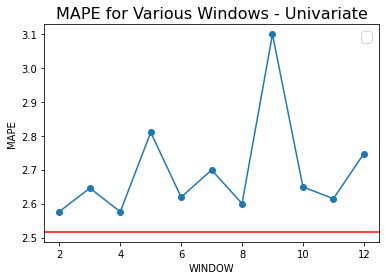

In [ ]:
import matplotlib.pyplot as plt

w = [2,3,4,5,6,7,8,9,10,11,12]

plt.plot(w, models_mapes_q3, '-o')
plt.axhline(y = naive_results['mape'], color = 'r', linestyle = '-')
plt.xlabel("WINDOW")
plt.ylabel("MAPE")
plt.title("MAPE for Various Windows - Univariate", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Model 6 (Multivariate)

In [ ]:
bp_q2

,Date,Price
0,2010-07-18,0.1
1,2010-07-19,0.1
2,2010-07-20,0.1
3,2010-07-21,0.1
4,2010-07-22,0.1
...,...,...
4612,2023-03-04,"22,347.1"
4613,2023-03-05,"22,428.3"
4614,2023-03-06,"22,410.0"
4615,2023-03-07,"22,197.8"


In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - np.datetime64(bp_q2['Date'][0])).astype(int)
block_reward_3_days = (block_reward_4_datetime - np.datetime64(bp_q2['Date'][0])).astype(int)
block_reward_2_days, block_reward_3_days

(2183, 3585)

In [ ]:
# Add block_reward column
bp_q3 = bp_q2.copy()
bp_q3["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bp_q3.iloc[:block_reward_2_days, -1] = block_reward_2
bp_q3.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bp_q3.iloc[block_reward_3_days:, -1] = block_reward_4
bp_q3.head()

,Date,Price,block_reward
0,2010-07-18,0.1,25
1,2010-07-19,0.1,25
2,2010-07-20,0.1,25
3,2010-07-21,0.1,25
4,2010-07-22,0.1,25


In [ ]:
bp_q3["block_reward"].to_numpy()

array([25, 25, 25, ..., 6.25, 6.25, 6.25], dtype=object)

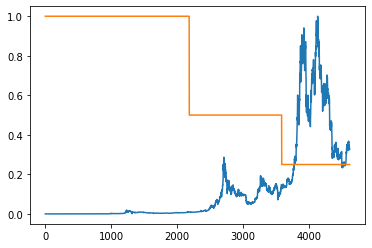

In [ ]:
br = bp_q3["block_reward"].to_numpy()
plt.plot((price_arr/max(price_arr)))
plt.plot(br/(max(br)))

In [ ]:
bp_q3

,Date,Price,block_reward
0,2010-07-18,0.1,25
1,2010-07-19,0.1,25
2,2010-07-20,0.1,25
3,2010-07-21,0.1,25
4,2010-07-22,0.1,25
...,...,...,...
4612,2023-03-04,"22,347.1",6.25
4613,2023-03-05,"22,428.3",6.25
4614,2023-03-06,"22,410.0",6.25
4615,2023-03-07,"22,197.8",6.25


In [ ]:
bp_q3["Date"] = pd.to_datetime(bp_q3["Date"], format='%Y-%m-%d')

for el in bp_q3['Date']:
  print(type(el))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.tim

In [ ]:
bp_q3.set_index('Date', inplace=True)
bp_q3

,Price,block_reward
Date,,
2010-07-18,0.1,25
2010-07-19,0.1,25
2010-07-20,0.1,25
2010-07-21,0.1,25
2010-07-22,0.1,25
...,...,...
2023-03-04,"22,347.1",6.25
2023-03-05,"22,428.3",6.25
2023-03-06,"22,410.0",6.25


In [ ]:
bp_q3['Price'] = bp_q3['Price'].str.replace(',', '').astype(float)


In [ ]:
models_results_q3_m = {}
models_mapes_q3_m = []
for w in [2,3,4,5,6,7,8,9,10,11,12]:

    HORIZON = 1 # predict 1 step at a time
    WINDOW_SIZE = w # use a week worth of timesteps to predict the horizon

    bp_q3_i = bp_q3.copy()

    # Add windowed columns
    for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
      bp_q3_i[f"Price+{i+1}"] = bp_q3_i["Price"].shift(periods=i+1)

    # Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
    X = bp_q3_i.dropna().drop("Price", axis=1).astype(np.float32) 
    y = bp_q3_i.dropna()["Price"].astype(np.float32)

    print(X)

    print(y)


    # Make train and test sets
    split_size = int(len(X) * 0.8)
    X_train, y_train = X[:split_size], y[:split_size]
    X_test, y_test = X[split_size:], y[split_size:]

    tf.random.set_seed(42)

    # Make multivariate time series model
    m6 = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
      layers.Dense(HORIZON)
    ], name="model_6_q3_w"+str(w)+"dense_multivariate")

    # Compile
    m6.compile(loss="mae",
                    optimizer=tf.keras.optimizers.Adam())

    # Fit
    m6.fit(X_train, y_train,
                epochs=100,
                batch_size=128,
                verbose=0, # only print 1 line per epoch
                validation_data=(X_test, y_test),
                callbacks=[create_model_checkpoint(model_name=m6.name)])

    m6_preds = m6.predict(X_test)

    m6_results = evaluate_preds(
        y_true=y_test,
        y_pred=m6_preds
    )

    m6_results

    models_results_q3_m['window_size_'+str(w)] = m6_results        
    models_mapes_q3_m.append(models_results_q3_m['window_size_'+str(w)]['mape'])

            block_reward       Price+1       Price+2
Date                                                
2010-07-20         25.00      0.100000      0.100000
2010-07-21         25.00      0.100000      0.100000
2010-07-22         25.00      0.100000      0.100000
2010-07-23         25.00      0.100000      0.100000
2010-07-24         25.00      0.100000      0.100000
...                  ...           ...           ...
2023-03-04          6.25  22354.400391  23465.400391
2023-03-05          6.25  22347.099609  22354.400391
2023-03-06          6.25  22428.300781  22347.099609
2023-03-07          6.25  22410.000000  22428.300781
2023-03-08          6.25  22197.800781  22410.000000

[4615 rows x 3 columns]
Date
2010-07-20        0.100000
2010-07-21        0.100000
2010-07-22        0.100000
2010-07-23        0.100000
2010-07-24        0.100000
                  ...     
2023-03-04    22347.099609
2023-03-05    22428.300781
2023-03-06    22410.000000
2023-03-07    22197.800781
2023-03-08 

29/29 [==============================] - 0s 2ms/step
            block_reward       Price+1       Price+2       Price+3
Date                                                              
2010-07-21         25.00      0.100000      0.100000      0.100000
2010-07-22         25.00      0.100000      0.100000      0.100000
2010-07-23         25.00      0.100000      0.100000      0.100000
2010-07-24         25.00      0.100000      0.100000      0.100000
2010-07-25         25.00      0.100000      0.100000      0.100000
...                  ...           ...           ...           ...
2023-03-04          6.25  22354.400391  23465.400391  23642.199219
2023-03-05          6.25  22347.099609  22354.400391  23465.400391
2023-03-06          6.25  22428.300781  22347.099609  22354.400391
2023-03-07          6.25  22410.000000  22428.300781  22347.099609
2023-03-08          6.25  22197.800781  22410.000000  22428.300781

[4614 rows x 4 columns]
Date
2010-07-21        0.100000
2010-07-22        0

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-22         25.00      0.100000      0.100000      0.100000   
2010-07-23         25.00      0.100000      0.100000      0.100000   
2010-07-24         25.00      0.100000      0.100000      0.100000   
2010-07-25         25.00      0.100000      0.100000      0.100000   
2010-07-26         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4  
Date     

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-23         25.00      0.100000      0.100000      0.100000   
2010-07-24         25.00      0.100000      0.100000      0.100000   
2010-07-25         25.00      0.100000      0.100000      0.100000   
2010-07-26         25.00      0.100000      0.100000      0.100000   
2010-07-27         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-24         25.00      0.100000      0.100000      0.100000   
2010-07-25         25.00      0.100000      0.100000      0.100000   
2010-07-26         25.00      0.100000      0.100000      0.100000   
2010-07-27         25.00      0.100000      0.100000      0.100000   
2010-07-28         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-25         25.00      0.100000      0.100000      0.100000   
2010-07-26         25.00      0.100000      0.100000      0.100000   
2010-07-27         25.00      0.100000      0.100000      0.100000   
2010-07-28         25.00      0.100000      0.100000      0.100000   
2010-07-29         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-26         25.00      0.100000      0.100000      0.100000   
2010-07-27         25.00      0.100000      0.100000      0.100000   
2010-07-28         25.00      0.100000      0.100000      0.100000   
2010-07-29         25.00      0.100000      0.100000      0.100000   
2010-07-30         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-27         25.00      0.100000      0.100000      0.100000   
2010-07-28         25.00      0.100000      0.100000      0.100000   
2010-07-29         25.00      0.100000      0.100000      0.100000   
2010-07-30         25.00      0.100000      0.100000      0.100000   
2010-07-31         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-28         25.00      0.100000      0.100000      0.100000   
2010-07-29         25.00      0.100000      0.100000      0.100000   
2010-07-30         25.00      0.100000      0.100000      0.100000   
2010-07-31         25.00      0.100000      0.100000      0.100000   
2010-08-01         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-29         25.00      0.100000      0.100000      0.100000   
2010-07-30         25.00      0.100000      0.100000      0.100000   
2010-07-31         25.00      0.100000      0.100000      0.100000   
2010-08-01         25.00      0.100000      0.100000      0.100000   
2010-08-02         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step
            block_reward       Price+1       Price+2       Price+3  \
Date                                                                 
2010-07-30         25.00      0.100000      0.100000      0.100000   
2010-07-31         25.00      0.100000      0.100000      0.100000   
2010-08-01         25.00      0.100000      0.100000      0.100000   
2010-08-02         25.00      0.100000      0.100000      0.100000   
2010-08-03         25.00      0.100000      0.100000      0.100000   
...                  ...           ...           ...           ...   
2023-03-04          6.25  22354.400391  23465.400391  23642.199219   
2023-03-05          6.25  22347.099609  22354.400391  23465.400391   
2023-03-06          6.25  22428.300781  22347.099609  22354.400391   
2023-03-07          6.25  22410.000000  22428.300781  22347.099609   
2023-03-08          6.25  22197.800781  22410.000000  22428.300781   

                 Price+4       Price

29/29 [==============================] - 0s 1ms/step


In [ ]:
models_results_q3_m, models_mapes_q3_m

({'window_size_2': {'mae': 17201.652,
   'mse': 452548580.0,
   'rmse': 20749.955,
   'mape': 65.33393,
   'mase': 18.970636},
  'window_size_3': {'mae': 17130.4,
   'mse': 448803900.0,
   'rmse': 20677.875,
   'mape': 64.78339,
   'mase': 18.892057},
  'window_size_4': {'mae': 17165.459,
   'mse': 450650620.0,
   'rmse': 20713.312,
   'mape': 65.05794,
   'mase': 18.93072},
  'window_size_5': {'mae': 17200.146,
   'mse': 452469600.0,
   'rmse': 20748.256,
   'mape': 65.32236,
   'mase': 18.968979},
  'window_size_6': {'mae': 17270.883,
   'mse': 456189700.0,
   'rmse': 20817.84,
   'mape': 65.83627,
   'mase': 19.046988},
  'window_size_7': {'mae': 17199.604,
   'mse': 452445000.0,
   'rmse': 20745.271,
   'mape': 65.25958,
   'mase': 18.94915},
  'window_size_8': {'mae': 17161.303,
   'mse': 450424100.0,
   'rmse': 20706.738,
   'mape': 64.96782,
   'mase': 18.906952},
  'window_size_9': {'mae': 17321.252,
   'mse': 458799420.0,
   'rmse': 20864.312,
   'mape': 66.16122,
   'mase': 1

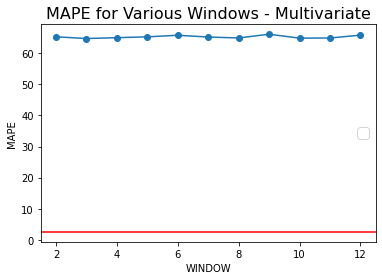

In [ ]:
import matplotlib.pyplot as plt

w = [2,3,4,5,6,7,8,9,10,11,12]

plt.plot(w, models_mapes_q3_m, '-o')
plt.axhline(y = naive_results['mape'], color = 'r', linestyle = '-')
plt.xlabel("WINDOW")
plt.ylabel("MAPE")
plt.title("MAPE for Various Windows - Multivariate", fontsize=16)
plt.legend(fontsize=14);

# WHY ARE RESULTS SO BAD !?!?!?! more on this...

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## 4. Create a windowed dataset just like the ones we used for `model_1` using `tf.keras.preprocessing.timeseries_dataset_from_array()` and retrain `model_1` using the recreated dataset.

## 5. For our multivariate modelling experiment, we added the Bitcoin block reward size as an extra feature to make our time series multivariate.
* Are there any other features you think you could add?
* If so, try it out, how do these affect the model?

## 6. Make prediction intervals for future forecasts. To do so, one way would be to train an ensemble model on all of the data, make future forecasts with it and calculate the prediction intervals of the ensemble just like we did for `model_8`.

## 7. For future predictions, try to make a prediction, retrain a model on the predictions, make a prediction, retrain a model, make a prediction, retrain a model, make a prediction (retrain a model each time a new prediction is made). Plot the results, how do they look compared to the future predictions where a model wasn't retrained for every forecast (`model_9`)?

## 8. Throughout this notebook, we've only tried algorithms we've handcrafted ourselves. But it's worth seeing how a purpose built forecasting algorithm goes.
* Try out one of the extra algorithms listed in the modelling experiments part such as:
  * Facebook's Kats library - there are many models in here, remember the machine learning practioner's motto: experiment, experiment, experiment.
  * LinkedIn's Greykite library